In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
<style>
.rendered_html table, .rendered_html td, .rendered_html th {
    font-size: 11pt;
    background-color: #ffffff;
    text-align: left;
}
</style>''')

<style>
td {
  font-size: 20px
}
</style>

### Tom Wilkinson's
# Cartolan - Trade Winds
***Venti, Vendi, Vici***
## Game guide, tips, and simulation playtesting

This notebook will document the rules of the boardgame Cartolan, and run simulations of it to playtest at a larger scale than possible with volunteers.

In Cartolan, it is the age of exploration, an age of sails and trails and wonders from the far side of the world. Race along established trade routes, amassing goods, and then set out into the unknown and see what new treasures you can discover and bring back successfully to the Capital. Perhaps you'll be the first to discover the Mythical City on the far side of the world, or to earn your place in history by completing the Mappa Mundi, or simply to secure your legacy by winning the lucrative Carta Mundi. But, always remember, there are rivals for your glory, and they may not be above a little piracy!

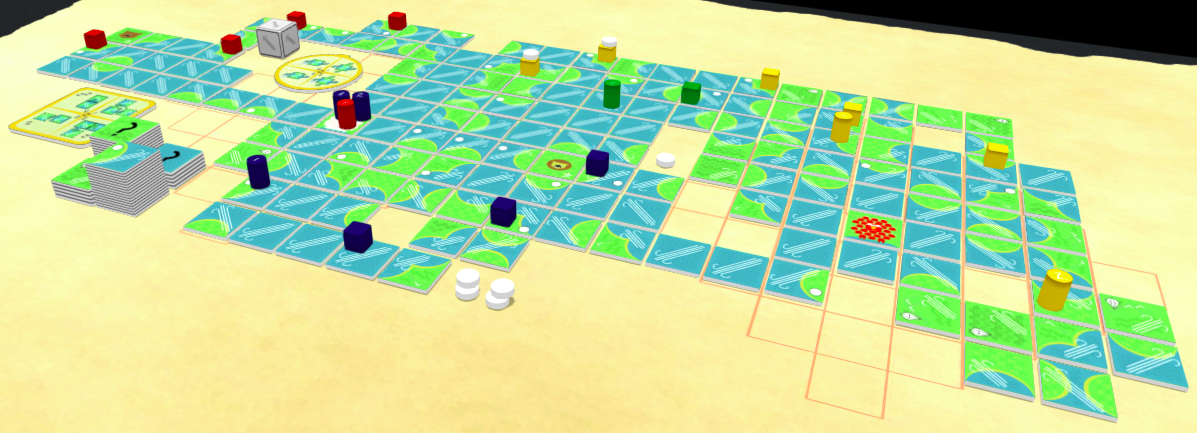

## Contents of this guide / structure of the investigation:
1. [Game items (and class templates)](#-1.-Game-items)
2. [Quick references (and method definitions)](#-2.-Quick-references-and-method-definitions)
     1. [Beginner mode - exploration and trade by sea](##-Beginner-mode---Exploration-and-Trade-by-sea)
     2. Regular mode - inland exploration, and piracy
     3. Advanced mode - special skills, sicknesses and seasons
3. [Setup before play (and instantiation of game objects)](#-3.-Setup-before-play-and-instantiation-of-objects)
4. Detailed instructions for play (and procedural structure of game)
5. Tips from human play and an exploration of simulated strategies
     1. Human discovered tips
     2. Basic simulation of edge case strategies testing the diversity of gameplay
     3. Interactive simulation
     4. Mainstream AI players
     5. Brainstream AI players (RHMN-SORN)

# 1. Game items

The game itself involves up to four players, each of which can have various pieces which are placed on tiles around the play area, and can take actions that lead to movement of those pieces or more tiles being drawn from tile piles and placed around the play area.

Detailed below there are three different modes for the game, with successively more rules: Beginner, Regular, and Advanced.

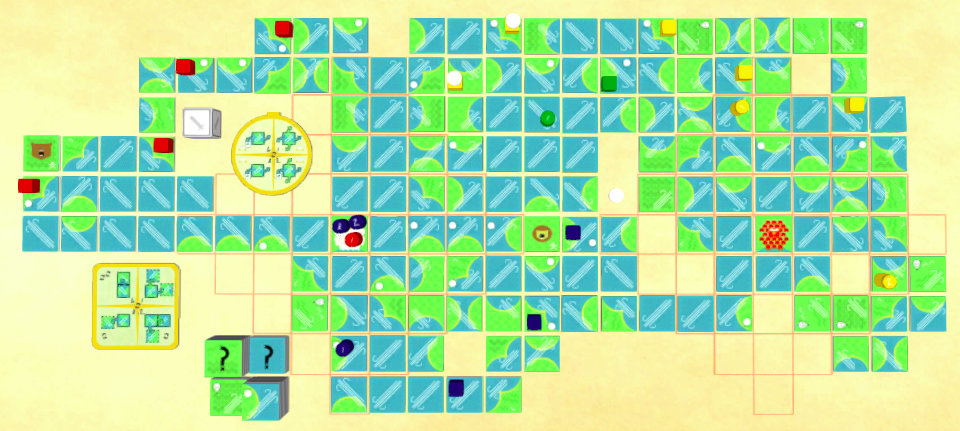

In [2]:
class Game:
    '''A template for maintaining a record of the game state in different modes of Cartolan.
    
    Methods:
    __init__ taking a list full of Player objects
    establish_turn_order taking no arguments
    '''
    MAX_PLAYERS = 4
    MIN_PLAYERS = 2
    PLAYER_COLOURS = ["blue","red","yellow","green"]
    
    def __init__(self, players):
        if len(players) in range(self.MIN_PLAYERS, self.MAX_PLAYERS +1):
            self.players = players
            self.establish_turn_order()
        else: raise Exception("Game created with an invalid number of players: should be 2-4, but was " +str(len(players)))
        
        self.tile_piles = {}
        self.play_area = {}

        self.turn = 0
        
        #some information to keep track of centrally for players to make decisions
        self.winning_player = None
        self.max_wealth = 0
        self.total_vault_wealth = 0
        self.total_chest_wealth = 0
        self.wealth_difference = 0
        self.num_failed_explorations = 0
#         self.agent_network = None #placeholder to keep track of which routes are possible in a single turn
#         self.agent_distances = [[]] #placeholder to keep track of where trade routes could be built
#         self.most_lucrative_route_value = 0
#         self.most_lucrative_route_player = None

        
    def establish_turn_order(self):
        '''Randomises the order in which Player objects will be activated'''
        import random
        random.shuffle(self.players)

## Items per player / colour

### Player and player mat (x1)

There can be between two and four players per game, and each one can hold wealth tokens in their Vault which determine who wins the game, as well as having Adventurer and Agent tokens which can each hold wealth tokens themselves.

In [3]:
class Player:
    '''A template for actual Players responding to play in a Game of Cartolan.
    
    Methods:
    __init__ taking a colour string that should correspond to a pyplot colour
    
    Interfaces:
    continue_turn; continue_move 
    '''
    def __init__(self, colour = "red"):
        self.colour = colour
        
        self.vault_wealth = 0
        self.adventurers = []
        self.agents = []
        
        self.locations_to_avoid = [] #tiles to remember to avoid for artificial players
        self.p_deviate = 0.1 #some randomness for artificial player behaviour
    
    def continue_move(self, adventurer):
        '''placeholder for responding to the state of the game by choosing movement for an adventurer'''
        pass
        
    def continue_turn(self, adventurer):
        '''placeholder for responding to the state of the game'''
        pass

<table><tr><td>
<h3>Adventurer tokens (x3)</h3>

These cylindrical numbered tokens are the moveable pieces for each player, with different movement possible between tiles over water edges with or against the wind, or over land edges - whether onto existing tiles or exploring new spaces. Each one can collect wealth, in its Chest, through discovering Wonders and trading at discovered wonders. In game modes besides Beginner, they can also act as pirates attacking other tokens:
</td><td>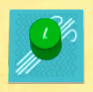
</td></tr></table>
<!-- 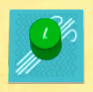 -->

In [4]:
class Token:
    '''A template for actual tokens used in play.
    
    Methods:
    __init__ taking a Game and a Player and a Tile from the Cartolan module
    
    Interfaces:
    None
    '''
    def __init__(self, game, player, current_tile):
        self.game = game
        self.player = player
        self.current_tile = current_tile
        
        self.wealth = 0
        self.route = []
        
        current_tile.move_onto_tile(self)

class Adventurer(Token):
    '''A template for actual Adventurer tokens used in different game modes.
    
    Methods:
    __init__ taking a Game and a Player and a Tile from the Cartolan module
    
    Interfaces:
    move; explore; discover; trade; rest; 
    '''
    def __init__(self, game, player, current_tile):
        super().__init__(game, player, current_tile)
        player.adventurers.append(self)
        
        self.turns_moved = 0
    
    def move(self, compass_point):
        '''placeholder for movement'''
        pass
        
    def explore(self, latitude, longitude):
        '''placeholder for exploration'''
        pass
        
    def discover(self, tile):
        '''placeholder for discovering new wealth'''
        pass
        
    def trade(self, tile):
        '''placeholder for trading on a suitable tile'''
        pass
        
    def rest(self, agent):
        '''placeholder for resting with an agent'''
        pass
    
    def attack(self, token):
        '''placeholder for attacking other tokens in Regular and Advanced modes'''
        pass

<table><tr><td>
<h3>Agent tokens (x5)</h3>

These cubic tokens, which are plain on five sides and marked on the sixth with a skull'n'crossbones, can be placed in a fixed position during the game, where they will help Adventurers perform various actions like collecting extra wealth from trade or resting:
</td><td>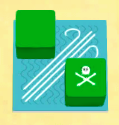
</td></tr></table>
<!-- 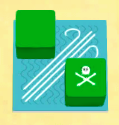 -->

In [5]:
class Agent(Token):
    '''A template for actual Agent tokens used in different game modes.
    
    Methods:
    __init__ taking a Game and a Player and a Tile from the Cartolan module
    
    Interfaces:
    give_rest; manage_trade 
    '''
    def __init__(self, game, player, current_tile):
        super().__init__(game, player, current_tile)
        player.agents.append(self)
        
    def give_rest(self, adventurer):
        '''placeholder for resting adventurers'''
        pass
    
    def manage_trade(self, adventurer):
        '''placeholder for agents involved in trade on a tile'''
        pass

## Items shared by all players

<!-- 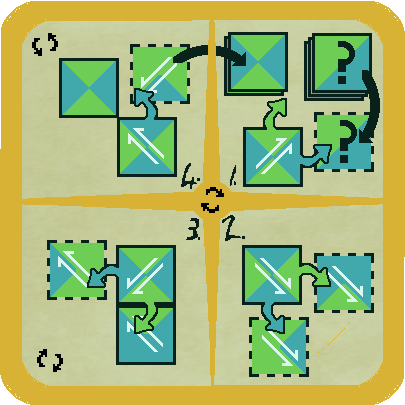 -->
<!-- 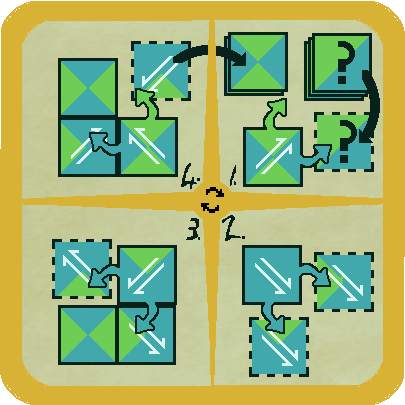 -->
<table><tr>
<td>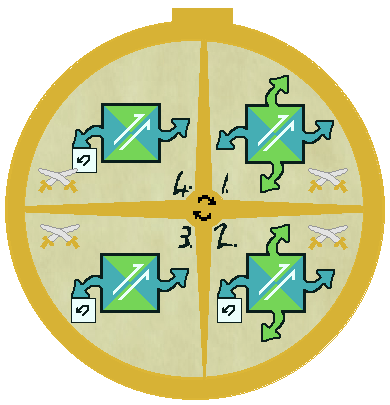</td>
<td><h3> Movement compass (x1) </h3>
This large circular tile contains visuals to remind players of how tokens can move during a turn or after resting. They do not play any other roles in gameplay and so are not worth simulating.

<h3> Exploration compass (x2) </h3>
This large square tile contains visuals to remind players of how tiles are rotated during exploration - for which there are currently **two variants** being tested. They do not play any other roles in gameplay and so are not worth simulating.</td>
<td>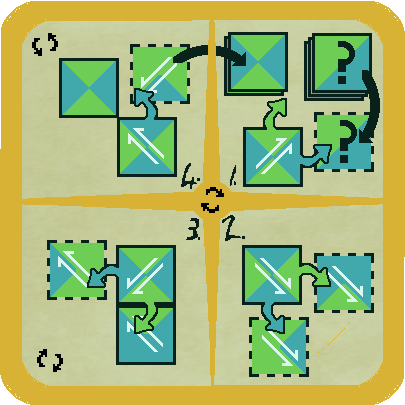</td>
<td>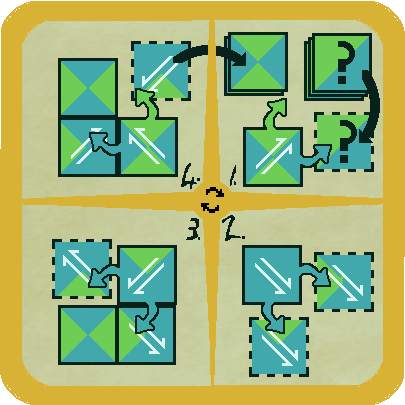</td>
</tr></table>

<table><tr><td colspan="3">
<h3> Conflict guide (x1) </h3>
This sheet contains visuals to remind players of how different conflicts resolve. They do not play any other roles in gameplay and so are not worth simulating. 

<h3> Pirate token (x12) </h3>
These black disc tokens, with skull'n'crossbones on both sides, are moved around with an Adventurer token once they have committed piracy, to represent the fact they have abandoned all but essential gear to aid movement at the expense of being able to present themselves in a civilised manner for trading. They do any other roles in gameplay and so are not worth simulating.
<!-- 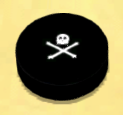 -->

<h3> Small wealth token (x50) </h3>
These many white discs each represent 1 wealth point, and would be used in the physical game to keep track of wealth collected in Adventurer's Chests, on top of Agents and Disaster tiles, and in each Player's Vault. They do not play any other roles in gameplay and so are not worth simulating. 
<!-- 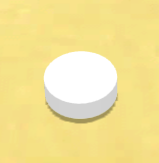 -->

<h3> Big wealth token (x50) </h3>
These many white squares each represent 5 wealth points, and would be used in the physical game to keep track of wealth collected in Adventurer's Chests, on top of Agents and Disaster tiles, and in each Player's Vault. They do not play any other roles in gameplay and so are not worth simulating. 

<h3> Gusting Wind die (x1) </h3>
This six sided die has five faces with wind arrows pointing straight to indicate wind gusting with the prevailing wind, and one face with a wind arrow curving around to indicate wind gusting against the prevailing wind. It is used in Regular game mode to allow more upwind movement and to settle conflicts.
</td>
<!-- 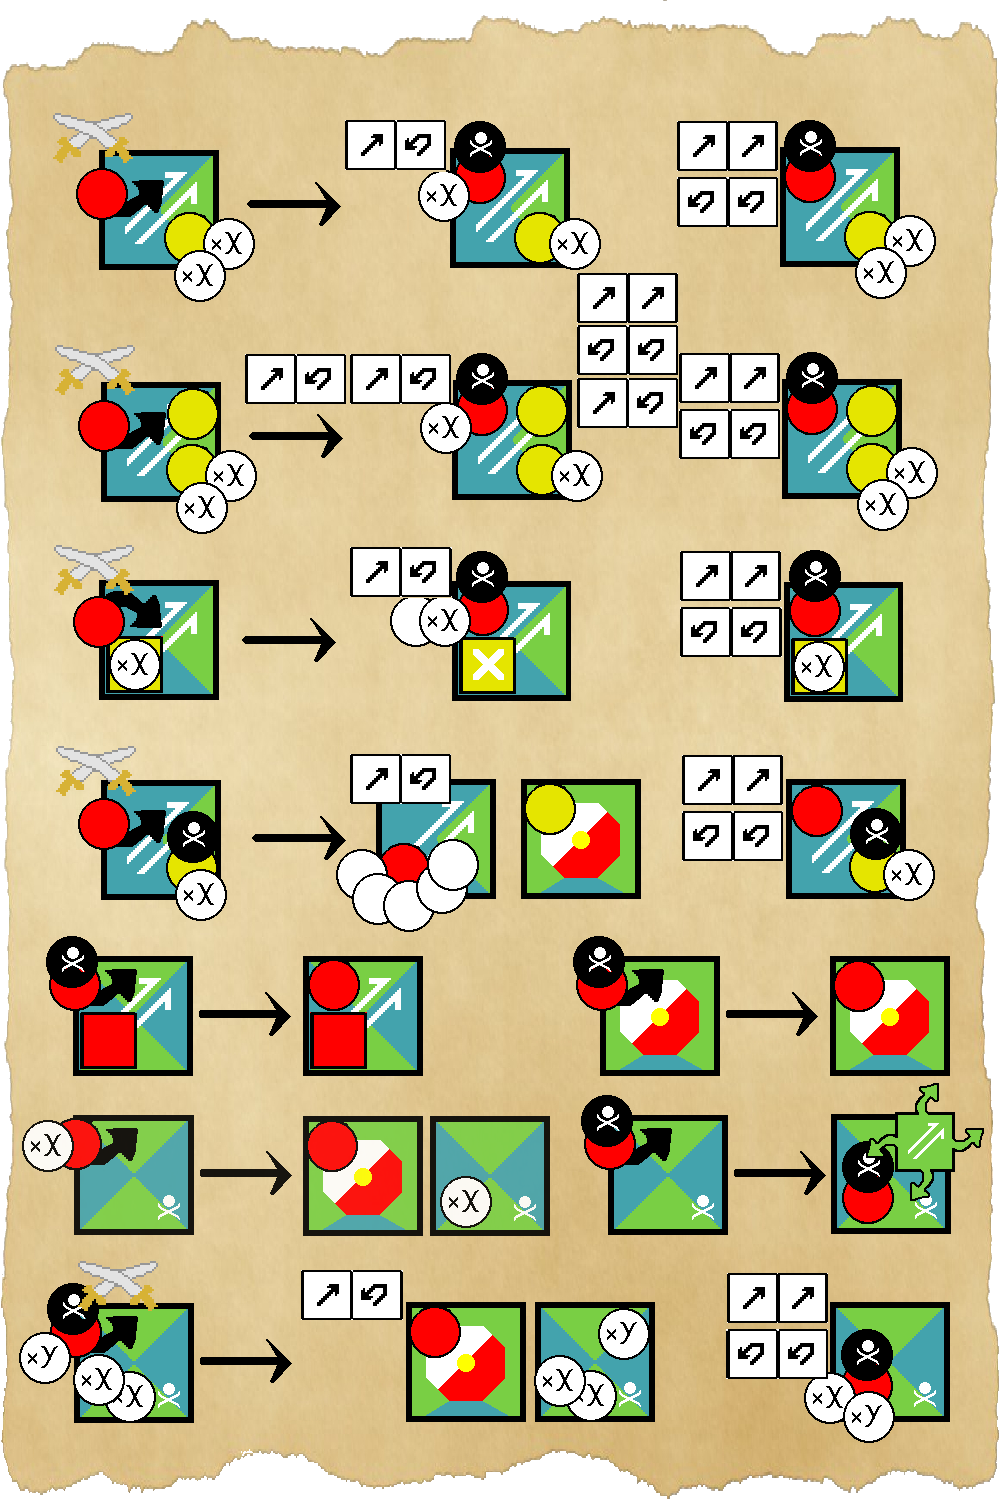 -->
<td colspan = "1">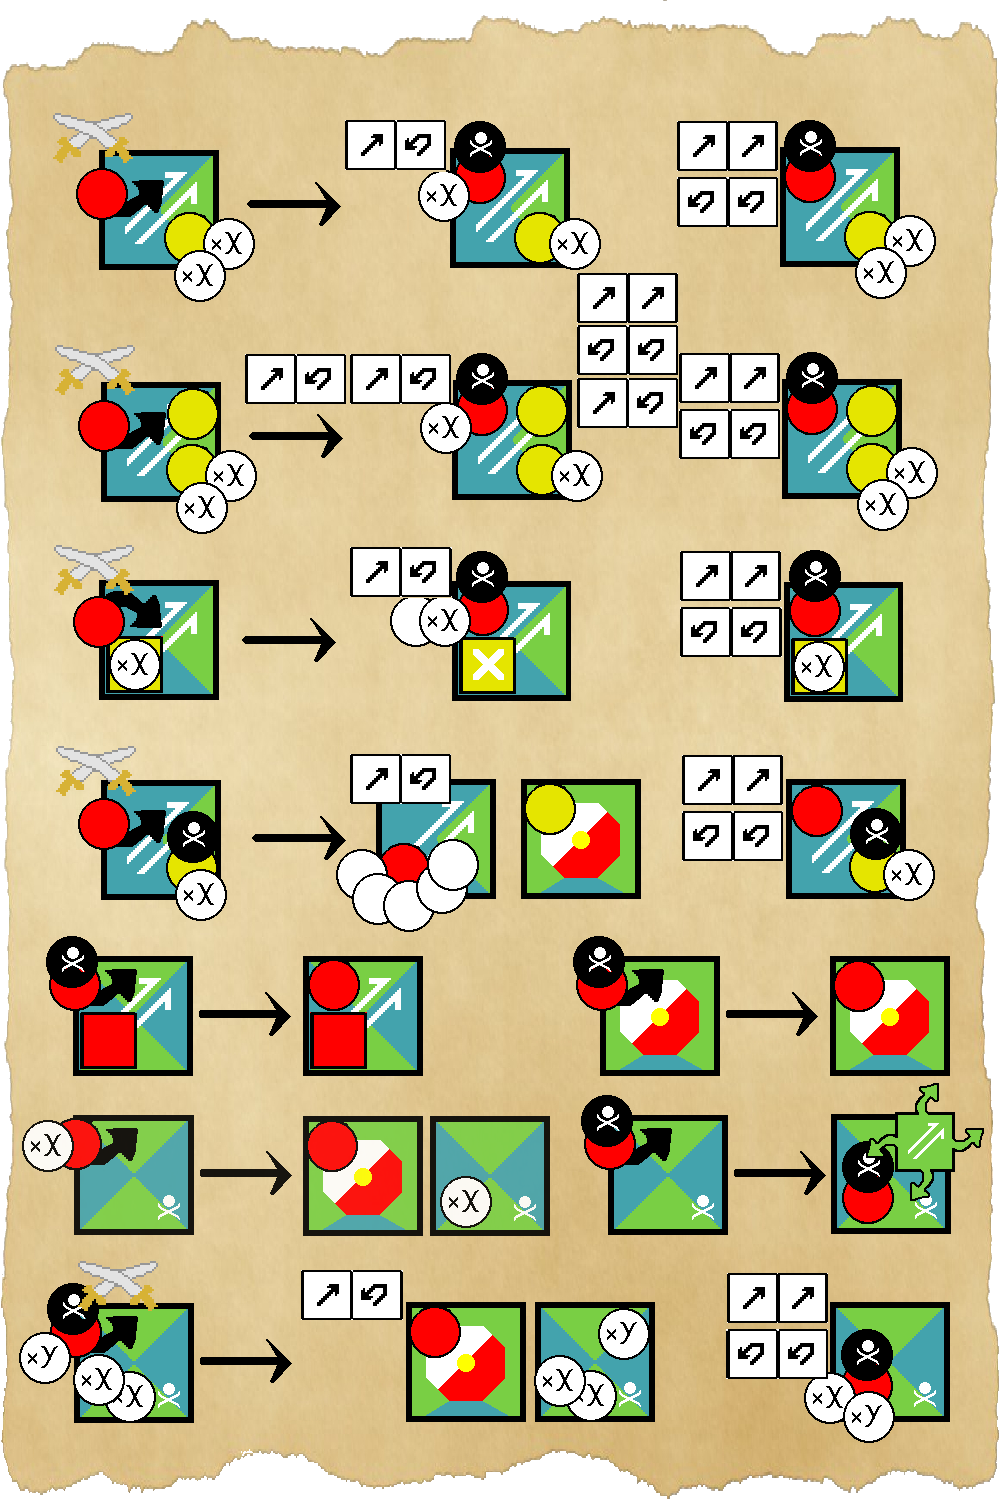</td></tr>
<tr><td>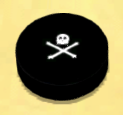</td><td>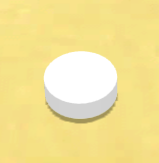</td> <td>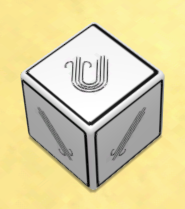</td> </tr></table>


In [6]:
class GustingWindDie:
    '''Representing the die used in Cartolan, this introduces uncertainty to some actions
    
    Methods:
    __init__ takes a Game instance of Cartolan
    gust_against_wind takes no arguments and replicates a die rolling with two outcomes
    '''
    import random
    random.seed() # defaults to system time
    
    NUM_FACES = 6
    NUM_GUST_AGAINST_WIND_FACES = 1
    
    def __init__(self, game):
        self.game = game
        
        self.p_gust_against_wind = self.NUM_GUST_AGAINST_WIND_FACES/self.NUM_FACES # careful, in Python 2 this will be floor division
    
    def gust_against_wind(self):
        '''replicates a die rolling with two outcomes'''
        if self.random.random() < self.NUM_GUST_AGAINST_WIND_FACES/self.NUM_FACES: # careful, in Python2 integer division won't produce a float
            return True
        else:
            return False

## Tiles
The game takes place across square tiles that have been laid next to one another in a grid, drawn from tile piles, and which determine what actions players' tokens can take each movement and how they earn wealth. Each tile will have four edges that can be either water or land, and an arrow denoting wind direction diagonally across them. On the back of the tile there will be either land or water. Only water-backed tiles are used in Beginner mode. Tiles may also have a pearl/diamond denoting a Wonder on that tile or a skull'n'crossbones denoting a disaster.
<!-- ![Unknown%20tiles.png](attachment:Unknown%20tiles.png)  ![example_tile_land_mountains_wonder.png](attachment:example_tile_land_mountains_wonder.png)  ![example_tile_water_ucda_land_uadc.png](attachment:example_tile_water_ucda_land_uadc.png) -->
<!-- <table><tr><td><img src='attachment:Unknown%20tiles.png' style="width: 150px;"></td><td><img src='attachment:example_tile_land_mountains_wonder.png' style="width: 75px;"></td><td><img src='attachment:example_tile_water_ucda_land_uadc.png' style="width: 75px;"></td></tr></table> -->

In [7]:
class TilePosition: 
    '''keeps track of the coordinates of a Tile entity in a PlayArea for the game Cartolan'''
    def __init__(self, latitude = None, longitude = None):
        '''keep track of the tile's position in two ints'''
        self.latitude = latitude
        self.longitude = longitude


class WindDirection:
    '''keeps track of the direction of the diagonal wind arrow on a Tile entity in the game Cartolan'''
    def __init__(self, north = True, east = True):
        '''keep track of the wind direction with two bits'''
        self.north = north
        self.east = east

        
class TileEdges:
    '''keeps track of whether each of the edges are land or water, relative to wind direction, for a Tile entity in the game Cartolan'''
    def __init__(self, uc_water = True, ua_water = True, dc_water = True, da_water = True):
        ''' keep track of the edges of the tile in four bits'''
        self.upwind_clock_water = uc_water
        self.upwind_anti_water = ua_water
        self.downwind_clock_water = dc_water
        self.downwind_anti_water = da_water


class Tile:
    '''represents the tiles used in the game Cartolan, procedurally generating a play area and affecting movement
    
    Methods:
    __init__ taking Game, WindDirection, and TileEdges objects from Cartolan module, and a tile_back string
    place_tile taking two int arguments for coordinates
    '''
    def __init__(self, game
                 , tile_back = "water"
                 , wind_direction = WindDirection(True,True)
                 , tile_edges = TileEdges(True,True,True,True)
                , is_wonder = False):
        self.game = game
        self.tile_back = tile_back
        self.wind_direction = wind_direction
        self.tile_edges = tile_edges
        self.tile_position = TilePosition(None, None)
        self.is_wonder = is_wonder
        
        self.adventurers = [] # to keep track of the Adventurer tokens on a tile at any point
        self.agent = None # there can only be one Agent token on a given tile
    
    def place_tile(self, latitude, longitude):
        '''records the location of a Tile object in the PlayArea of a Cartolan game
        
        key arguments:
        int latitude
        int longitude
        '''
        print("Placing tile " +str(latitude)+", "+str(longitude))
        play_area = self.game.play_area
        if play_area.get(latitude) is None:
            play_area[latitude] = {longitude:self}
            self.tile_position = TilePosition(latitude, longitude)
        elif play_area.get(latitude).get(longitude) is None: 
            play_area[latitude][longitude] = self
            self.tile_position = TilePosition(latitude, longitude)
        else: raise Exception("Tried to place a tile on top of another")
    
    def rotate_tile_clock(self):
        '''Replicates the change in direction of the wind arrow on a tile from rotating it
        
        Rotates the tie sequentially: NE->SE, SE->SW, SW->NW, NW->NE
        '''
        if self.wind_direction.north and self.wind_direction.east:
            self.wind_direction.north = False
        elif not self.wind_direction.north and self.wind_direction.east:
            self.wind_direction.east = False
        elif not self.wind_direction.north and not self.wind_direction.east:
            self.wind_direction.north = True
        elif self.wind_direction.north and not self.wind_direction.east:
            self.wind_direction.east = True
        else: raise Exception("Tile orientations have become confused")
    
    def rotate_tile_anti(self):
        '''Replicates the change in direction of the wind arrow on a tile from rotating it
        
        Rotates the tie sequentially: NE->NW, NW->SW, SW->SE, SE->NE
        '''
        if self.wind_direction.north and self.wind_direction.east:
            self.wind_direction.east = False
        elif self.wind_direction.north and not self.wind_direction.east:
            self.wind_direction.north = False
        elif not self.wind_direction.north and not self.wind_direction.east:
            self.wind_direction.east = True
        elif not self.wind_direction.north and self.wind_direction.east:
            self.wind_direction.north = True
        else: raise Exception("Tile orientations have become confused")
    
    def compass_edge_water(self, compass_point):
        '''Reports whether a tile edge is land or water, based on tile orientation rather than wind direction
        
        key arguments:
        string giving either the word or letter for one of the four cardinal compass directions
        '''
        if self.wind_direction.north and self.wind_direction.east: # NE orientation => N = downwind anti
            if compass_point.lower() in ["north", "n"]:
                return self.tile_edges.downwind_anti_water
            elif compass_point.lower() in ["east", "e"]:
                return self.tile_edges.downwind_clock_water
            elif compass_point.lower() in ["south", "s"]:
                return self.tile_edges.upwind_anti_water
            elif compass_point.lower() in ["west", "w"]:
                return self.tile_edges.upwind_clock_water
            else: raise Exception("Tile orientations have become confused")
        elif not self.wind_direction.north and self.wind_direction.east: # SE orientation => N = upwind clock 
            if compass_point.lower() in ["north", "n"]:
                return self.tile_edges.upwind_clock_water
            elif compass_point.lower() in ["east", "e"]:
                return self.tile_edges.downwind_anti_water
            elif compass_point.lower() in ["south", "s"]:
                return self.tile_edges.downwind_clock_water
            elif compass_point.lower() in ["west", "w"]:
                return self.tile_edges.upwind_anti_water
            else: raise Exception("Tile orientations have become confused")
        elif not self.wind_direction.north and not self.wind_direction.east: # SW orientation => N = upwind anti
            if compass_point.lower() in ["north", "n"]:
                return self.tile_edges.upwind_anti_water
            elif compass_point.lower() in ["east", "e"]:
                return self.tile_edges.upwind_clock_water
            elif compass_point.lower() in ["south", "s"]:
                return self.tile_edges.downwind_anti_water
            elif compass_point.lower() in ["west", "w"]:
                return self.tile_edges.downwind_clock_water
            else: raise Exception("Tile orientations have become confused")
        elif self.wind_direction.north and not self.wind_direction.east: # NW orientation => N = downwind clock
            if compass_point.lower() in ["north", "n"]:
                return self.tile_edges.downwind_clock_water
            elif compass_point.lower() in ["east", "e"]:
                return self.tile_edges.upwind_anti_water
            elif compass_point.lower() in ["south", "s"]:
                return self.tile_edges.upwind_clock_water
            elif compass_point.lower() in ["west", "w"]:
                return self.tile_edges.downwind_anti_water
            else: raise Exception("Tile orientations have become confused")
        else: raise Exception("Tile orientations have become confused")
    
    
    def compass_edge_downwind(self, compass_point):
        '''Reports whether a tile edge has the wind arrow pointing to it
        
        key arguments:
        string giving either the word or letter for one of the four cardinal compass directions
        '''
        if compass_point.lower() in ["north","n"]:
            return self.wind_direction.north
        elif compass_point.lower() in ["east","e"]:
            return self.wind_direction.east
        elif compass_point.lower() in ["south","s"]:
            return not self.wind_direction.north
        elif compass_point.lower() in ["west","w"]:
            return not self.wind_direction.east
        else: raise Exception("Invalid compass direction checked")
        
    
    def move_onto_tile(self, token):
        '''records that a token is now on this tile, whether an Agent or Adventurer
        
        key arguments:
        Token either an Agent or an Adventurer from the Cartolan module
        '''
        if isinstance(token, Token):
            if isinstance(token, Adventurer):
                print("Moving adventurer for " +str(token.player.colour)+ " player onto tile at " +str(self.tile_position.latitude)+ ", " +str(self.tile_position.longitude))
                if token.current_tile:
                    if token in token.current_tile.adventurers:
                        token.current_tile.adventurers.remove(token)
                token.current_tile = self
                self.adventurers.append(token)
                token.route.append(self)
                
            elif isinstance(token, Agent):
                if self.agent is None:
                    print("Moving agent for " +str(token.player.colour)+ " player onto tile at " +str(self.tile_position.latitude)+ ", " +str(self.tile_position.longitude))
                    if token.current_tile:
                        token.current_tile.agent = None
                    token.current_tile = self
                    self.agent = token
                    token.route.append(self) 
                elif self.agent.dispossessed:
                    self.agent.player.agents.remove(self.agent)
                    self.agent.current_tile = None
                    print("Moving agent for " +str(token.player.colour)+ " player onto tile at " +str(self.tile_position.latitude)+ ", " +str(self.tile_position.longitude))
                    self.agent = token
                    token.route.append(self) # relevant only in Regular and Advanced mode
                else: raise Exception("Tried to add multiple Agents to a tile: adding and agent of " +token.player.colour+ " player where there was an existing agent of " +self.agent.player.colour)
            else: raise Exception("Didn't know how to handle this kind of token")
        else: raise Exception("Tried to move something other than a token onto a tile")
    
    def move_off_tile(self, token):
        '''Records a token being removed from a Tile
        
        key arguments:
        Token either an Agent or an Adventurer from the Cartolan module
        '''
        if token is self.agent:
            self.agent.current_tile = None
            self.agent = None
        
        if self.adventurers.contains(token):
            self.adventurers.remove(token)
        else: raise Exception("Tried to remove a token that was never on the tile")
        

class TilePile:
    '''Represents a stack of tiles in the game Cartolan
    
    methods:
    __init__ optionally takes a tile_back string and a List of tiles
    '''
    def __init__(self, tile_back = "water", tiles = []):
        self.tile_back = tile_back
        self.tiles = tiles
    
    def add_tile(self, tile):
        '''Includes another Tile in this pile
        
        key arguments:
        Tile object from the Cartolan module
        '''
        if isinstance(tile, Tile):
            if tile.tile_back == self.tile_back:
                self.tiles.append(tile)
            else: raise Exception ("Tried adding a tile to the wrong pile")
        else: raise Exception("Tried adding something other than a tile to a pile")
    
    def draw_tile(self):
        '''Removes and returns a Tile from the pile'''
        if self.tiles:
            return self.tiles.pop()
        else:
            return None
    
    def shuffle_tiles(self):
        '''Randomises the order of tiles in the pile'''
        import random
        random.shuffle(self.tiles)

### Water tiles
These tiles will tend to have more water edges, and can include Wonders that give wealth for discovery or trade, encouraging play balancing speed of travel with the time interval before banking wealth in a player's Vault.
<!-- ![Unexplored%20tile%20-%20water.png](attachment:Unexplored%20tile%20-%20water.png) -->
<table><tr>
<td>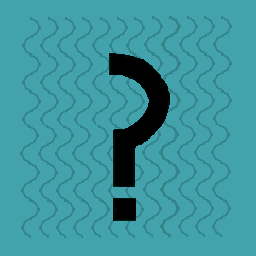</td>
<td>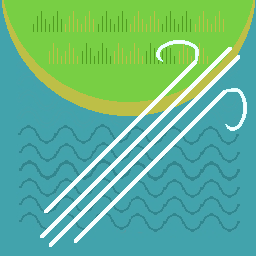</td>
<td>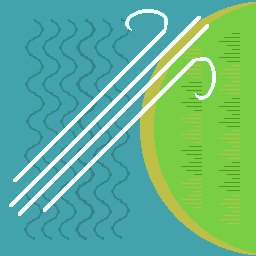</td>
<td>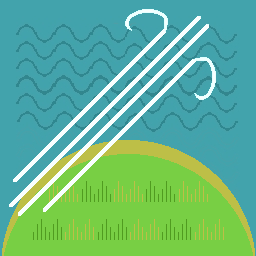</td>
<td>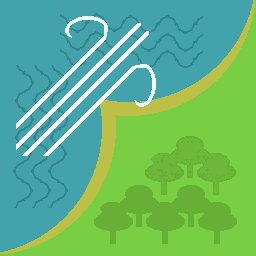</td>
<td>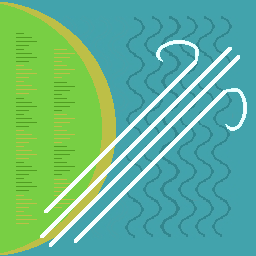</td>
<td>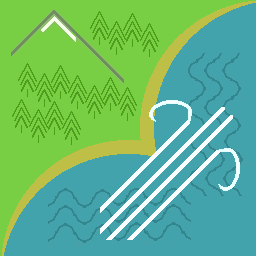</td>
<td>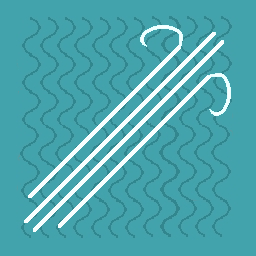</td>
</tr><tr>
<td style="text-align: center;">Tile back</td>
<td style="text-align: center;">x 5</td>
<td style="text-align: center;">x 5</td>
<td style="text-align: center;">x 10</td>
<td style="text-align: center;">x 5</td>
<td style="text-align: center;">x 30</td>
<td style="text-align: center;">x 15</td>
<td style="text-align: center;">x 50 + 8</td>
</tr><tr>
<td></td>
<td>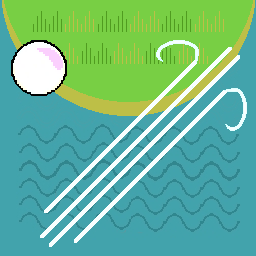</td>
<td>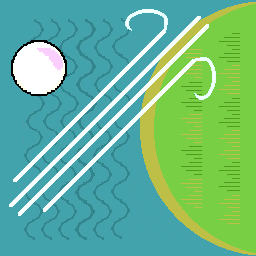</td>
<td>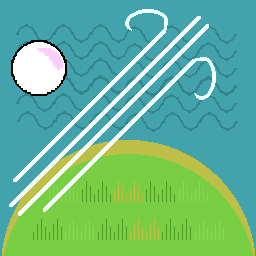</td>
<td>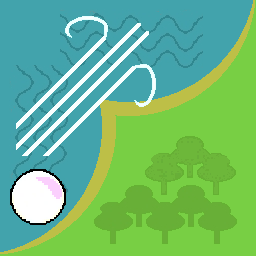</td>
<td>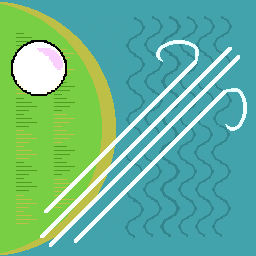</td>
<td>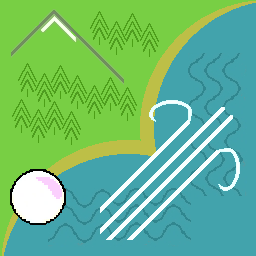</td>
<td>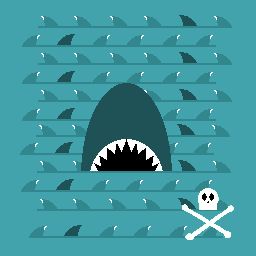</td>
</tr><tr>
<td></td>
<td style="text-align: center;">x 2</td>
<td style="text-align: center;">x 2</td>
<td style="text-align: center;">x 4</td>
<td style="text-align: center;">x 2</td>
<td style="text-align: center;">x 10</td>
<td style="text-align: center;">x 6</td>
<td style="text-align: center;">x 1 (Regular mode)</td>
</tr></table>

<!-- 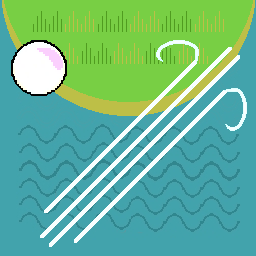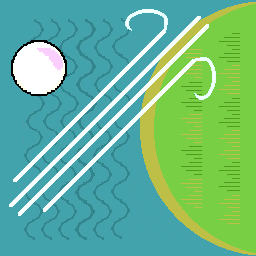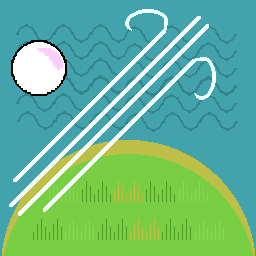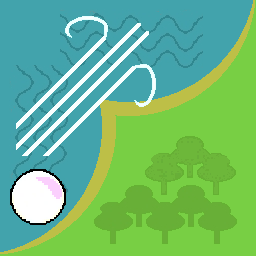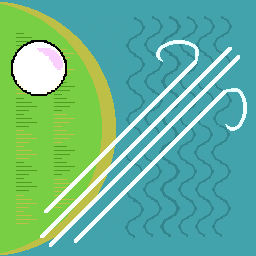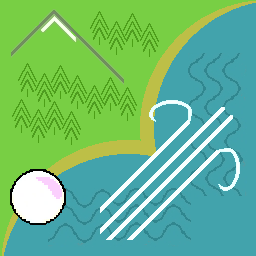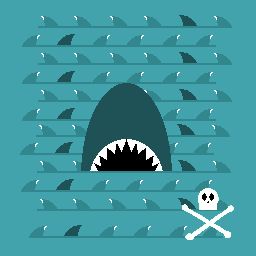 -->

In [8]:
class WaterTile(Tile):
    '''A specifically water backed tile'''
    tile_back = "water"
    
    def __init__(self, game, wind_direction, tile_edges, is_wonder = False):
        super().__init__(game, self.tile_back, wind_direction, tile_edges, is_wonder)

### Land tiles
These tiles will tend to have more land edges and can include both Wonders, that give wealth for discovery or trade, and Disasters, that remove all wealth from an Adventurer, encouraging play balancing risk against greater reward. 
<!-- ![Unexplored%20tile%20-%20land.png](attachment:Unexplored%20tile%20-%20land.png) -->
<!-- <img src="attachment:Unexplored%20tile%20-%20land.png" style="width: 100px;"> -->
<table><tr>
<td>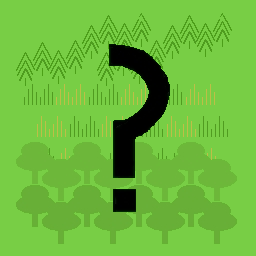</td>
<td>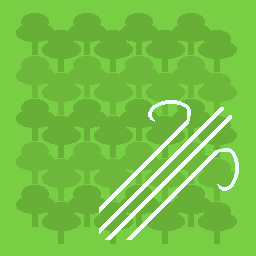</td>
<td>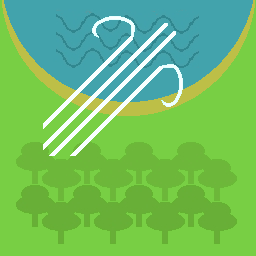</td>
<td>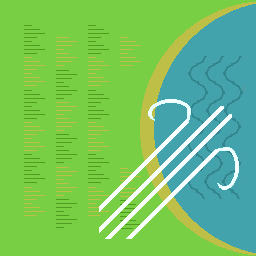</td>
<td>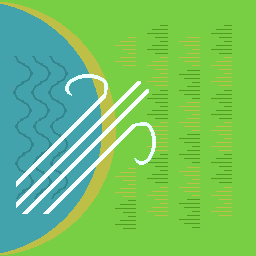</td>
<td>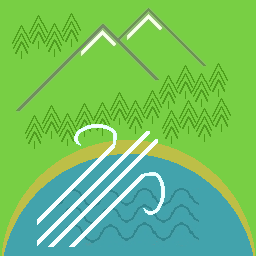</td>
<td>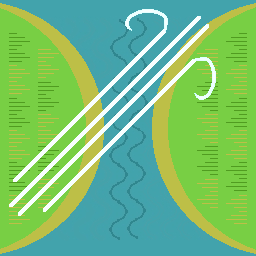</td>
<td>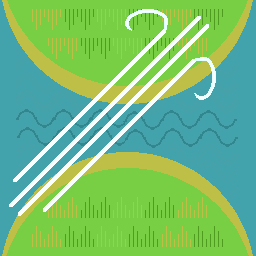</td>
</tr><tr>
<td style="text-align: center;">Tile back</td>
<td style="text-align: center;">x 2</td>
<td style="text-align: center;">x 5</td>
<td style="text-align: center;">x 5</td>
<td style="text-align: center;">x 5</td>
<td style="text-align: center;">x 5</td>
<td style="text-align: center;">x 10</td>
<td style="text-align: center;">x 5</td>
</tr><tr>
<td></td>
<td>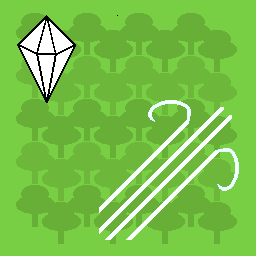</td>
<td>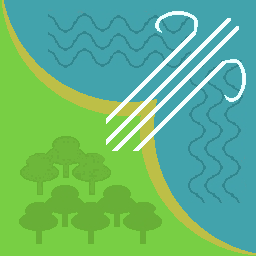</td>
<td>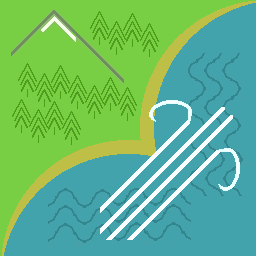</td>
<td>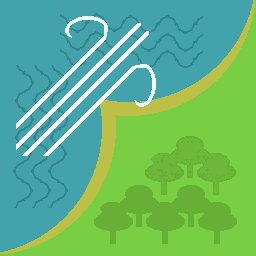</td>
<td>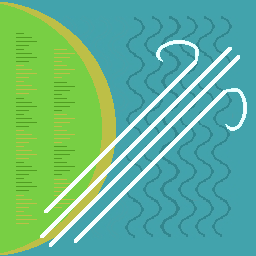</td>
<td>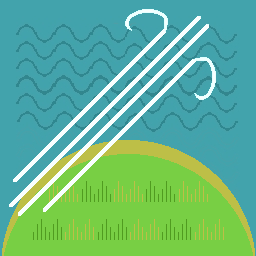</td>
<td>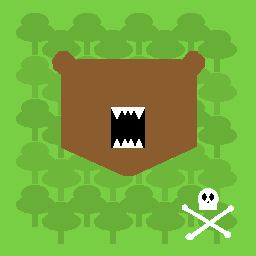</td>
</tr><tr>
<td></td>
<td style="text-align: center;">x 12</td>
<td style="text-align: center;">x 1</td>
<td style="text-align: center;">x 1</td>
<td style="text-align: center;">x 1</td>
<td style="text-align: center;">x 1</td>
<td style="text-align: center;">x 1</td>
<td style="text-align: center;">x 6</td>
</tr></table>

<!-- 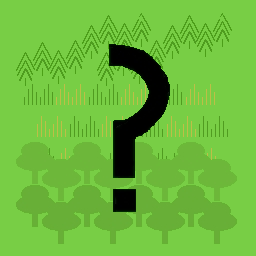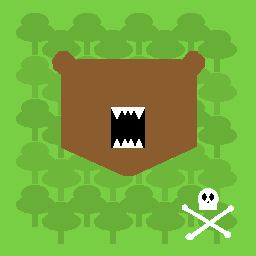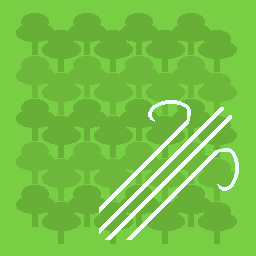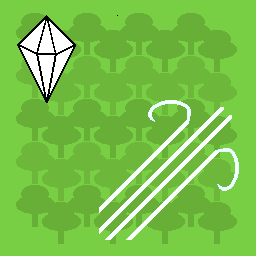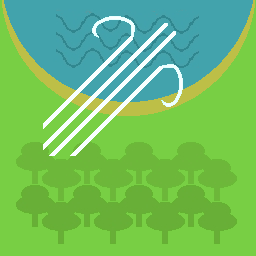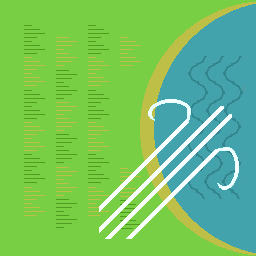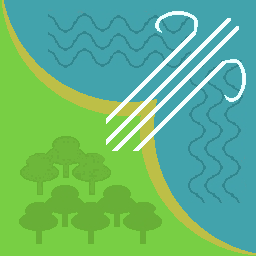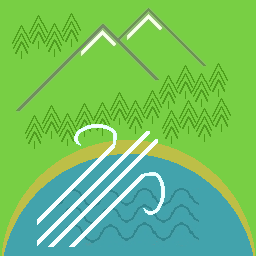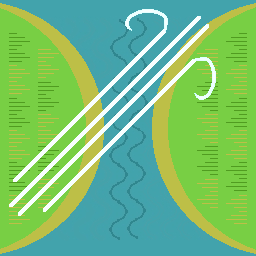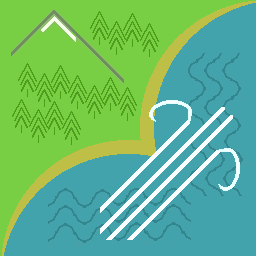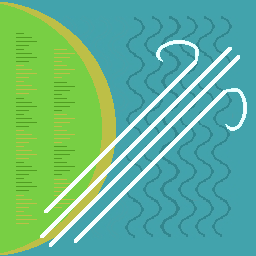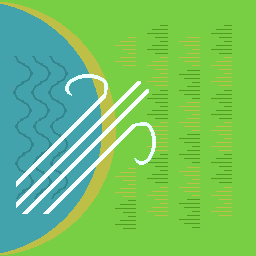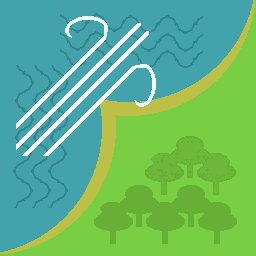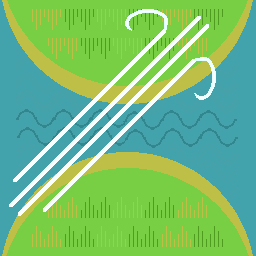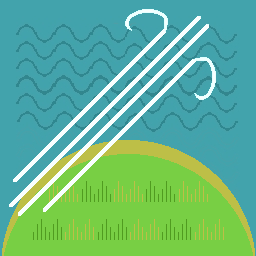 -->

In [9]:
class LandTile(Tile):
    '''A specifically land backed tile'''
    tile_back = "land"
    
    def __init__(self, game, wind_direction, tile_edges, is_wonder = False):
        super().__init__(game, self.tile_back, wind_direction, tile_edges, is_wonder)

<table><tr>
<td>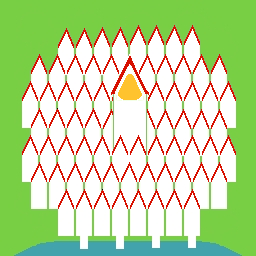</td>
<td><h3> City tiles - The Capital and The Mythical City</h3>
These tiles allow players to move wealth from an Adventurer's Chest to the Player's Vault, as well as investing wealth in more Adventurers or Agents. You can move in any direction from these tiles as if every edge was land.</td>
<td>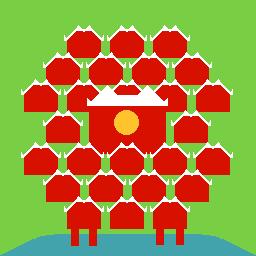</td>
</tr></table>
<!-- <table><tr><td><img src="attachment:Tiles%20-%20Capital.png" style="width: 100px;"></td><td><img src="attachment:Tiles%20-%20Mythical%20City.png" style="width: 100px;"></td></tr></table> -->
<!-- ![Tiles%20-%20Capital.png](attachment:Tiles%20-%20Capital.png)![Tiles%20-%20Mythical%20City.png](attachment:Tiles%20-%20Mythical%20City.png)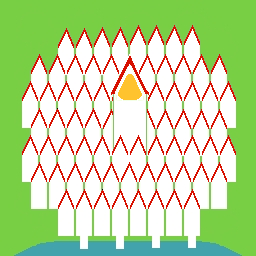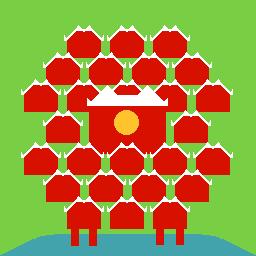 -->

<table><tr>
<td>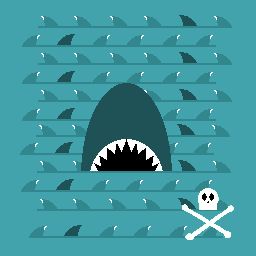</td>
<td><h3> Disaster tiles</h3>
When discovered, these tiles send the Adventurer back to the last city they visited with all the wealth from their Chest taken and left on the Disaster tile..</td>
<td>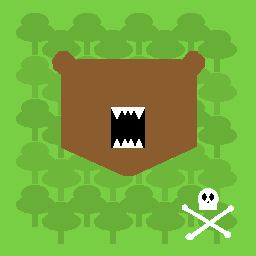</td>
</tr><tr>
<td style="text-align: center;">x 1</td>
<td></td>
<td style="text-align: center;">x 6</td>
</tr></table>
<!-- <table><tr><td><img src="attachment:Tiles%20-%20Capital.png" style="width: 100px;"></td><td><img src="attachment:Tiles%20-%20Mythical%20City.png" style="width: 100px;"></td></tr></table> -->
<!-- 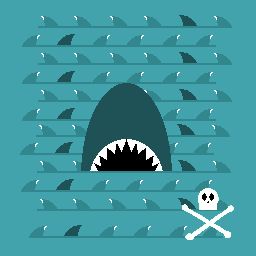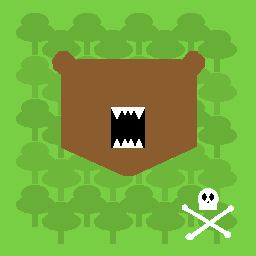 -->

In [10]:
class CityTile(LandTile):
    '''A template for Tiles representing cities in the game Cartolan
    
    Methods:
    __init__ taking a Game object and two Bools recording whether this is the Capital and whether it has been discovered 
    
    Interfaces:
    visit_city, bank_wealth, buy_adventurers, buy_agents
    '''
    tile_edges = TileEdges(uc_water = False, ua_water = False, dc_water = False, da_water = False)
    wind_direction = WindDirection(True, True)
    
    def __init__(self, game, is_capital, is_discovered):
        super().__init__(game, self.wind_direction, self.tile_edges, False)
        self.is_capital = is_capital
        self.is_discovered = is_discovered
        game.cities.append(self)
    
    def visit_city(self, adventurer):
        '''placeholder for interactions between an Adventurer and city'''
        return None
        
    def bank_wealth(self, adventurer):
        '''placeholder for letting players move wealth from an adventurer's Chest to their Vault'''
        return None
    
    def buy_adventurers(self, adventurer):
        '''placeholder for letting players buy another Adventurer using wealth from their Vault'''
        return None
        
    def buy_agents(self, adventurer):
        '''placeholder for letting players buy another Agent using wealth from their Vault'''
        return None

# 2. Quick references and method definitions

## Beginner mode - Exploration and Trade by sea

### Adventurers and Movement
Adventurers start out at cities and can each move over up to 4 edges between tiles each turn, or after resting at an Agent during a turn. There are two possible variants for their movement:

1. **Initial only** - After their first turn, the player cannot move across a water edge (blue) against the direction of the Wind Arrow on the tile they move from. After their second move they cannot cross land edges (green).
2. **Budgetted** - Within these 4 moves, they can cross land edges (green) at most 2 times or can cross a water edge (blue) 1 time against the direction of the Wind Arrow on the tile they move from.

After a move onto another tile, or using a move to wait on the same tile, an Adventurer can trade as part of that same move. Resting at a player’s own Agents is free, but 1 wealth is left with another player’s Agent. 

If they are moving into an empty space with no tile, then [exploration](###-Adventurers-and-Exploration---placing-new-tiles) will be needed.

### Adventurers and Exploration - placing new tiles
When an Adventurer moves into an empty space, a new tile should be drawn to fill that space from the pile, and placed so that the edges match colour with all adjacent tiles. The wind direction should be matched, but if it doesn’t fit then there are two possible variants on how to try different rotations of the tile:

1. **Clockwise first** - the tile should be tried rotated clockwise, then anticlockwise.
2. **Continuous wind** - the tile should be tried rotated 90 degrees so that the wind arrow from their previous tile still flows into the base of the new arrow, then tried rotated 90 degrees the other way.

If the tile cannot fit with its surrounding tiles, or only with the arrow pointing in the opposite direction from the previous tile, then it is put in the discard pile and up to four more tiles tried that move.

In [11]:
class AdventurerBeginner(Adventurer):
    '''Representing an Adventurer token with the movement and action possibilities from Beginner mode of Cartolan
    
    Methods:
    __init__ taking Game, Player, and CityTile objects from the Cartolan module
    can_move taking a string compass point
    exploration_needed taking two Int coordinates
    choose_pile
    choose_discard_pile
    move taking a string compass point
    wait
    explore taking two Int coordinates
    discover taking a Tile
    trade taking a Tile
    place_agent taking a Tile
    can_rest
    rest
    can_collect_wealth
    collect_wealth
    '''
    def __init__(self, game, player, starting_city):
        super().__init__(game, player, starting_city)
        
        print("adding an adventurer for " +str(player.colour)+ " player")
        
        self.max_exploration_attempts = game.EXPLORATION_ATTEMPTS
        self.max_downwind_moves = game.MAX_DOWNWIND_MOVES
        self.max_land_moves = game.MAX_LAND_MOVES
        self.max_upwind_moves = game.MAX_UPWIND_MOVES
        
        self.exploration_attempts = 0
        self.downwind_moves = 0
        self.upwind_moves = 0
        self.land_moves = 0
        
        self.turns_moved = 0
        self.latest_city = starting_city
        self.wonders_visited = []
    
    
    def can_move(self, compass_point):
        '''confirm whether the Adventurer can move in a given cardinal compass direction
        
        key arguments:
        String word or letter cardinal compass direction
        '''
        # check that instruction is valid: a direction provided or an explicit general check through a None
        if compass_point is None:
            print("Adventurer is checking whether any movement at all is possible")
            if ((self.game.movement_rules == "initial" or self.game.movement_rules == "budgetted")
                and self.max_downwind_moves <= self.land_moves + self.downwind_moves + self.upwind_moves):
                return False
            for compass_point in ["n","e","s","w"]:
                if self.can_move(compass_point):
                    return True
            return False
        elif not (compass_point.lower() in ["north","n","east","e","south","s","west","w"]): 
            raise Exception("invalid direction given for movement")
        
        # check whether move is possible over the edge
        print("Adventurer is checking whether movement is possible over the " +compass_point
              + " edge from their tile at " +str(self.current_tile.tile_position.latitude)+ "," 
              + str(self.current_tile.tile_position.longitude))
        if self.game.movement_rules == "initial": #this version 1 of movement allows land and upwind movement only initially after resting
            moves_since_rest = self.land_moves + self.downwind_moves + self.upwind_moves
            print("Adventurer has determined that they have moved " +str(moves_since_rest)+ " times since resting")
            if not self.current_tile.compass_edge_water(compass_point): #land movement needed
                if(moves_since_rest < self.max_land_moves):
                    return True
            elif (self.current_tile.compass_edge_water(compass_point) 
                  and self.current_tile.compass_edge_downwind(compass_point)): #downwind movement possible
                if (moves_since_rest < self.max_downwind_moves):
                    return True
            else: #if not land or downwind, then movement must be upwind
                if(moves_since_rest < self.max_upwind_moves):
                    return True
                else: return False
        elif self.game.movement_rules == "budgetted": #this version 2 of movement allows land and upwind movement any time, but a limited number before resting
            print("Adventurer has moved " +str(self.upwind_moves)+ " times upwind, " +str(self.land_moves)+ " times overland, and " +str(self.downwind_moves)+ " times downwind, since resting")
            if not self.current_tile.compass_edge_water(compass_point): #land movement needed
                if(self.land_moves < self.max_land_moves and self.upwind_moves == 0):
                    return True
            elif (self.current_tile.compass_edge_water(compass_point) 
                  and self.current_tile.compass_edge_downwind(compass_point)): #downwind movement possible
                if (self.downwind_moves + self.land_moves + self.upwind_moves < self.max_downwind_moves):
                    return True
            else: #if not land or downwind, then movement must be upwind
                if(self.upwind_moves < self.max_upwind_moves and self.land_moves == 0):
                    return True
                else: return False
        else: raise Exception("Invalid movement rules specified")
        
    
    def exploration_needed(self, latitude, longitude):
        '''check whether there is a tile already in a given space, or if exploration is needed
        
        key arguments:
        int latitude
        int longitude
        '''
        return self.game.play_area.get(latitude) is None or self.game.play_area.get(latitude).get(longitude) is None
        
    def choose_pile(self, compass_point):
        ''' establish which pile to draw from - always the water tile in beginner mode'''
        tile_pile = self.game.tile_piles["water"]
        print("Identifying the " +tile_pile.tile_back+ " tile pile, which still has " +str(len(tile_pile.tiles)) +" tiles")
        return tile_pile
    
    def choose_discard_pile(self, compass_point):
        ''' establish which pile to draw from - always the water tile in beginner mode'''
        discard_pile = self.game.discard_piles["water"]
        print("Identifying the " +discard_pile.tile_back+ " discard pile, which still has " +str(len(discard_pile.tiles)) +" tiles")
        return discard_pile 
    
    def move(self, compass_point):        
        '''move the Adventurer over the tile edge in a given cardinal compass direction
        
        key arguments:
        String word or letter cardinal compass direction
        '''
        moved = False
        
        # check whether the next tile exists and explore if needed, movement rules can be either "initial" or "budgetted"
        if self.can_move(compass_point):
            #include this in the number of moves so far since resting - even if exploration subsequently fails
            if not self.current_tile.compass_edge_water(compass_point): #land movement
                print("Making a land move")
                self.land_moves += 1
            elif self.current_tile.compass_edge_downwind(compass_point): #downwind movement possible
                print("Making a downwind water move")
                self.downwind_moves += 1
            else: #if not land or downwind, then movement must have been upwind
                print("Making an upwind water move")
                self.upwind_moves += 1
            
            #locate the space in the play area that the Adventurer is moving into
            latitude_increment = int(compass_point.lower() in ["east","e"]) - int(compass_point.lower() in ["west","w"])
            new_latitude = self.current_tile.tile_position.latitude + latitude_increment
            longitude_increment = int(compass_point.lower() in ["north","n"]) - int(compass_point.lower() in ["south","s"])
            new_longitude = self.current_tile.tile_position.longitude + longitude_increment

            #is this an existing tile or is exploration needed?
            if self.exploration_needed(new_latitude, new_longitude):
                # establish which pile to draw from - always the water tile in beginner mode
                tile_pile = self.choose_pile(compass_point)
                discard_pile = self.choose_discard_pile(compass_point)
                
                if self.explore(tile_pile, discard_pile, new_latitude, new_longitude, compass_point):
                    # if this is a Wonder then discovery should be automatic
#                     if isinstance(self.current_tile, WonderTile):
                    if self.current_tile.is_wonder:
                        self.discover(self.current_tile)             
                
                    #place the Adventurer on the newly placed Tile
                    self.current_tile = self.game.play_area.get(new_latitude).get(new_longitude)
                    self.current_tile.move_onto_tile(self)
                    
                    #check whether an agent can be placed and then whether the player wants to
                    self.place_agent()
                    
                    moved = True
                
            else:
                #place the Adventurer on the next existing Tile
                self.current_tile = self.game.play_area.get(new_latitude).get(new_longitude)
                self.current_tile.move_onto_tile(self)

                #check whether this is a city and remember the visit
                if isinstance(self.current_tile, CityTile):
                    self.current_tile.visit_city(self)
                
                #check whether this is a wonder, and if the player wants to trade
                if self.current_tile.is_wonder:
                    if self.player.check_trade(self, self.current_tile):
                        self.trade(self.current_tile)
                
                #check whether there is an agent here and then check rest
                if self.current_tile.agent:
                    agent = self.current_tile.agent
                    if agent.player == self.player:
                        if agent.wealth > 0:
                            if self.player.check_collect_wealth(agent):
                                self.collect_wealth()
                    if self.player.check_rest(self, agent):
                        self.rest()
                moved = True
        
        #check whether any more moves will be possible
        if not self.can_move(None):
            print("Adventurer determined that cannot move any more, so finishing turn")
            self.turns_moved += 1
            #the adventurer will rest now before the next turn and be ready
            self.downwind_moves = 0
            self.land_moves = 0
            self.upwind_moves = 0
        
        return moved
        
    
    def wait(self):
        '''Allows the Adventurer to just wait in place rather than moving, to end a turn early'''
        print("Adventurer is choosing to wait in place")
        self.downwind_moves += 1
        
        #check whether this is a city and remember the visit
        if isinstance(self.current_tile, CityTile):
            self.current_tile.visit_city(self)

        #check whether this is a wonder, and if the player wants to trade
        if self.current_tile.is_wonder:
            if self.player.check_trade(self, self.current_tile):
                self.trade(self.current_tile)

        #check whether there is an agent here and then check rest
        if self.current_tile.agent:
            agent = self.current_tile.agent
            if agent.player == self.player:
                if agent.wealth > 0:
                    if self.player.check_collect_wealth(agent):
                        self.collect_wealth()
            if self.player.check_rest(self, agent):
                self.rest()
        
        if not self.can_move(None):
            print("Adventurer determined that cannot move any more, so finishing turn")
            self.turns_moved += 1
            #the adventurer will rest now before the next turn and be ready
            self.downwind_moves = 0
            self.land_moves = 0
            self.upwind_moves = 0

    
    def explore(self, tile_pile, discard_pile, latitude, longitude, compass_point_moving):        
        '''Randomly tries and suitably places a Tile where an Adventurer moves into a space with no Tile
        
        key arguments:
        TilePile the tile of piles that should be drawn from given the edge that is being moved over.
        TilePile the corresponding discard pile for unsuitable tiles
        int the latitude of the space to explore
        int the longitude of the space to explore
        String giving the word or letter for cardinal compass direction from which the Adventurer is moving
        '''
        print("Exploring to the " +compass_point_moving+ " into the slot at " +str(latitude)+ "," +str(longitude)+ " which has edges...")
        
        # get the adjoining edges from the neighbouring tiles, if any
        adjoining_edge_water = {"n":None, "e":None, "s":None, "w":None}
            
        for latitude_increment in [- 1, 1]:
            if not self.game.play_area.get(latitude + latitude_increment) is None:
                neighbour_tile = self.game.play_area.get(latitude + latitude_increment).get(longitude)
                if not neighbour_tile is None:
                    #for the tile -1 latitude it will be the eastern edge that is relevant
                    if latitude_increment == -1:
                        adjoining_edge_water["w"] = neighbour_tile.compass_edge_water("east")
                    else:
                        adjoining_edge_water["e"] = neighbour_tile.compass_edge_water("west")
        for longitude_increment in [- 1, 1]:
            if not self.game.play_area.get(latitude) is None:
                neighbour_tile = self.game.play_area.get(latitude).get(longitude + longitude_increment)
                if not neighbour_tile is None:
                    #for the tile -1 longitude it will be the northern edge that is relevant
                    if longitude_increment == -1:
                        adjoining_edge_water["s"] = neighbour_tile.compass_edge_water("north")
                    else:
                        adjoining_edge_water["n"] = neighbour_tile.compass_edge_water("south")
        
        print("North: " +str(adjoining_edge_water["n"])+ ", East: " +str(adjoining_edge_water["e"])+ ", South: " +str(adjoining_edge_water["s"])+ ", West: " +str(adjoining_edge_water["w"]))
        # take multiple attempts at drawing a suitable tile from the pile
        self.exploration_attempts = 0 # this does nothing else right now...
        for attempt in range(0, self.max_exploration_attempts):
            self.exploration_attempts += 1
            if tile_pile.tiles:
                print("Drawing a tile from the " +tile_pile.tile_back+ " tile deck, which has " +str(len(tile_pile.tiles))+ " tiles")
                potential_tile = tile_pile.draw_tile()
            elif discard_pile.tiles:
                print("Have found main tile pile empty, so shuffling Discard Pile")
                self.game.refresh_pile(tile_pile, discard_pile)
                tile_pile = self.game.tile_piles[tile_pile.tile_back]
                discard_pile = self.game.discard_piles[discard_pile.tile_back]
                potential_tile = tile_pile.draw_tile()
            else: #the game is over, and so this exploration and the turn too
                self.turns_moved += 1
                self.game.game_over = True
                break
            print("Have drawn a tile with edges N:" +str(potential_tile.compass_edge_water("n"))
                  +";E:"+str(potential_tile.compass_edge_water("e"))
                  +";S:"+str(potential_tile.compass_edge_water("s"))
                  +";W:"+str(potential_tile.compass_edge_water("w"))
                  + " and with wind direction N:" +str(potential_tile.wind_direction.north)
                  +";E:"+str(potential_tile.wind_direction.east))
            # rotate it to the orientation of the current tile
            def null():
                pass
            while not (potential_tile.wind_direction.north == self.current_tile.wind_direction.north and 
                       potential_tile.wind_direction.east == self.current_tile.wind_direction.east):
                potential_tile.rotate_tile_clock()
            print("...after rotating to match wind, it has edges N:" +str(potential_tile.compass_edge_water("n"))
                  +";E:"+str(potential_tile.compass_edge_water("e"))
                  +";S:"+str(potential_tile.compass_edge_water("s"))
                  +";W:"+str(potential_tile.compass_edge_water("w"))
                  + " and wind direction N:" +str(potential_tile.wind_direction.north)
                  +";E:"+str(potential_tile.wind_direction.east))
            
            # check whether the tile will place, rotating as needed
            if self.game.exploration_rules == "clockwise": # this version 1 of exploration rules will just try a clockwise rotation and then an anti
                rotations = [null, potential_tile.rotate_tile_anti, potential_tile.rotate_tile_clock] # remember these will pop in reverse order, print used as a null function that will do nothing to the potential tile
            elif  self.game.exploration_rules == "continuous": # this version 2 of the exploration rules will try to line up arrows head to toe as a first preference 
                #the rotation will be anti first if and only if the wind direction is north-east or south-west and the movement is north or south
                if ((self.current_tile.wind_direction.north and self.current_tile.wind_direction.east) 
                    or (not self.current_tile.wind_direction.north and not self.current_tile.wind_direction.east)):
                    if compass_point_moving in ["n","s"]:
                        rotations = [null, potential_tile.rotate_tile_clock, potential_tile.rotate_tile_anti]
                    else:
                        rotations = [null, potential_tile.rotate_tile_anti, potential_tile.rotate_tile_clock]
                #the rotation will be anti first if and only if the wind direction is north-west or south-east and the movement is north or south
                elif (self.current_tile.wind_direction.north and not self.current_tile.wind_direction.east) or (not self.current_tile.wind_direction.north and not self.current_tile.wind_direction.east):
                    if compass_point_moving in ["n","s"]:
                        rotations = [null, potential_tile.rotate_tile_anti, potential_tile.rotate_tile_clock]
                    else:
                        rotations = [null, potential_tile.rotate_tile_clock, potential_tile.rotate_tile_anti]
                else: raise Exception("Failed to exhaust wind directions")
            
            while len(rotations) > 0:
                compass_points = ["n", "e", "s", "w"]
                edge_matches = True
                while edge_matches and len(compass_points) > 0:
                    compass_point = compass_points.pop()
                    print("checking tile matches on the " +compass_point.upper()+ ", where an adjoining edge of "
                         +str(adjoining_edge_water[compass_point])+ " must match with the tile's "
                          + str(potential_tile.compass_edge_water(compass_point)))
                    edge_matches = adjoining_edge_water[compass_point] is None or adjoining_edge_water[compass_point] == potential_tile.compass_edge_water(compass_point)

                if edge_matches:
                    # place tile and feed back to calling function that tile has been placed
                    potential_tile.place_tile(latitude, longitude)
                    # if this filled a gap in the map then award the adventurer 5 wealth
                    if (not adjoining_edge_water['n'] is None 
                        and not adjoining_edge_water['e'] is None
                        and not adjoining_edge_water['s'] is None
                        and not adjoining_edge_water['w'] is None):
                        print(str(self.player)+" player filled a gap in the map and was awarded " +str(self.game.VALUE_FILL_MAP_GAP))
                        self.wealth += self.game.VALUE_FILL_MAP_GAP
                    return True
                else:
                    #return the tile to the same wind direction as the original
                    while not (potential_tile.wind_direction.north == self.current_tile.wind_direction.north and 
                           potential_tile.wind_direction.east == self.current_tile.wind_direction.east):
                        potential_tile.rotate_tile_anti()
                    # rotate the tile according to the alternative options in the exploration method
                    rotations.pop()()
                    print("rotated tile, so that its wind points N:" +str(potential_tile.wind_direction.north)
                         + ";E:"+ str(potential_tile.wind_direction.east))
            # discard the tile
            discard_pile.add_tile(potential_tile)
            
        # feed back to calling function that a tile has NOT been placed
        print("Exploration failed")
        self.game.num_failed_explorations += 1
        return False
            
        
    def discover(self, tile):
        '''awards an extra bonus when exploration first reveals a Wonder tile
        
        key arguments:
        Cartolan.Tile giving the Wonder Tile that has just been discoverred.
        '''
        #check whether this tile is inside a city's domain, four or less tiles from it by taxi norm, and just trade instead if so
        for city_tile in self.game.cities:
            city_latitude = city_tile.tile_position.latitude
            city_longitude = city_tile.tile_position.longitude
            if (abs(tile.tile_position.latitude - city_latitude) 
                + abs(tile.tile_position.longitude - city_longitude) <= self.game.CITY_DOMAIN_RADIUS):
                self.trade(tile)
                return False
        
        #award wealth
        self.wealth += self.game.VALUE_DISCOVER_WONDER[tile.tile_back]
        self.wonders_visited.append(tile)
        return True
        
        
    def trade(self, tile):
        '''awards wealth when a Wonder tile is visited for the first time since the last visit to a city
        
        key arguments:
        Cartolan.Tile giving the tile that has been visited
        '''
        #confirm that this tile is a Wonder
#         if isinstance(tile, WonderTile):
        if not tile.is_wonder:
            return False
        
        # check that Adventurer hasn't visited this Wonder yet, since visiting a city
        if tile in self.wonders_visited:
            return False
        
        # check whether there is an Agent on the tile
        if not tile.agent is None:
            tile.agent.manage_trade(self)
        
        # collect appropriate wealth into Chest
        print("Adventurer is trading on tile " 
                  +str(tile.tile_position.latitude)+ "," +str(tile.tile_position.longitude))
        self.wealth += self.game.VALUE_TRADE
        
        # keep track of visiting this Wonder
        self.wonders_visited.append(tile)
        
        return True
    
    
    def place_agent(self):
        '''places an Agent as a tile is first placed through exploration'''
        tile = self.current_tile
        #check whether this tile is inside a city's domain, four or less tiles from it by taxi norm, and just trade instead if so
        for city_tile in self.game.cities:
            city_latitude = city_tile.tile_position.latitude
            city_longitude = city_tile.tile_position.longitude
            if (abs(tile.tile_position.latitude - city_latitude) 
                + abs(tile.tile_position.longitude - city_longitude) <= self.game.CITY_DOMAIN_RADIUS):
                return False
        
        #check that the adventurer has requisite wealth in their Chest
        if self.wealth >= self.game.COST_AGENT_EXPLORING:

            #check whether the player actually wants to place an agent
            if len(self.player.agents) >= self.game.MAX_AGENTS:
                agent_to_move = self.player.check_move_agent(self)
                #check whether the tile already has an active Agent 
                if agent_to_move:
                    if not tile.agent is None: #extend to deal with dispossessed agents in Regular
                        return False
                    self.wealth -= self.game.COST_AGENT_EXPLORING
                    #pick up the Agent from its existing tile if there are no other agents available
                    #otherwise get a new agent
                    agent_to_move.current_tile.move_off_tile(agent_to_move)
                    tile.move_onto_tile(agent_to_move)
                    
                    return True
            else:
                #check whether the player actually wants to place an agent
                if self.player.check_place_agent(self):
                    if not tile.agent is None: #extend to deal with dispossessed agents in Regular
                        return False
                    
                    self.wealth -= self.game.COST_AGENT_EXPLORING
#                     AgentBeginner(self.game, self.player, tile)
                    self.game.AGENT_TYPE(self.game, self.player, tile)

                    return True
        return False
            
    
    def can_rest(self):
        '''checks whether the Adventurer can rest with an Agent on this tile'''
        tile = self.current_tile
        # check whether there is an agent on the tile
        if tile.agent is None:
            return False
        
        # can the adventurer afford rest here?
        if tile.agent.player == self.player or self.wealth > self.game.COST_AGENT_REST:
            return True
        else:
            return False
    
    
    def rest(self):
        '''rests with an Agent if there is one on the tile'''
        tile = self.current_tile
        # check whether there is an agent on the tile
        if tile.agent is None:
            return False
        
        # use the agent if there is enough Chest wealth to
        if tile.agent.player == self.player or self.wealth >= self.game.COST_AGENT_REST:
            print("Adventurer is resting with the agent on tile " 
                  +str(tile.tile_position.latitude)+ "," +str(tile.tile_position.longitude))
            tile.agent.give_rest(self)
            return True
        else:
            return False

    
    def can_collect_wealth(self):
        '''checks whether there is wealth with an Agent on the current tile that can be collected'''
        tile = self.current_tile
        #check whether there is an agent on the tile
        if tile.agent is None:
            return False
        #check that the agent shares a player
        if tile.agent.player == self.player and tile.agent.wealth > 0:
            return True
        else:
            return False
        

    def collect_wealth(self):
        '''Collects any wealth that is with any Agent of the same player on the current tile'''
        tile = self.current_tile
        #check whether there is an agent on the tile
        if tile.agent is None:
            return False
        else:
            #check that the agent shares a player
            agent = tile.agent
            if tile.agent.player == self.player:
                #transfer wealth
                print("Adventurer is collecting " +str(agent.wealth)+ " wealth from the agent on tile "
                     +str(agent.current_tile.tile_position.latitude)+","+str(agent.current_tile.tile_position.longitude))
                self.wealth += agent.wealth
                agent.wealth = 0
                return True
            else:
                return False
        
# Unit test, collects wealth from wonder tile

# Unit test, cannot place mismatched tiles - all land next to a water

# Unit test, rotation clockwise then anticlockwise returns wind direction and compass edges
# tile = Tile(Game([Player(),Player()]),wind_direction=WindDirection(True,True),tile_edges = TileEdges(True, False, False, False))
# print(str(tile.wind_direction.north)+str(tile.wind_direction.east))
# rotations = [print, tile.rotate_tile_anti, tile.rotate_tile_clock]
# print(str(tile.wind_direction.north)+str(tile.wind_direction.east))
# rotations.pop()()
# print(str(tile.wind_direction.north)+str(tile.wind_direction.east))
# print(str(tile.compass_edge_water("w")))
# rotations.pop()()
# print(str(tile.wind_direction.north)+str(tile.wind_direction.east))
# print(str(tile.compass_edge_water("w")))
# rotations.pop()()
# print(str(tile.wind_direction.north)+str(tile.wind_direction.east))

### Agents
Agents can be placed on any new tile more than four tiles from a city, costing the moving Adventurer 3 wealth. If placed on a Wonder tile, an Agent will collect 1 wealth whenever a Trade takes place on that tile, collected by the player’s next visiting Adventurer. An Agent is dispossessed if an opponent’s Adventurer successfully attacks it, awarding them all the wealth it was holding plus 1. An Agent is restored by its own player’s Adventurer visiting and paying 1 wealth.

In [12]:
class AgentBeginner(Agent):
    '''Represents Agent tokens with their behaviours for Beginner mode of the game Cartolan
    
    Methods:
    __init__ takes Cartolan.Game, Cartolan.Player, and Cartolan.Tile objects
    give_rest takes a Cartolan.Adventurer
    manage_trade takes a Cartolan.Adventurer
    '''
    def __init__(self, game, player, tile):
        super().__init__(game, player, tile)
    
    def give_rest(self, adventurer):
        '''Resets the move counts for an Adventurer token, so that they can continue to move
        
        Arguments:
        Cartolan.Adventurer the Adventurer to rest
        '''
        #check whether Adventurer is from same player and charge if other player
        if not adventurer.player == self.player:
            # pay as necessary
            adventurer.wealth -= 1
        
        # reset move count
        adventurer.downwind_moves = 0
        adventurer.upwind_moves = 0
        adventurer.land_moves = 0
        
        return True
    
    def manage_trade(self, adventurer):
        '''Receives wealth when trade takes place on its tile, either keeping this or giving it to an Adventurer of the same player
        
        Arguments:
        Cartolan.Adventurer the Adventurer making the trade
        '''
        #check whether Adventurer trading is from the same player
        if adventurer.player == self.player:
            print("Agent on tile " +str(self.current_tile.tile_position.latitude)+","
                  +str(self.current_tile.tile_position.latitude)+ " has given monopoly bonus to Adventurer")
            # pay as necessary
            adventurer.wealth += 1
        else:
            # retain wealth if they are a different player
            print("Agent on tile " +str(self.current_tile.tile_position.latitude)+","
                  +str(self.current_tile.tile_position.latitude)+ " has kept monopoly bonus")
            self.wealth += 1
        
        return True

### Cities (Capital and Mythical): 
Within four moves of a city in any directions, Agents cannot be placed and discovering new Wonders gives no wealth. When finishing a move in a city you can move wealth from an Adventurer’s Chest into the player’s Vault, and buy another Adventurer for 10 wealth. You can also place an Agent on any tile that doesn’t have an active Agent or an opponent’s Adventurer for 5 wealth, or where you have an Adventurer for 3 wealth. Victory is awarded to the player with the most wealth in their Vault, either when one player is more than 25 ahead, or when one colour of tile runs out.

In [13]:
class CityTileBeginner(CityTile):
    '''Represents a city tile in the Beginner mode for the game Cartolan
    
    Methods:
    visit_city takes a Cartolan.Adventurer
    bank_wealth takes a Cartolan.Adventurer
    buy_adventurer takes a Cartolan.Adventurer
    buy_agent takes a Cartolan.Adventurer
    '''
    
    def visit_city(self, adventurer):
        '''Initiates all the possible actions when a city is visited
        
        Arguments:
        Cartolan.Adventurer the Adventurer arriving on the City tile
        '''
        #reset Adventurer's list of visited Wonders
        adventurer.wonders = []
        
        #record that this is the latest city visited
        adventurer.latest_city = self
        
        self.bank_wealth(adventurer)
        
        self.buy_adventurers(adventurer)
        
        self.buy_agents(adventurer)
        
        return True
    
    
    def bank_wealth(self, adventurer):
        '''Offers a player to move wealth from their Adventurer's Chest into their Vault
        
        Arguments:
        Cartolan.Adventurer the Adventurer that has arrived at the City
        '''
        #check whether and how much the player wants to bank
        wealth_to_bank = adventurer.player.check_bank_wealth(adventurer)
        #check if wealth is available and move it from the adventurer's Chest to their Vault
        if adventurer.wealth >= wealth_to_bank:
            adventurer.wealth -= wealth_to_bank
            adventurer.player.vault_wealth += wealth_to_bank
            print(adventurer.player.colour+ " player has banked " +str(wealth_to_bank)+ " in their Vault")
            self.game.check_win_conditions()
            return True
        else:
            return False
    
    def buy_adventurers(self, adventurer):
        '''Offers the Player of an Adventurer arriving at the City Tile to buy another Adventurer
        
        Arguments:
        Cartolan.Adventurer the Adventurer arriving at the City
        '''
        #keep checking whether the player wants another adventurer until they refuse
        while adventurer.player.check_buy_adventurer(self):
            #check that player has appropriate wealth in the Vault, and subtract if available
            if (len(adventurer.player.adventurers) < adventurer.game.MAX_ADVENTURERS 
                and adventurer.player.vault_wealth >= adventurer.game.COST_ADVENTURER):
                adventurer.player.vault_wealth -= adventurer.game.COST_ADVENTURER
                #place another Adventurer for this Player on the City tile
#                 new_adventurer = AdventurerBeginner(adventurer.game, adventurer.player, self)
                new_adventurer = adventurer.game.ADVENTURER_TYPE(adventurer.game, adventurer.player, self)
                self.adventurers.append(new_adventurer)
                print(adventurer.player.colour+ " player has bought an adventurer from the city at " 
                      +str(self.tile_position.latitude)+","+str(self.tile_position.longitude))
            else:
                return False
        return True
        
        
    def buy_agents(self, adventurer):
        '''Offers the Player of an Adventurer arriving at the City Tile to buy another Agent and place it on any unclaimed tile
        
        Arguments:
        Cartolan.Adventurer the Adventurer arriving at the City
        '''
        #keep checking whether the player wants another adventurer until they refuse
        tile, agent_to_move = adventurer.player.check_buy_agent(adventurer, report="Do you want to place an agent, and where?") 
        while tile:
            #check whether this tile is inside a city's domain, four or less tiles from it by taxi norm, and just trade instead if so
            for city_tile in self.game.cities:
                city_latitude = city_tile.tile_position.latitude
                city_longitude = city_tile.tile_position.longitude
                if (abs(tile.tile_position.latitude - city_latitude) 
                    + abs(tile.tile_position.longitude - city_longitude) <= self.game.CITY_DOMAIN_RADIUS):
                    tile, agent_to_move = adventurer.player.check_buy_agent(adventurer, report="You cannot place an agent in a city's domain. Is there somewhere else you'd like to place one?")
                    continue

            #check that the player has requisite wealth in their Vault
            if adventurer.player.vault_wealth >= adventurer.game.COST_AGENT_FROM_CITY:
                #check whether the tile already has an active Agent 
                if not tile.agent is None:
                    return False
                else:
                    adventurer.player.vault_wealth -= adventurer.game.COST_AGENT_FROM_CITY
                    #pick up the Agent from its existing tile if there are no other agents available
                    #otherwise get a new agent
                    if len(adventurer.player.agents)  >= self.game.MAX_AGENTS:
                        tile.move_off_tile(agent_to_move)
                        print(adventurer.player.colour+ " player is recalling their agent from the tile at " 
                          +str(agent_to_move.current_tile.tile_position.latitude)
                              +","+str(agent_to_move.current_tile.tile_position.longitude))
                    else:
#                         agent = AgentBeginner(adventurer.game, adventurer.player, tile)
                        agent = adventurer.game.AGENT_TYPE(adventurer.game, adventurer.player, tile)

                    #place the Agent on that tile
                    tile.move_onto_tile(agent)
                    print(adventurer.player.colour+ " player has hired an agent from the city at " 
                      +str(self.tile_position.latitude)+","+str(self.tile_position.longitude)
                         +" and sent them to the tile at "
                         +str(tile.tile_position.latitude)+","+str(tile.tile_position.longitude))
        return True

### Wonders
When turned over these tiles grant 5 wealth to the Adventurer. Subsequent visits will grant 2 wealth from Trade, but only once for each Adventurer between visits to a city.

In [14]:
# class WonderTile(Tile):
#     def __init__(game, is_wonder):
#         super().
    
#     def reward_discovery(adventurer): # This is handled in the Adventurer class atm
#         #check what kind of tile this is and look up the reward
        
#         #add wealth to Adventurer's Chest
#         pass
    
#     def reward_trade(adventurer): # This is handled in the Adventurer class atm
#         #check that adventurer has not visited this tile already since their last visit to a city
        
#         #check whether there is an active Agent on this tile and involve them in the trade if so
#         pass

# class WaterWonderTile(WonderTile)

## Regular mode - inland exploration and piracy

### Adventurers and Attacking - Piracy and Arrest
An Adventurer can attack another (non-pirate) Adventurer or Agent immediately on the tile where they finish a move. They become a pirate, then carrying the Pirate token. Until they visit a city, they cannot trade, or rest at other players’ Agents, but they can move onto and off Disaster tiles as if all the edges were land. When an Adventurer attacks another player, or tries to arrest a pirate on the same tile, they only succeed if two rolls of the die don’t match. Successful attack against an Adventurer takes half their wealth, against an Agent takes all their wealth plus one, and against a pirate removes all their wealth, returns them to their last city and awards 5 wealth to the arrester’s Vault.

### Adventurers and Inland exploration
Unlike beginner mode, when an Adventurer moves over a tile edge into an empty space, a new tile should be drawn from the pile of the same colour as that edge. When one of these tiles has Wonder, the player turning it over is rewarded with 10 wealth.

### Adventurers and upwind or unburdened movement
If an Adventurer’s Chest is empty, then they move up to three times across land edges (green) between tiles, or up to twice over water edges (blue) against the direction of the wind arrow on the tile they move from, since starting their turn or resting. After these allotted upwind moves, the player may roll a gust against the prevailing wind on the die in order to move across a water edge upwind.

In [15]:
class AdventurerRegular(AdventurerBeginner):
    '''An extension to the AdventurerBeginner class that introduces extra behaviours available in Regular mode Cartolan
    
    Methods:
    __init__ takes Cartolan.Game, Cartolan.Player, and Cartolan.Tile
    choose_pile takes a String giving the latter or word for a cardinal compass direction
    choose_discard_pile takes a String giving the latter or word for a cardinal compass direction
    can_move takes takes a String giving the latter or word for a cardinal compass direction
    move takes a String giving the latter or word for a cardinal compass direction
    wait
    attack takes a Cartolan.Token object
    restore_agent takes a Cartolan.Agent object
    '''
    def __init__(self, game, player, starting_city):
        super().__init__(game, player, starting_city)
        self.pirate_token = False
        
        self.max_upwind_moves_unburdened = 2
        self.max_land_moves_unburdened = 3
    
    def choose_pile(self, compass_point):
        # establish which pile to draw from, based on the edge being moved over from the preceding tile
        if self.current_tile.compass_edge_water(compass_point):
            tile_pile = self.game.tile_piles["water"]
            print("Identified the " +tile_pile.tile_back+ " tile pile, which still has " +str(len(tile_pile.tiles)) +" tiles")
            return tile_pile
        else:
            tile_pile = self.game.tile_piles["land"]
            print("Identified the " +tile_pile.tile_back+ " tile pile, which still has " +str(len(tile_pile.tiles)) +" tiles")
            return tile_pile
    
    def choose_discard_pile(self, compass_point):
        # establish which pile to draw from, based on the edge being moved over from the preceding tile
        if self.current_tile.compass_edge_water(compass_point):
            discard_pile = self.game.discard_piles["water"]
            print("Identified the " +discard_pile.tile_back+ " discard pile, which still has " +str(len(discard_pile.tiles)) +" tiles")
            return discard_pile
        else:
            discard_pile = self.game.discard_piles["land"]
            print("Identified the " +discard_pile.tile_back+ " discard pile, which still has " +str(len(discard_pile.tiles)) +" tiles")
            return discard_pile
            
    # Whether movement is possible is handled much like the Beginner mode, except that carrying no wealth increases upwind and land moves, and a dice roll can allow upwind movement
    def can_move(self, compass_point): 
        # check that instruction is valid: a direction provided or an explicit general check through a None
        if compass_point is None:
            print("Adventurer is checking whether any movement at all is possible")
            if ((self.game.movement_rules == "initial" or self.game.movement_rules == "budgetted")
                and self.max_downwind_moves <= self.land_moves + self.downwind_moves + self.upwind_moves):
                return False
            for compass_point in ["n","e","s","w"]:
                if self.can_move(compass_point):
                    return True
            return False
        elif not (compass_point.lower() in ["north","n","east","e","south","s","west","w"]): 
            raise Exception("invalid direction given for movement")
        
        # check whether move is possible over the edge
        print("Adventurer is checking whether movement is possible over the " +compass_point
              + " edge from their tile at " +str(self.current_tile.tile_position.latitude)+ "," 
              + str(self.current_tile.tile_position.longitude))
        if self.game.movement_rules == "initial": #this version 1 of movement allows land and upwind movement only initially after resting
            moves_since_rest = self.land_moves + self.downwind_moves + self.upwind_moves
            print("Adventurer has determined that they have moved " +str(moves_since_rest)+ " times since resting")
            if not self.current_tile.compass_edge_water(compass_point): #land movement needed
                if(moves_since_rest < self.max_land_moves 
                   or (self.wealth == 0 and moves_since_rest < self.max_land_moves_unburdened)):
                    return True
            elif (self.current_tile.compass_edge_water(compass_point) 
                  and self.current_tile.compass_edge_downwind(compass_point)): #downwind movement possible
                if (moves_since_rest < self.max_downwind_moves):
                    return True
            else: #if not land or downwind, then movement must be upwind
                if(moves_since_rest < self.max_upwind_moves
                   or (self.wealth == 0 and moves_since_rest < self.max_upwind_moves_unburdened)
                    or (moves_since_rest < self.max_downwind_moves and self.game.gusting_wind_die.gust_against_wind())):
                    return True
                else: return False
        elif self.game.movement_rules == "budgetted": #this version 2 of movement allows land and upwind movement any time, but a limited number before resting
            print("Adventurer has moved " +str(self.upwind_moves)+ " times upwind, " +str(self.land_moves)+ " times overland, and " +str(self.downwind_moves)+ " times downwind, since resting")
            if not self.current_tile.compass_edge_water(compass_point): #land movement needed
                if(self.land_moves < self.max_land_moves
                   or (self.wealth == 0 and self.land_moves < self.max_land_moves_unburdened)
                   and self.upwind_moves == 0):
                    return True
            elif (self.current_tile.compass_edge_water(compass_point) 
                  and self.current_tile.compass_edge_downwind(compass_point)): #downwind movement possible
                if (self.downwind_moves + self.land_moves + self.upwind_moves < self.max_downwind_moves):
                    return True
            else: #if not land or downwind, then movement must be upwind
                if(self.upwind_moves < self.max_upwind_moves 
                   or (self.wealth == 0 and self.upwind_moves < self.max_upwind_moves_unburdened)
                   or (self.downwind_moves < self.max_downwind_moves and self.game.gusting_wind_die.gust_against_wind())
                   and self.land_moves == 0):
                    return True
                else: return False
        else: raise Exception("Invalid movement rules specified")
    
    def move(self, compass_point):        
        moved = False
        
        # check whether the next tile exists and explore if needed, movement rules can be either "initial" or "budgetted"
        if self.can_move(compass_point):
            #include this in the number of moves so far since resting - even if exploration subsequently fails
            if not self.current_tile.compass_edge_water(compass_point): #land movement
                print("Making a land move")
                self.land_moves += 1
            elif self.current_tile.compass_edge_downwind(compass_point): #downwind movement possible
                print("Making a downwind water move")
                self.downwind_moves += 1
            else: #if not land or downwind, then movement must have been upwind
                print("Making an upwind water move")
                self.upwind_moves += 1
            
            #locate the space in the play area that the Adventurer is moving into
            latitude_increment = int(compass_point.lower() in ["east","e"]) - int(compass_point.lower() in ["west","w"])
            new_latitude = self.current_tile.tile_position.latitude + latitude_increment
            longitude_increment = int(compass_point.lower() in ["north","n"]) - int(compass_point.lower() in ["south","s"])
            new_longitude = self.current_tile.tile_position.longitude + longitude_increment

            #is this an existing tile or is exploration needed?
            if self.exploration_needed(new_latitude, new_longitude):
                # establish which pile to draw from - always the water tile in beginner mode
                tile_pile = self.choose_pile(compass_point)
                discard_pile = self.choose_discard_pile(compass_point)
                
                if self.explore(tile_pile, discard_pile, new_latitude, new_longitude, compass_point):
                    # if this is a Wonder then discovery should be automatic
#                     if isinstance(self.current_tile, WonderTile):
                    if self.current_tile.is_wonder:
                        self.discover(self.current_tile)             
                
                    #place the Adventurer on the newly placed Tile
                    self.current_tile = self.game.play_area.get(new_latitude).get(new_longitude)
                    self.current_tile.move_onto_tile(self)
                    
                    #check whether an agent can be placed and then whether the player wants to
                    self.place_agent()
                    
                    moved = True
                
            else:
                #place the Adventurer on the next existing Tile
                self.current_tile = self.game.play_area.get(new_latitude).get(new_longitude)
                self.current_tile.move_onto_tile(self)

                #check whether this is a city and remember the visit
                if isinstance(self.current_tile, CityTile):
                    self.current_tile.visit_city(self)
                
                #check whether this is a wonder, and if the player wants to trade
                if self.current_tile.is_wonder:
                    if self.player.check_trade(self, self.current_tile):
                        self.trade(self.current_tile)
                
                #check whether there is an agent here and then check rest, attack or restore
                if self.current_tile.agent:
                    agent = self.current_tile.agent
                    if agent.player == self.player:
                        if agent.wealth > 0:
                            if self.player.check_collect_wealth(agent):
                                self.collect_wealth()
                    if self.player.check_rest(self, agent):
                        self.rest(agent)
                    if self.player.check_attack_agent(self, agent):
                        self.attack(agent)
                    if self.player.check_restore_agent(self, agent):
                        self.restore_agent(agent)
                        
                #check whether there is an adventurer here and
                if self.current_tile.adventurers:
                    for adventurer in self.current_tile.adventurers:
                        if self.player.check_attack_adventurer(self, adventurer):
                            self.attack(adventurer)
                            #@TODO handle multiple adventurers at the same time
                moved = True
        
        #check whether any more moves will be possible
        if not self.can_move(None):
            print("Adventurer determined that cannot move any more, so finishing turn")
            self.turns_moved += 1
            #the adventurer will rest now before the next turn and be ready
            self.downwind_moves = 0
            self.land_moves = 0
            self.upwind_moves = 0
        
        return moved
    
    #there is always the choice to just wait in place rather than moving, to end a turn early
    def wait(self):
        print("Adventurer is choosing to wait in place")
        self.downwind_moves += 1
        
        #check whether there is an agent here and then check rest, attack or restore
        if self.current_tile.agent:
            agent = self.current_tile.agent
            if agent.player == self.player:
                        if agent.wealth > 0:
                            if self.player.check_collect_wealth(agent):
                                self.collect_wealth()
            if self.player.check_rest(self, agent):
                self.rest(agent)
            if self.player.check_attack_agent(self, agent):
                self.attack(agent)
            if self.player.check_restore_agent(self, agent):
                self.restore_agent(agent)

        #check whether there is an adventurer here and
        if self.current_tile.adventurers:
            for adventurer in self.current_tile.adventurers:
                if self.player.check_attack_adventurer(self, adventurer):
                    self.attack(adventurer)
                    #@TODO handle multiple adventurers at the same time
        
        #check whether any more moves will be possible
        if not self.can_move(None):
            print("Adventurer determined that cannot move any more, so finishing turn")
            self.turns_moved += 1
            #the adventurer will rest now before the next turn and be ready
            self.downwind_moves = 0
            self.land_moves = 0
            self.upwind_moves = 0
    
    def attack(self, token):
        self.pirate_token = True # will take away later if this was a pirate
        success = False
        # have opponent roll for defence, roll for attack, compare rolls
        if self.game.gusting_wind_die.gust_against_wind() != self.game.gusting_wind_die.gust_against_wind():
            success = True
        
        # resolve conflict
        # check whether adventurer or agent
        if isinstance(token, Adventurer):
            adventurer = token
            # check whether the defender adventurer is a pirate, and remove the pirate token
            if adventurer.pirate_token:
                self.pirate_token = False
                # arrest them
                if success:
                    adventurer.wealth = 0
                    self.player.vault_wealth += self.game.VALUE_ARREST # get 
                    adventurer.latest_city.move_onto_tile(adventurer) # send them back to their last city
                    adventurer.pirate_token = False # remove their pirate token
            else: # rob them
                self.wealth += adventurer.wealth//2 + adventurer.wealth%2
                adventurer.wealth //= 2    
        elif isinstance(token, Agent):
            agent = token
            self.wealth += agent.wealth + 1
            agent.is_dispossessed = False
            agent.wealth = 0;
        else: raise Exception("Not able to deal with this kind of token.")
        
        self.player.attack_history.append([self.current_tile, success])
        return success

    
    def restore_agent(self, agent):
        if agent.is_dispossessed:
            if self.game.COST_AGENT_RESTORE <= self.wealth:
                print("Paying " +self.game.COST_AGENT_RESTORE+ " to restore " 
                      +agent.player.colour+"'s Agent at position " 
                      +str(agent.current_tile.tile_position.latitude)
                     +","+ str(agent.current_tile.tile_position.longitude))
                self.wealth -= self.game.COST_AGENT_RESTORE
                agent.is_dispossessed = False
                return True
            else:
                print("Cannot afford to restore an agent")
                return False
        else:
            print("Didn't need to restore this Agent")
            return False
                
                

### Agents and dispossession
Agents can be attacked, and if successful the attacker is awarded all the Agent's wealth plus 1 to their chest. When attacked Agents are dispossessed, which prevents them from giving rest to Adventurers or collecting wealth from trade on their tile. They can be restored by visiting Adventurers for 1 wealth. 

In [16]:
class AgentRegular(AgentBeginner):
    '''Extends the AgentBeginner class to keep track of information relevant in the Regular mode of Cartolan'''
    def __init__(self, game, player, tile):
        super().__init__(game, player, tile)
        # Need to keep track of whether this Agent has been dispossessed
        self.is_dispossessed = False

### Disaster tiles
When first turned over these tiles send the moving Adventurer back to the Capital. All the wealth from their Chest is left on the tile. Half this wealth at a time can then be recovered by visiting pirates as if being attacked by the disaster.

In [17]:
class DisasterTile(Tile):
    '''Represents a Disaster Tile in the game Cartolan, which removes Adventurers' wealth and send them back to a city '''
    def __init__(self, game, tile_back, wind_direction):
        super().__init__(game, tile_back, wind_direction
                         , TileEdges(False, False, False, False), False)
        self.dropped_wealth = 0
    
    def move_onto_tile(self, token):
        '''Takes the wealth of non-Pirate Adventurers as they land on the tile, but allows pirates to move as if from land
        
        Arguments:
        Cartolan.Token for the Adventurer moving onto the tile
        '''
        if isinstance(token, Token):
            if isinstance(token, Adventurer):
                if not self in self.game.disaster_tiles:
                    self.game.disaster_tiles.append(self)
                # check if the Adventurer has a Pirate token
                if token.pirate_token:
                    print("Pirate moves onto disaster tile")
                    super().move_onto_tile(token)
                    if token.player.check_court_disaster(token, self): # get player input on whether to attack the disaster
                        self.attack_adventurer(token)
                else: # otherwise send the Adventurer to the capital and keep their wealth and end their turn 
                    print("Adventurer moved onto disaster tile. Dropping wealth and returning to last city visited.")
                    self.dropped_wealth += token.wealth
                    token.wealth = 0
                    token.latest_city.move_onto_tile(token)
                    token.turns_moved += 1
            elif isinstance(token, Agent): 
                print("Tried to add Agent to a disaster tile")
                return False
        else: raise Exception("Tried to move something other than a token onto a tile")
    
    def attack_adventurer(self, adventurer):
        '''Checks whether a Player wants to try and recover wealth taken by the tile
        
        Arguments:
        Cartolan.Adventurer for the Adventurer token that is on the tile
        '''
        # if the rolls are the same then the pirate gets helf the wealth
        if self.game.gusting_wind_die.gust_against_wind() == self.game.gusting_wind_die.gust_against_wind():
            adventurer.wealth += self.dropped_wealth//2 + self.dropped_wealth%2
        else: # otherwise send the Adventurer to the capital and keep their wealth
            self.dropped_wealth += adventurer.wealth
            adventurer.wealth = 0
            adventurer.latest_city.move_onto_tile(adventurer)

## Advanced mode - special skills, sicknesses, and seasons

### Expanded city domains
Cities’ Domains now extend for five tiles away from the city tile.

### Special skills
Technologies and named Adventurers: when an adventurer is added to the game, a random card is drawn from the Named Adventurers deck, and placed on top of the correspondingly numbered Chest on the player’s mat. The named Adventurer card confers on that Adventurer the changes to play moves described on the card and in the appendix below. When a Wonder is first discovered outside any city’s waters, instead of collecting wealth an Technology card can be drawn from the Discovery deck. At the end of a turn a different Technology card can be equipped by each Adventurer, conferring from the next turn the changes to their movement rules as described on the card and in the appendix.

### Sickness
When drawn from the Discovery deck, the Sickness card immediately dispossesses every Agent visited by that Adventurer since last visiting a city, sends that Adventurer back to that city without their Chest wealth, and halves the Vault wealth of all players.

### Seasons
When drawn from the Discovery deck, Season cards immediately cause the direction to be reversed on the four tiles surrounding each city.

# 3. Setup before play

<table><tr>
<td><h3> 1. The Capital tile is placed </h3>
The Capital tile is placed, and a plain water tile on every side of it. It is recommended that the prevailing wind should point towards the North-East on all these tiles in a 2 or 3 player game, while in a 4 player game the West and North tiles should point South-West.</td>
<td>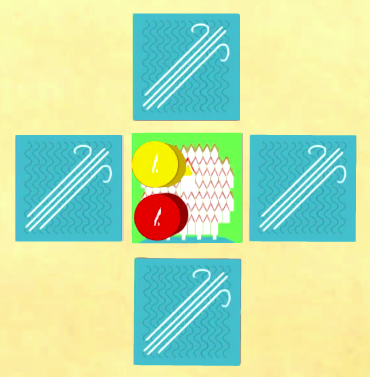</td>
<td>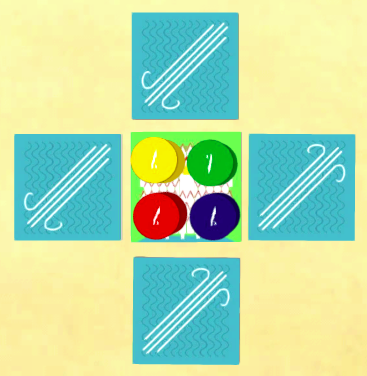</td>
</tr></table>

In [18]:
def setup_simulation1(players, game_mode, movement_rules, exploration_rules, mythical_city):
    '''Part of game setup for Cartolan, this places the intital tiles ready for play
    
    Arguments:
    List of Cartolan.Player for the Players involved in the game
    Cartolan.Game for the game that these tiles are being laid for
    String giving the movement rules variant that will apply for this game
    String giving the exploration rules variant that will apply for this game
    '''
    
    game = game_mode(players, movement_rules, exploration_rules)
#     exec("CityTile" +game_mode+ "(game, True, True).place_tile(0,0)")
    game.CITY_TYPE(game, True, True).place_tile(0,0)
#     capital_tile = CityTileBeginner(game, True, True)
#     capital_tile.place_tile(0,0)
    
    #place surrounding water tiles
    if len(players) == 2:
        WaterTile(game, WindDirection(True,True), TileEdges(True,True,True,True), False).place_tile(0, 1) #north
        WaterTile(game, WindDirection(True,True), TileEdges(True,True,True,True), False).place_tile(1, 0) #east
        WaterTile(game, WindDirection(True,True), TileEdges(True,True,True,True), False).place_tile(0, -1) #south
        WaterTile(game, WindDirection(True,True), TileEdges(True,True,True,True), False).place_tile(-1, 0) #west
    elif mythical_city and len(players) == 3:
        WaterTile(game, WindDirection(True,True), TileEdges(True,True,True,True), False).place_tile(0, 1) #north
        WaterTile(game, WindDirection(True,True), TileEdges(True,True,True,True), False).place_tile(1, 0) #east
        WaterTile(game, WindDirection(True,True), TileEdges(True,True,True,True), False).place_tile(0, -1) #south
        WaterTile(game, WindDirection(True,True), TileEdges(True,True,True,True), False).place_tile(-1, 0) #west
    elif len(players) == 4 or (not mythical_city and len(players) == 3):
        WaterTile(game, WindDirection(False,False), TileEdges(True,True,True,True), False).place_tile(0, 1) #north
        WaterTile(game, WindDirection(True,True), TileEdges(True,True,True,True), False).place_tile(1, 0) #east
        WaterTile(game, WindDirection(True,True), TileEdges(True,True,True,True), False).place_tile(0, -1) #south
        WaterTile(game, WindDirection(False,False), TileEdges(True,True,True,True), False).place_tile(-1, 0) #west
         
    print("Placed the Capital tile, and surrounding water tiles")
    return game

### 2. Each player places an Adventurer token on the Capital tile
Each player places an Adventurer token on the Capital tile, or if they want a faster,  more unpredictable, game all can also place a second.

In [19]:
def setup_simulation2(players, game_mode, movement_rules, exploration_rules, mythical_city):
    '''Part of game setup for Cartolan, this places the intital Adventurer tokens for each player
    
    Arguments:
    List of Cartolan.Player for the Players involved in the game
    Cartolan.Game for the game that these tiles are being laid for
    String giving the movement rules variant that will apply for this game
    String giving the exploration rules variant that will apply for this game
    '''
    game = setup_simulation1(players, game_mode, movement_rules, exploration_rules, mythical_city)
    
    for player in players:
#         exec("Adventurer" +game_mode+ "(game, player, game.cities[0])") #this should probably work, because it doesn't need to create a local
        print("adding an adventurer for " +str(player.colour)+ " player, who already has " +str(len(player.adventurers))+ " adventurers")
#         AdventurerBeginner(game, player, game.cities[0])
        game.ADVENTURER_TYPE(game, player, game.cities[0])
    
    print("Placed starting adventurer for each player")
    
    return game

### 3. Remaining Adventurers and Agents are placed with Player mat
Their remaining Adventurer tokens should be placed on each player's mat, in their correspondingly numbered Chests. 5 Agent tokens should be placed in the Vault.

### 4. A pile of Water Tiles is drawn
A shared pile of water tiles is randomly drawn, with 30 tiles for each player.

In [20]:
#import gspread
#from oauth2client.service_account import ServiceAccountCredentials

## use creds to create a client to interact with the Google Drive API
#scope = ['https://spreadsheets.google.com/feeds']
##scope = ['https://www.googleapis.com/auth/spreadsheets']
#creds = ServiceAccountCredentials.from_json_keyfile_name('client_secret.json', scope)
#client = gspread.authorize(creds)

## Find a workbook by name and open the first sheet
## Make sure you use the right name here.
#sheet = client.open("test").sheet1
#tile_distribution = sheet.col_values(1)

def setup_simulation4(players, game_mode, movement_rules, exploration_rules, mythical_city):
    '''Part of game setup for Cartolan, this creates a tile of suffled water-backed tiles ready for play
    
    Arguments:
    List of Cartolan.Player for the Players involved in the game
    Cartolan.Game for the game that these tiles are being laid for
    String giving the movement rules variant that will apply for this game
    String giving the exploration rules variant that will apply for this game
    '''
    game = setup_simulation2(players, game_mode, movement_rules, exploration_rules, mythical_city)
    
    import random
    
    #read in the numbers of water tiles, from google sheets?
    import csv

    tile_distribution = []
    wonder_distribution = []
    disaster_distribution = []

    with open("tile_distribution.csv") as csvfile:
        readCSV = csv.reader(csvfile)
        for row in readCSV:
            tile_distribution.append(int(row[0]))
            wonder_distribution.append(int(row[1]))
            if game_mode in [GameRegular, GameAdvanced]:
                disaster_distribution.append(row[2])
            else:
                disaster_distribution.append(0)
    
    #construct the water tile deck
    row_count = 0
    tiles = []
    for uc_water in [True, False]:
        for ua_water in [True, False]:
            for dc_water in [True, False]:
                for da_water in [True, False]:
                    if uc_water or ua_water:
                        for tile_num in range(0, int(tile_distribution[row_count])
                                              -int(wonder_distribution[row_count])
                                              -int(disaster_distribution[row_count])):
                            wind_direction = WindDirection(north = True, east = True)
                            tile_edges = TileEdges(uc_water, ua_water, dc_water, da_water)
                            tiles.append(WaterTile(game, wind_direction, tile_edges, False))
                        for tile_num in range(0, int(wonder_distribution[row_count])):
                            wind_direction = WindDirection(north = True, east = True)
                            tile_edges = TileEdges(uc_water, ua_water, dc_water, da_water)
                            tiles.append(WaterTile(game, wind_direction, tile_edges, True))
                        for tile_num in range(0, int(disaster_distribution[row_count])):
                            wind_direction = WindDirection(north = True, east = True)
                            tile_edges = TileEdges(uc_water, ua_water, dc_water, da_water)
                            tiles.append(DisasterTile(game, "water", wind_direction))
                        row_count += 1
    
    #draw a suitable number of tiles from the deck for a pile
    num_tiles = len(players)*game.WATER_TILES_PER_PLAYER
    tile_pile = game.tile_piles["water"]
    for tile in random.sample(tiles, num_tiles):
        tile_pile.add_tile(tile)
    
    tile_pile.shuffle_tiles()
    
    print("Built a Water tile pile with " +str(len(game.tile_piles["water"].tiles))+ " tiles, and shuffled it")
    
    return game

# #test water tile instantiation
# row_count = 0
# game = GameBeginner(2, "initial", "clockwise")
# game.tile_piles["water"] = TilePile("water",[])
# tile_pile = game.tile_piles["water"]
# for uc_water in [True, False]:
#     for ua_water in [True, False]:
#         for dc_water in [True, False]:
#             for da_water in [True, False]:
#                 if uc_water or ua_water:
#                     for tile_num in range(0, int(tile_distribution[row_count])):
#                         tile_position = TilePosition(latitude = None, longitude = None)
#                         wind_direction = WindDirection(north = True, east = True)
#                         tile_edges = TileEdges(uc_water, ua_water, dc_water, da_water)
#                         tile_pile.add_tile(WaterTile(game, tile_position, wind_direction, tile_edges))
#                     print(str(uc_water) +" "+ str(ua_water) +" "+ str(dc_water) +" "+ str(da_water) +" "+ str(tile_distribution[row_count]))
#                     row_count += 1
# print(len(game.tile_piles["water"].tiles))

### 5. A pile of Land Tiles is drawn
For Regular or Advanced mode, a shared pile of land tiles is randomly drawn, with 15 tiles for each player.

In [21]:
def setup_simulation5(players, game_mode, movement_rules, exploration_rules, mythical_city):
    '''Part of game setup for Cartolan, this creates a tile of suffled land-backed tiles ready for play
    
    Arguments:
    List of Cartolan.Player for the Players involved in the game
    Cartolan.Game for the game that these tiles are being laid for
    String giving the movement rules variant that will apply for this game
    String giving the exploration rules variant that will apply for this game
    '''
    game = setup_simulation4(players, game_mode, movement_rules, exploration_rules, mythical_city)
    
    import random
    
    if not game_mode in [GameRegular, GameAdvanced]:
        return game
    
    #read in the numbers of water and land tiles, from google sheets?
    import csv

    tile_distribution = []
    wonder_distribution = []
    disaster_distribution = []

    with open("tile_distribution.csv") as csvfile:
        readCSV = csv.reader(csvfile)
        for row in readCSV:
            tile_distribution.append(row[0])
            wonder_distribution.append(row[1])
            disaster_distribution.append(row[2])

    #land tiles
    row_count = 12
    tiles = []
    for uc_water in [True, False]:
        for ua_water in [True, False]:
            for dc_water in [True, False]:
                for da_water in [True, False]:
                    if not uc_water or not ua_water:
                        for tile_num in range(0, int(tile_distribution[row_count])
                                              -int(wonder_distribution[row_count])
                                              -int(disaster_distribution[row_count])):
                            wind_direction = WindDirection(north = True, east = True)
                            tile_edges = TileEdges(uc_water, ua_water, dc_water, da_water)
                            tiles.append(LandTile(game, wind_direction, tile_edges, False))
                        for tile_num in range(0, int(wonder_distribution[row_count])):
                            wind_direction = WindDirection(north = True, east = True)
                            tile_edges = TileEdges(uc_water, ua_water, dc_water, da_water)
                            tiles.append(LandTile(game, wind_direction, tile_edges, True))
                        for tile_num in range(0, int(disaster_distribution[row_count])):
                            wind_direction = WindDirection(north = True, east = True)
                            tile_edges = TileEdges(uc_water, ua_water, dc_water, da_water)
                            tiles.append(DisasterTile(game, "land", wind_direction))
                        row_count += 1
    
    num_tiles = len(players)*game.LAND_TILES_PER_PLAYER
    tile_pile = game.tile_piles["land"]
    for tile in random.sample(tiles, num_tiles):
        tile_pile.add_tile(tile)
    
    tile_pile.shuffle_tiles()    
    print("Built a Land tile pile with " +str(len(game.tile_piles["land"].tiles))+ " tiles, and shuffled it")
    
    return game
                        
# #test land tile instantiation
# row_count = 12
# game = GameBeginner(2, "initial", "clockwise")
# game.tile_piles["land"] = TilePile("land",[])
# tile_pile = game.tile_piles["land"]
# for uc_water in [True, False]:
#     for ua_water in [True, False]:
#         for dc_water in [True, False]:
#             for da_water in [True, False]:
#                 if not uc_water or not ua_water:
#                     for tile_num in range(0, int(tile_distribution[row_count])):
#                         tile_position = TilePosition(latitude = None, longitude = None)
#                         wind_direction = WindDirection(north = True, east = True)
#                         tile_edges = TileEdges(uc_water, ua_water, dc_water, da_water)
#                         tile_pile.add_tile(LandTile(game, tile_position, wind_direction, tile_edges))
#                     print(str(uc_water) +" "+ str(ua_water) +" "+ str(dc_water) +" "+ str(da_water) +" "+ str(tile_distribution[row_count]))
#                     row_count += 1
# print(len(game.tile_piles["land"].tiles))

In [22]:
# import random

# import csv

# tile_distribution = []
# wonder_distribution = []

# with open("tile_distribution.csv") as csvfile:
#     readCSV = csv.reader(csvfile)
#     for row in readCSV:
#         tile_distribution.append(row[0])
#         wonder_distribution.append(row[1])

# #land tiles
# row_count = 12
# tiles = []
# for uc_water in [True, False]:
#     for ua_water in [True, False]:
#         for dc_water in [True, False]:
#             for da_water in [True, False]:
#                 if not uc_water or not ua_water:
#                     for tile_num in range(0, int(tile_distribution[row_count])-int(wonder_distribution[row_count])):
#                         wind_direction = WindDirection(north = True, east = True)
#                         tile_edges = TileEdges(uc_water, ua_water, dc_water, da_water)
#                         tiles.append(LandTile(None, wind_direction, tile_edges, False))
#                     for tile_num in range(0, int(wonder_distribution[row_count])):
#                         wind_direction = WindDirection(north = True, east = True)
#                         tile_edges = TileEdges(uc_water, ua_water, dc_water, da_water)
#                         tiles.append(LandTile(None, wind_direction, tile_edges, True))
#                     row_count += 1

# num_tiles = 45
# tile_pile = TilePile("land")
# for tile in random.sample(tiles, num_tiles):
#     tile_pile.add_tile(tile)
#     print(str(tile.wind_direction.north)+","+str(tile.wind_direction.east))

# tile_pile.shuffle_tiles()   

In [23]:
# sys.stdout = stdout_backup
# print(len(tiles))
# for tile in tiles:
#     print(str(tile.wind_direction.north)+","+str(tile.wind_direction.east))

<table><tr>
<td><h3> 6. the Mythical City is placed</h3>
For 3 or 4 players, place the Mythical City tile 10 tiles east of the Capital City surrounded by four plain water tiles with the prevailing wind mirroring the Capital tile, for example pointing towards the South-West in the recommended 3 player setup.</td>
<td>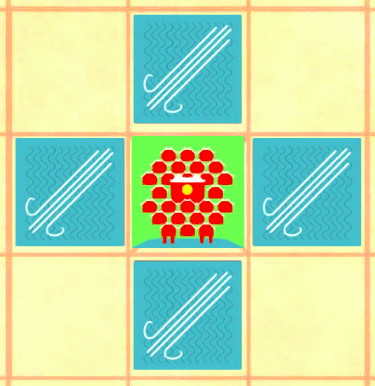</td>
<td>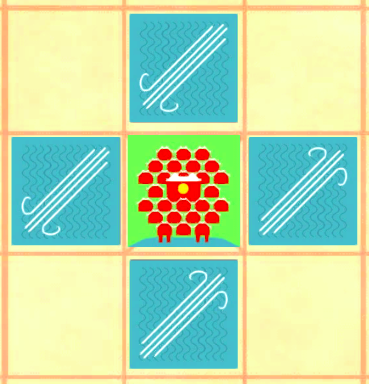</td>
</tr></table>

In [24]:
def setup_simulation6(players, game_mode, movement_rules, exploration_rules, mythical_city = True):
    '''Part of game setup for Cartolan, this places the Mythical City and surrounding tiles ready for play
    
    Arguments:
    List of Cartolan.Player for the Players involved in the game
    Cartolan.Game for the game that these tiles are being laid for
    String giving the movement rules variant that will apply for this game
    String giving the exploration rules variant that will apply for this game
    '''
    game = setup_simulation5(players, game_mode, movement_rules, exploration_rules, mythical_city)

    if not game_mode in [GameRegular, GameAdvanced] or len(players) < 3:
        return game
    
#     exec("mythical_tile = CityTile" +game_mode+ "(game, False, False)")
#     mythical_tile.place_tile(10,0)
#     exec("CityTile" +game_mode+ "(game, False, False).place_tile(10,0)")
    game.CITY_TYPE(game, False, False).place_tile(game.MYTHICAL_LATITUDE, game.MYTHICAL_LONGITUDE)
    
    #place surrounding water tiles
    if mythical_city and len(players) == 3:
        WaterTile(game, WindDirection(False,False), TileEdges(True,True,True,True), False).place_tile(game.MYTHICAL_LATITUDE
                                                                                                      , game.MYTHICAL_LONGITUDE+1) #north
        WaterTile(game, WindDirection(False,False), TileEdges(True,True,True,True), False).place_tile(game.MYTHICAL_LATITUDE+1
                                                                                                      , game.MYTHICAL_LONGITUDE) #east
        WaterTile(game, WindDirection(False,False), TileEdges(True,True,True,True), False).place_tile(game.MYTHICAL_LATITUDE
                                                                                                      , game.MYTHICAL_LONGITUDE-1) #south
        WaterTile(game, WindDirection(False,False), TileEdges(True,True,True,True), False).place_tile(game.MYTHICAL_LATITUDE-1
                                                                                                      , game.MYTHICAL_LONGITUDE) #west
    elif len(players) == 4 or (not mythical_city and len(players) == 3):
        WaterTile(game, WindDirection(False,False), TileEdges(True,True,True,True), False).place_tile(game.MYTHICAL_LATITUDE
                                                                                                      , game.MYTHICAL_LONGITUDE+1) #north
        WaterTile(game, WindDirection(True,True), TileEdges(True,True,True,True), False).place_tile(game.MYTHICAL_LATITUDE+1
                                                                                                      , game.MYTHICAL_LONGITUDE) #east
        WaterTile(game, WindDirection(True,True), TileEdges(True,True,True,True), False).place_tile(game.MYTHICAL_LATITUDE
                                                                                                      , game.MYTHICAL_LONGITUDE-1) #south
        WaterTile(game, WindDirection(False,False), TileEdges(True,True,True,True), False).place_tile(game.MYTHICAL_LATITUDE-1
                                                                                                      , game.MYTHICAL_LONGITUDE) #west
    
    print("Placed the Mythical City tile and surrounding water tiles")
    return game

### 7. Select the starting player
Starting with the youngest, players each roll the Gusting Wind die until someone gets a gust against the prevailing wind roll, which selects them as the starting player.

In [25]:
def setup_simulation(players, game_mode, movement_rules, exploration_rules, mythical_city = True):
    '''The final part of game setup for Cartolan, this chooses a random play order for the players involved
    
    Arguments:
    List of Cartolan.Player for the Players involved in the game
    Cartolan.Game for the game that these tiles are being laid for
    String giving the movement rules variant that will apply for this game
    String giving the exploration rules variant that will apply for this game
    '''
    game = setup_simulation6(players, game_mode, movement_rules, exploration_rules, mythical_city)
    
    import random
    
    #turn order has been handled by the parent setup
#     game.players = random.shuffle(game.players)
    print("Randomly chose " +str(players[0].colour)+ " player to start")
    return game

# 4. Detailed instructions for play

## Game rules
Starting with the youngest, players take it in turn to roll the Gusting Wind Die, until one rolls a gust against the prevailing wind. They become the first player, and play proceeds clockwise from them until either one player has 25 more wealth in their Vault than any other, or one colour of tile (water/land) has been exhausted from both the main and discard piles.

The current player chooses an Adventurer that hasn't moved yet, and play then proceeds according to the sequence:

### Movement
A direction is chosen for the moving Adventurer, and if they are able to move over that edge of their current tile according to the movement rules outlined above then they do so. 

### Exploration
If the moving Adventurer moves over an edge into a space that has no tile, then a tile is drawn from the top of the tile  pile with an edge corresponding to the edge that was moved over - that is, either a water-backed tile for a water edge or a land-backed tile for a land edge. 

The tile is initially tried with its wind direction matching the tile that was moved from. If its edges don't match the adjacent tiles, so that water adjoins water and land adjoins land, then it is rotated and tried again according to the rules above. If after all the rotations in the rules are tried it doesn't fit with the adjacent tiles, then the tile goes in the discard pile. Another tile is drawn and tried, until 5 have been tried and then the move ends and the Player returns to the movement phase for this Adventurer. 

If the suitable tile pile is empty then the discard pile is shuffled and used to replace it. If the discard pile is also empty then the game is over and **the player with the most wealth in their vault wins**.

### Actions - Discovery, Trading, Buying, and Piracy
If the Adventurer has moved onto a newly placed Wonder tile (with a pearl or a diamond marked on it), more than four tiles from any city, then they have discovered this wonder and get a wealth bonus. If the Wonder tile had previously been placed, or is within the domain of a city, then they can trade in the Wonder for a reduced amount of wealth.

If a newly placed tile is outside any city's domain, more than four tiles away from it, then the Player can pay to place an Agent, which will collect a bonus when trade happens on this tile, and will refresh the move counts of Adventurers that visit (and pay a fee if they belong to another player). An Agent can also be hired by a player when their Adventurer is at a city, and placed on any tile with no active Agent for a slightly higher cost. More Adventurers can also be hired instead, and they are then able to move that same turn.

When an Adventurer lands on the same tile as another Adventurer or an Agent, they can choose to attack it. Unless they are attacking a pirate they become a pirate themselves. Successfully attacking an (non-pirate) Adventurer takes half their wealth, successfully attacking an Agent takes all their wealth plus one, and successfully attacking a pirate arrests them and sends them to their last city visited with no wealth while awarding the attacker a wealth bonus. 

### Resolving conflict
Conflict is resolved by the defending player and then the attacking player rolling the die. If the rolls don't match then the attacker is successful. The attacker gets an extra attempt at attacking each move for every Adventurer more they might have on a tile, while for every Adventurer more the defender might have the attacker must win another conflict to be successful. 

### Repeating or ending the turn
If the moving Adventurer has any more valid moves from their tile at the end of the move, then they must continue to move or end their turn. When all of a player's Adventurers have had their turn then the player's turn is over and play proceeds clockwise to the next player.

If at any point one player's wealth in their Vault is ahead of all other players by the winning margin, then **they have one the game**.

In [26]:
class GameBeginner(Game):
    '''Executes the sequence of play for the Beginner mode of the board game Cartolan - Trade Winds
    
    Beginner mode involves only water tiles being placed as Adventurer tokens are moved around the play area 
    collecting wealth from discovering and trading at wonder tiles. 
    
    Agent tokens can be placed as tiles are visited to confer wealth and movement bonuses to Adventurers.
    
    Methods:
    __init__ takes a List of Cartolan.Players and two Strings
    start_game
    refresh_pile takes two Cartolan.TilePile objects
    play_round
    check_win_conditions
    '''
    GAME_WINNING_DIFFERENCE = 25
    
    MAX_ADVENTURERS = 3
    MAX_AGENTS = 5
    
    WATER_TILES_PER_PLAYER = 30
    
    VALUE_DISCOVER_WONDER = {"water":5}
    VALUE_TRADE = 2
    VALUE_AGENT_TRADE = 1
    VALUE_FILL_MAP_GAP = 5
    
    COST_ADVENTURER = 10
    COST_AGENT_EXPLORING = 3
    COST_AGENT_FROM_CITY = 5
    COST_AGENT_REST = 1
    
    EXPLORATION_ATTEMPTS = 5
    MAX_DOWNWIND_MOVES = 4
    MAX_LAND_MOVES = 2
    MAX_UPWIND_MOVES = 1    
    
    CITY_DOMAIN_RADIUS = MAX_DOWNWIND_MOVES
    MYTHICAL_LATITUDE = 10
    MYTHICAL_LONGITUDE = 0
    
    ADVENTURER_TYPE = AdventurerBeginner
    AGENT_TYPE = AgentBeginner
    CITY_TYPE = CityTileBeginner
    
    def __init__(self, players, movement_rules = 'initial', exploration_rules = 'clockwise'):
        
        super().__init__(players)
        
        if movement_rules in ["initial", "budgetted"]:
            self.movement_rules = movement_rules
        else: raise Exception("Invalid movement rules specified")
        
        if exploration_rules in ["clockwise", "continuous"]:
            self.exploration_rules = exploration_rules
        else: raise Exception("Invalid exploration rules specfied")
        
        self.cities = []

        self.tile_piles = {"water":TilePile("water",[])}
        self.discard_piles = {"water":TilePile("water",[])}
        
        self.win_type = None
        self.game_over = False
        
    
    def start_game(self):
        '''Begins the sequence of play, under the assumption that the play area has been set up'''
        self.game_over = False
        while not self.game_over:
            self.turn += 1
            self.game_over = self.play_round()
        
        #report game conclusion to caller
        return True
    
    
    def refresh_pile(self, tile_pile, discard_pile):
        '''Swaps the discard pile of tiles for the active pile, shuffling it
        
        Arguments:
        Cartolan.TilePile the pile to replace
        Cartolan.TilePile the discard pile to put into play
        '''
        #check whether the discard pile is empty too
        if discard_pile.tiles:
            self.tile_piles.pop(tile_pile.tile_back)
            self.tile_piles[tile_pile.tile_back] = discard_pile
            tile_pile = self.tile_piles[tile_pile.tile_back]
            discard_pile.shuffle_tiles()
            print("Have replaced the main tile pile with the discard pile, and shuffled it,"
                  +" so that now there are " +str(len(self.tile_piles))+ " tile piles.")
            #Start a new discard pile
            self.discard_piles.pop(discard_pile.tile_back)
            self.discard_piles[discard_pile.tile_back] = TilePile(discard_pile.tile_back, [])
#             self.discard_piles["water"] = TilePile("water",[])
            discard_pile = self.discard_piles[discard_pile.tile_back]
            print("Have started a new discard pile, so that now there are "
                 + str(len(self.discard_piles))+ " discard piles.")
            return True
        else:
            self.check_win_conditions() #try and exit here if so
            return False
    
    def play_round(self):
        '''Carries out the sequence of play for one round of the game'''
        print("playing round "+str(self.turn)+" with a wealth difference of " +str(self.wealth_difference) 
             +" and a max wealth of " +str(self.max_wealth))
        for player in self.players:
            #some logging
            print(str(player.colour)+ " player's turn, with " +str(len(player.adventurers)) 
                  +" Adventurers, and " +str(player.vault_wealth)+ " wealth in the Vault")
#             if not player.adventurers[0] is None:
#                 adventurer = player.adventurers[0]
#                 adventurer_tile = adventurer.current_tile
#                 print("And their first Adventurer has " +str(adventurer.wealth)+ " wealth, and is on the " +adventurer_tile.tile_back+  " tile at position " +str(adventurer_tile.tile_position.latitude)+ "," +str(adventurer_tile.tile_position.longitude))
            
            # a more sophisticated simulation might need to let players choose their Adventurers' turn order first
            
            # let players move an adventurer so long as it still has valid moves
            for adventurer in player.adventurers:
                if adventurer.turns_moved < self.turn:
                    player.continue_turn(adventurer)
                    print() #to help log readability
                    
                    #check whether this adventurer's turn has won them the game
                    if self.check_win_conditions():
                        return True
        
        #log the numbers of tiles remaining in the game
        for tile_back in self.tile_piles.keys():
            tile_pile = self.tile_piles[tile_back]
            discard_pile = self.discard_piles[tile_back]
            print(str(len(tile_pile.tiles))+" "+tile_back+" tiles left in the main pile and " +str(len(discard_pile.tiles))+" left in the discard pile")
            print() #to help log readability
            
    
    def check_win_conditions(self):
        '''Checks whether the win conditions have been satisfied so that the game should end'''
        #the end conditions for a game are one player having a certain margin more wealth in their Vault, or one of the tile piles being emptied
        self.max_wealth = 0
        self.total_vault_wealth = 0
        self.total_chest_wealth = 0
        self.wealth_difference = 0
        for player in self.players:
            self.total_vault_wealth += player.vault_wealth
            for adventurer in player.adventurers:
                self.total_chest_wealth += adventurer.wealth
            # is this player wealthier than the wealthiest player checked so far?
            if player.vault_wealth > self.max_wealth:
                self.wealth_difference = player.vault_wealth - self.max_wealth
                self.max_wealth = player.vault_wealth
                self.winning_player = player
            # if this player is behind in wealth, are they still closer than anyone else?
            elif self.max_wealth - player.vault_wealth < self.wealth_difference:
                    self.wealth_difference = self.max_wealth - player.vault_wealth
        
        if self.wealth_difference > self.GAME_WINNING_DIFFERENCE:
            print("won by wealth difference")
            self.win_type = "wealth difference"
            self.game_over = True
            return True

        for tile_pile in self.tile_piles.values():
            if not tile_pile.tiles and not self.discard_piles[tile_pile.tile_back].tiles:
                print("won by running out of tiles")
                if self.winning_player:
                    self.win_type = "exhausted " +tile_pile.tile_back+ " tiles"
                else:
                    self.win_type = "tiles exhausted but no player banked wealth"
                    max_chest_wealth = 0
                    for player in self.players:
                        for adventurer in player.adventurers:
                            if adventurer.wealth > max_chest_wealth:
                                self.winning_player = player
                                max_chest_wealth = adventurer.wealth
                self.game_over = True
                return True
        
        return False

In [27]:
class GameRegular(GameBeginner):
    '''Extends the GameBeginner class to include extra features of the Regular mode of Cartolan - Trade Winds
    
    In Regular mode agents can be dispossessed and restored through Adventurers committing piracy, with rewards and costs.
    
    Methods:
    __init__ takes a List of Cartolan.Player objects and two Strings
    check_win_conditions
    '''
    VALUE_DISCOVER_WONDER = {"water":5, "land":10}
    VALUE_ARREST = 5
    VALUE_DISPOSSESS_AGENT = 1
    COST_AGENT_RESTORE = 1
    
    LAND_TILES_PER_PLAYER = 15
    
    ADVENTURER_TYPE = AdventurerRegular
    AGENT_TYPE = AgentRegular
    CITY_TYPE = CityTileBeginner #more changes will only come in advanced
        
    def __init__(self, players, movement_rules = 'initial', exploration_rules = 'clockwise'):
        super().__init__(players, movement_rules = 'initial', exploration_rules = 'clockwise')
        # a land tile pile is now needed
        self.tile_piles["land"] = TilePile("land",[])
        self.discard_piles["land"] = TilePile("land",[])      
        
        # a Gusting Wind die is now needed
        self.gusting_wind_die = GustingWindDie(self)
        
        # keep track of some information centrally for players' decisions
        self.dropped_wealth = 0
        self.disaster_tiles = []
    
    def check_win_conditions(self):
        self.dropped_wealth = 0
        for tile in self.disaster_tiles:
            self.dropped_wealth += tile.dropped_wealth
        
        return super().check_win_conditions()

In [28]:
class GameAdvanced(GameRegular):
    '''Extends the GameRegular class to include extra features of the Adventurer mode of Cartolan - Trade Winds
    
    In Advanced mode special equipment cards can be equipped by Adventurers, to confer advantages, while each adventurer will have a character card giving them starting equipment.
    
    Methods:
    __init__ takes a List of Cartolan.Player objects and two Strings
    '''
    COST_BUY_EQUIPMENT = 10
    
    def __init__(self, players, movement_rules = 'initial', exploration_rules = 'clockwise'):
        super().__init__(players, movement_rules = 'initial', exploration_rules = 'clockwise')


## Visualising play

The play area is visualised in Python's pyplot, using images of the tiles from the actual artwork.

In [29]:
class PlayAreaVisualisation:
    '''A collection of methods for visualising the play area from a particular game of Cartolan
    
    Methods:
    __init__ takes an array of two Ints and an array of two Ints
    get_screen_width
    play_area_difference takes two nested Dicts of Cartolan.Tiles indexed by longitude and latitude Ints {0:{0:Tile}}
    draw_play_area takes two nested Dicts of Cartolan.Tiles indexed by longitude and latitude Ints {0:{0:Tile}}
    draw_routes takes a List of Cartolan.Players
    draw_tokens takes a List of Cartolan.Players
    draw_move_options takes two lists of two Ints
    clear_move_options
    give_prompt takes a String
    clear_prompt
    '''
    #a vector of visual offsets for the players' tokens
    PLAYER_OFFSETS = [[0.5, 0.5],  [0.25, 0.25],  [0.25, 0.75],  [0.75, 0.75]]
    AGENT_OFFSET = [0.75, 0.25] #the placement of agents on the tile
    ADVENTURER_OFFSET = [0.05, 0.05] #the offset to differentiate multiple adventurers on the same tile
    
    # a dict in which to keep the images for tiles
    tile_image_library = {}
    
    def __init__(self, dimensions = [33, 21], origin = [15, 15], title = None):
        import matplotlib.image as mpimg # for importing tile images
        from matplotlib import pyplot
        import os
        
        os.chdir('/home/tom/cartolan_sim')
        
        self.visual_area_width = self.get_screen_width()/120.0 #iPython defaults the width of visuals to 80dpi, or is it 120dpi? 
            
        self.dimensions = dimensions
        self.origin = origin
        self.play_area = {}
        
        # create the grid of subplots that will hold the tiles 
#         if "Median wealth difference game visualised" in pyplot.get_fignums():
# #             self.fig(figsize=(self.visual_area_width, float(dimensions[0])/float(dimensions[1]) * self.visual_area_width))
#             self.fig = pyplot.figure("Median wealth difference game visualised")
#             self.axarr.clear()
#             self.axarr = self.fig.subplots(self.dimensions[1]+1,self.dimensions[0]+1
#                                                , num="Median wealth difference game visualised"
#                                            , figsize=(self.visual_area_width*float(dimensions[0])/float(dimensions[1]), self.visual_area_width)
#                                           , clear=True)
#             self.tokenax.clear()
#             self.moveax.clear()
#         else:
        if title:
            self.fig, self.axarr = pyplot.subplots(self.dimensions[1]+1,self.dimensions[0]+1
                                           , num=title
                                        , figsize=(self.visual_area_width, self.visual_area_width*float(dimensions[1])/float(dimensions[0]))
                                        , clear=True)
            self.fig.set_size_inches(self.visual_area_width, self.visual_area_width*float(dimensions[1])/float(dimensions[0]), forward=False)
        else:
            self.fig, self.axarr = pyplot.subplots(self.dimensions[1]+1,self.dimensions[0]+1
                                           , num="Live game visualised"
                                        , figsize=(self.visual_area_width, self.visual_area_width*float(dimensions[1])/float(dimensions[0]))
                                        , clear=True)
            self.fig.set_size_inches(self.visual_area_width, self.visual_area_width*float(dimensions[1])/float(dimensions[0]), forward=False)
        # set up a standard text prompt
        self.text = self.fig.text(0,0, "", va="bottom", ha="left")
        # create a set of overarching axes, for drawing players
        self.tokenax = self.fig.add_subplot(111)
        self.token_width = self.get_screen_width()/float(dimensions[0])
        # create a set of overarching axes, for highlighting movement options
        self.moveax = self.fig.add_subplot(111)
        
        
        # import tile images and establish a mapping
        if len(self.tile_image_library) == 0:
            self.tile_image_library = {}
            self.tile_image_library["water"] = mpimg.imread('./images/water.png')
            self.tile_image_library["land"] = mpimg.imread('./images/land.png')
            self.tile_image_library["water_disaster"] = mpimg.imread('./images/water_disaster.png') 
            self.tile_image_library["land_disaster"] = mpimg.imread('./images/land_disaster.png') 
            self.tile_image_library["capital"] = mpimg.imread('./images/capital.png') 
            self.tile_image_library["mythical"] = mpimg.imread('./images/mythical.png') 
            for uc_water in [True, False]: 
                for ua_water in [True, False]:
                    for dc_water in [True, False]:
                        for da_water in [True, False]:
                            for wonder in [True, False]:
                                filename = ""
                                if uc_water:
                                    filename += "t"
                                else:
                                    filename += "f"
                                if ua_water:
                                    filename += "t"
                                else:
                                    filename += "f"
                                if dc_water:
                                    filename += "t"
                                else:
                                    filename += "f"
                                if da_water:
                                    filename += "t"
                                else:
                                    filename += "f"
                                if wonder:
                                    filename += "t"
                                else:
                                    filename += "f"

                                self.tile_image_library[str(uc_water)+str(ua_water)+str(dc_water)+str(da_water)
                                                        +str(wonder)] = mpimg.imread('./images/' +filename+ '.png')
    
    def get_screen_width(self):
        '''Checks what the horizontal screen resolution is, to scale visuals accordingly'''
#         import Tkinter
#         root = Tkinter.Tk()
#         return root.winfo_screenwidth()
        return 1366

    
    def play_area_difference(self, play_area_super, play_area_sub):
        '''Compares two given nested Dicts of Cartolan.Tiles to see which Tiles are present in only one
        
        Arguments:
        Dict of Dict of Cartolan.Tiles, both indexed with Ints, giving the Tiles at different coordinates for the play area of interest
        Dict of Dict of Cartolan.Tiles, both indexed with Ints, giving the Tiles at different coordinates for the play area with tiles to disregard
        '''
        difference = { latitude : play_area_super[latitude] for latitude in set(play_area_super) - set(play_area_sub) }
        for latitude in play_area_sub:
            latitude_difference = { longitude : play_area_super[latitude].get(longitude) 
                                                for longitude in set(play_area_super[latitude]) 
                                                - set(play_area_sub[latitude]) }
            if latitude_difference:
                difference[latitude].update(latitude_difference)
        return difference
    
    # convert the play_area to a grid of tiles
    def draw_play_area(self, play_area_complete, play_area_to_draw):
        '''Renders the tiles that have been laid in a particular game of Cartolan - Trade Winds
        
        Arguments:
        Dict of Dict of Cartolan.Tiles, both indexed with Ints, giving the Tiles at different coordinates for the current state of play
        Dict of Dict of Cartolan.Tiles, both indexed with Ints, giving the Tiles at different coordinates that have been added since last drawing and need to be rendered
        '''
        from matplotlib import pyplot # for plotting the tiles in a grid
        from scipy import ndimage # for rotating tiles
        import numpy
        
#         self.fig.sca(self.axarr)
        
#         #Check that the given play areas are compatible with one another
#         if self.play_area_difference(play_area_to_draw, play_area_complete):
#             raise Exception("Play area to draw is not a subset of given complete play area")
#         #Check that the given play areas are compatible with what's already been drawn
#         if self.play_area_difference(self.play_area, play_area_complete):
#             raise Exception("Complete play area provided does not contain all of the existing visualisation") 
        
        for latitude in play_area_to_draw:
            if self.origin[0] + latitude in range(0, self.dimensions[0]+1):
                for longitude in play_area_to_draw[latitude]:
                    if self.origin[1] + longitude in range(0, self.dimensions[1]+1):
                        #bring in the relevant image from the library
                        tile = play_area_to_draw[latitude][longitude]
                        e = tile.tile_edges
                        if isinstance(tile, CityTile):
                            if tile.is_capital:
                                tile_image = self.tile_image_library["capital"]
                            else:
                                tile_image = self.tile_image_library["mythical"]
                        elif isinstance(tile, DisasterTile):
                            if tile.tile_back == "water":
                                tile_image = self.tile_image_library["water_disaster"]
                            else:
                                tile_image = self.tile_image_library["land_disaster"]
                        else:
                            wonder = tile.is_wonder
                            tile_image = self.tile_image_library[str(e.upwind_clock_water)+str(e.upwind_anti_water)
                                                                 +str(e.downwind_clock_water)+str(e.downwind_anti_water)
                                                                 +str(wonder)]            

                        #rotate the image appropriately
                        if not tile.wind_direction.north and tile.wind_direction.east:
                            rotated_image = ndimage.rotate(tile_image, 270)
                        elif not tile.wind_direction.north and not tile.wind_direction.east:
                            rotated_image = ndimage.rotate(tile_image, 180)
                        elif tile.wind_direction.north and not tile.wind_direction.east:
                            rotated_image = ndimage.rotate(tile_image, 90)
                        else:
                            rotated_image = ndimage.rotate(tile_image, 0)

                        #place the tile image in the grid
                        horizontal = self.origin[0] + latitude
                        vertical = self.dimensions[1] - self.origin[1] - longitude
#                         print(str(vertical)+","+str(horizontal))
#                         title_loc = str(latitude)+","+str(longitude)
#                         self.axarr[vertical, horizontal].imshow(rotated_image, interpolation='nearest')
                        self.axarr[vertical, horizontal].imshow((rotated_image * 255).astype(numpy.uint8), interpolation='nearest')

        #remove axes
        for horizontal in range(0, self.dimensions[0]+1):
            for vertical in range(0, self.dimensions[1]+1):
                self.axarr[vertical, horizontal].axis('off')
        
        # Keep track of what the latest play_area to have been visualised was
        self.play_area = play_area_complete
#         self.pyplot.show()
        return True
        

    # it will be useful to see how players moved around the play area during the game, and relative to agents
    def draw_routes(self, players):
        '''Illustrates the paths that different Adventurers have taken during the course of a game, and the location of Agents
        
        Arguments:
        List of Carolan.Players the Adventurers and Agents that will be rendered
        '''
        #try to set up a new master axes spanning all the subplots
#         tokenax = self.fig.add_subplot(111)
#         tokenax = self.tokenax
        # create a set of overarching axes, for drawing players
#         self.tokenax = self.fig.add_subplot(111)
        self.tokenax.set_ylim([0,self.dimensions[1]+1])
        self.tokenax.set_xlim([0,self.dimensions[0]+1])
        self.tokenax.axis("off")
        #clear the existing visualisation of tokens / paths
        tokenax = self.tokenax
        tokenax.clear()
    
        for player in players:
            for adventurer in player.adventurers:
                previous_step = self.origin
                # we'll introduce a gradual offset during the course of the game, to help keep track of when a route was travelled
                previous_offset = 0.25
                move = 0
                for tile in adventurer.route:
                    # plot() to draw a line between two points. Call matplotlib. pyplot. plot(x, y) with x as a list of x-values and y as a list of their corresponding y-values of two points to plot a line segment between them.
                    # you'll need to get the centre-point for each tile_image
                    offset = 0.25 + float(move)/float(len(adventurer.route))*0.5
                    step = [self.origin[0] + tile.tile_position.latitude, self.origin[1] + tile.tile_position.longitude]
#                     self.fig.add_axes(rect=[1.0,1.0]).plot([previous_step[0]+0.5,step[0]+0.5],[previous_step[1]+0.5,step[1]+0.5]
#                                   , color=player.colour)
                    tokenax.plot([previous_step[0]+previous_offset,step[0]+offset],[previous_step[1]+previous_offset,step[1]+offset]
                                  , color=player.colour, linewidth=round(4.0*offset))
                    previous_step = step
                    previous_offset = offset
                    move += 1
            
            for agent in player.agents: 
                for tile in agent.route:
                    # we want to draw a square anywhere that an agent is
                    # do we also want a marker where agents have previously been?
                    if tile == agent.route[-1]:
                        face_colour = player.colour
                    else:
                        face_colour = "none"
                    location = [self.origin[0] + tile.tile_position.latitude
                                , self.origin[1] + tile.tile_position.longitude]
                    tokenax.scatter([location[0]+self.AGENT_OFFSET[0]],[location[1]+self.AGENT_OFFSET[1]]
                                  , linewidth=1, edgecolors=player.colour, facecolor=face_colour, marker="s", s=self.token_width)
                
            if isinstance(player, PlayerRegularExplorer):
                player_offset = self.PLAYER_OFFSETS[players.index(player)]
                for attack in player.attack_history: 
                    # we want to draw a cross anywhere that an attack happened, the attack_history is full of pairs with a tile and a bool for the attack's success
                    if attack[1]:
                        face_colour = player.colour
                    else:
                        face_colour = "none"
                    tile = attack[0]
                    location = [self.origin[0] + tile.tile_position.latitude + player_offset[0]
                                , self.origin[1] + tile.tile_position.longitude + player_offset[1]]
                    tokenax.scatter([location[0]],[location[1]]
                                  , linewidth=1, edgecolors=player.colour, facecolor=face_colour, marker="X", s=self.token_width)

        tokenax.set_ylim([0,self.dimensions[1]+1])
        tokenax.set_xlim([0,self.dimensions[0]+1])
        tokenax.axis("off")
        
        
    def draw_tokens(self, players):
        '''Illustrates the current location of Adventurers and Agents in a game
        
        Arguments:
        List of Carolan.Players the Adventurers and Agents will be rendered for
        '''
        # cycle through the players, drawing the adventurers and agents as markers
        #try to set up a new master axes spanning all the subplots
#         tokenax = self.fig.add_subplot(111)
#         tokenax = self.tokenax
        # create a set of overarching axes, for drawing players
#         self.tokenax = self.fig.add_subplot(111)
        self.tokenax.set_ylim([0,dimensions[1]+1])
        self.tokenax.set_xlim([0,dimensions[0]+1])
        self.tokenax.axis("off")
        #clear the existing visualisation of tokens / paths
        tokenax = self.tokenax
        tokenax.clear()
        
        for player in players:
            player_offset = self.PLAYER_OFFSETS[players.index(player)]
            for adventurer in player.adventurers:
                # we want to draw a circle anywhere an Adventurer is
                tile = adventurer.current_tile
                location = [self.origin[0] + tile.tile_position.latitude
                            , self.origin[1] + tile.tile_position.longitude]
                if adventurer.pirate_token:
                    edge_colour = "black" # we'll outline pirates in black
                else:
                    edge_colour = player.colour
                adventurer_offset = player_offset + player.adventurers.index(adventurer)*self.ADVENTURER_OFFSET
                tokenax.scatter([location[0]+adventurer_offset[0]],[location[1]+adventurer_offset[1]]
                              , edgecolors=edge_colour, facecolor=player.colour, marker="o"
                               , linewidth=5, s=self.token_width)
                tokenax.annotate(str(player.adventurers.index(adventurer))
                                 ,(location[0]+player_offset[0], location[1]+player_offset[1])
                                 , color='white')
            
            for agent in player.agents: 
                # we want to draw a square anywhere that an agent is
                tile = agent.current_tile
                location = [self.origin[0] + tile.tile_position.latitude
                            , self.origin[1] + tile.tile_position.longitude]
                if agent.is_dispossessed:
                    face_colour = "None" # we'll outline only the agents that are dispossessed
                else:
                    face_colour = player.colour
                tokenax.scatter([location[0]+self.AGENT_OFFSET[0]],[location[1]+self.AGENT_OFFSET[1]]
                              , edgecolors=player_colour, facecolor=face_colour, marker="s"
                               , linewidth=5, s=self.token_width)
                tokenax.annotate(str(agent.wealth)
                                 ,(location[0]+player_offset[0], location[1]+player_offset[1])
                                 , color='white')
        
        tokenax.set_ylim([0,dimensions[1]+1])
        tokenax.set_xlim([0,dimensions[0]+1])
        tokenax.axis("off")
    
    
    def draw_move_options(self, valid_coords, invalid_coords):
        '''Outlines tiles that can and can't be moved onto
        
        Arguments:
        List of Lists of two Ints giving coordinates for tiles that can be moved onto
        List of Lists of two Ints giving coordinates for tiles that cannot be moved onto
        '''
        from matplotlib import pyplot
        # cycle through the valid and invalid grid coordinates, outlining the tiles that can and can't be moved to
#         moveax = self.moveax
        #clear any existing visuals
#         create a set of overarching axes, for highlighting movement options
#         self.moveax = self.fig.add_subplot(111)
        self.moveax.set_ylim([0,self.dimensions[1]+1])
        self.moveax.set_xlim([0,self.dimensions[0]+1])
        self.moveax.axis("off")
        
        moveax = self.moveax
        moveax.clear()
        
        for tile_coords in valid_coords:
            rec = pyplot.Rectangle((tile_coords[0]*1.01, tile_coords[1]*1.02),0.8,0.8
                                   ,fill=False,lw=2, edgecolor='g')
            rec = moveax.add_patch(rec)
            rec.set_clip_on(False)
            
        for tile_coords in invalid_coords:
            rec = pyplot.Rectangle((tile_coords[0]*1.01, tile_coords[1]*1.02),0.8,0.8
                                   ,fill=False,lw=2, edgecolor='r', hatch='xx')
            rec = moveax.add_patch(rec)
            rec.set_clip_on(False)
        
        moveax.set_ylim([0,self.dimensions[1]+1])
        moveax.set_xlim([0,self.dimensions[0]+1])
        moveax.axis("off")

        
    def clear_move_options(self):
        '''Remove any outlines that were illustrating possible and impossible moves'''
        moveax = self.moveax
        #clear any existing visuals
        moveax.clear()
        moveax.set_ylim([0,self.dimensions[1]+1])
        moveax.set_xlim([0,self.dimensions[0]+1])
        moveax.axis("off")
        
        
    def give_prompt(self, prompt_text):
        '''Provide text instructing the player on what to do'''
        self.text.set_text(prompt_text)
        
    def clear_prompt(self):
        '''Clear any text instructions'''
        self.text.set_text(None)
        
    
class PlayStatsVisualisation:
    '''A set of methods for drawing charts that report summary statistics from many simulations of Cartolan - Trade Winds
    
    Methods:
    __init__ takes a Pandas.DataFrame of play statistics to render
    ... various methods render the statistics as histograms
    '''
    import pandas
    from matplotlib import pyplot
    
    def __init__(self, play_stats):
        self.visual_area_width = self.get_screen_width()/120.0 #iPython defaults visuals to @80dpi 
        self.play_stats = play_stats
        self.fig = self.pyplot.figure(num="Statistics for all simulated games that ended", figsize=(self.visual_area_width, self.visual_area_width), clear=True )
    
    def get_screen_width(self):
#         import Tkinter
#         root = Tkinter.Tk()
#         return root.winfo_screenwidth()
        return 1366
    
    def win_type_comparison(self):
        '''win counts for different win conditions'''
        ax = self.fig.add_subplot(321, title="#Wins by win condition")
        ax = self.pyplot.hist(self.play_stats["win_type"])
    
    def turns_to_win(self):
        '''win counts for different numbers of turns to win'''
        ax = self.fig.add_subplot(322, title="#Wins by # turns to win")
        ax = self.pyplot.hist(self.play_stats["turns"])
    
    def player_type_comparison(self):
        '''win counts for different player types'''
        ax = self.fig.add_subplot(323, title="#Wins by winning player type")
        ax = self.pyplot.hist(self.play_stats["winning_player_type"])
    
    def player_order_comparison(self):
        '''win counts for different player starting positions'''
        ax = self.fig.add_subplot(324, title="#Wins by winner's position in play order")
        ax = self.pyplot.hist(self.play_stats["winning_player_order"])
    
    def wealth_comparison(self):
        '''distribution of winning player wealth vs average wealth across games'''
#         self.play_stats["max_wealth_share"] = self.play_stats["max_wealth_final"!=0]["max_wealth_final"]/self.play_stats[["wealth_p1", "wealth_p2", "wealth_p3", "wealth_p4"]].sum(axis=1)
        self.play_stats["max_wealth_share"] = self.play_stats["max_wealth_final"]/self.play_stats[["wealth_p1", "wealth_p2", "wealth_p3", "wealth_p4"]].sum(axis=1)
        ax = self.fig.add_subplot(325, title="#Wins by winner's share of total vault wealth")
        ax = self.pyplot.hist(self.play_stats["max_wealth_share"])
    
    def route_comparison(self):
        '''distribution of winning player route length vs average route length across games'''
        self.play_stats["avg_route_share"] = self.play_stats["winning_player_route"]/self.play_stats[["avg_route_p1", "avg_route_p2", "avg_route_p3", "avg_route_p4"]].sum(axis=1)
        ax = self.fig.add_subplot(326, title="#Wins by winner's share of total moves travelled")
        ax = self.pyplot.hist(self.play_stats["avg_route_share"])
        
#     def agent_comparison(self):
#         # distribution of final agent numbers
#         ax = self.fig.add_subplot(324, title="#Wins by winner's final number of agents")
#         ax = self.pyplot.hist(self.play_stats[""])
        
#     def adventurer_comparison(self):

In [30]:
# sys.stdout = stdout_backup
# for index in range(0,5):
#     print(str(index))

In [31]:
# from matplotlib import pyplot
# sys.stdout = stdout_backup
# # print(len(pyplot.get_fignums()))
# # for fig_num in pyplot.get_fignums():
# #     print("Check")
# #     print(str(fig_num))
# print(pyplot.gcf(),pyplot.gca())
# for index in range(0,5):
#     print(str(index))

# 5. Tips for Human players and simulating simple strategies
The tips below were derived either from the logical design of the game, or from human playtesting.

### Tip 1 - Exploration and placing Agents
Your Adventurers get tired over the course of a turn, so the route you choose for them matters, even if different routes end in the same place. As you're exploring, plan how you might repeat lucrative sections of your current route from the Capital, and place Agents where they'll refresh your Adventurers' move counts to create fast trade routes. Placing an Agent on an Adventurer's third move exploring can refresh them on their fourth and accelerate their return home, but this style of fast exploring is less lucrative than trading.

### Tip 2 - Beware the prevailing wind
It’s easy to travel with the prevailing wind, but hard to go against it. You may have to travel for many more moves before the prevailing wind direction swings around to take you back to the Capital quickly. So, explore closer to the Capital if you can, rather than racing to the horizon, and especially if an opponent is likely to quickly add a lot of wealth to their Vault.

### Tip 3 - Keep exploring but return to the Capital often
Steadily exploring the unknown off the edges of the map is more lucrative than trading, but disaster is just around the corner and your peers may not be above piracy when you cross paths. So, return to the Capital and bank your discovered riches often, but try and traverse the known map via trade opportunities and to move more quickly via Agents. Without more exploration changing the income from trade routes, it should be the player with the fastest earning trade route that ultimately wins.

### Tip 4 - Moving on land is slow
Going backwards, to return to the water, may actually allow more exploration in a turn. On a lucrative trade route, an Agent placed before a land section could keep your Adventurer moving at a faster pace. When exploring an agent placed before land can be returned to for a longer turn.

### Tip 5 - Away from land the wind swings clockwise
The prevailing wind gets disrupted unpredictably by the land, so if you want to maintain a course while exploring, it’s best to stay in open water away from coasts. The wind tends to swing clockwise anyway as you travel, and you can use this to change direction.

### Tip 6 - Use piracy carefully
Piracy might be necessary to stop an opponent banking a game-winning treasure haul at the Capital, or to break up a lucrative trade route. But, it has major costs: it will make you yourself an attractive target for others, while also denying you any more wealth from trading on your current expedition.

### Tip 7 - Keep it Mythical
The Mythical City gives an opportunnity to start anew on the far side of the world, when competition gets too heated in the old World around the Capital. But, getting there and back will take more extensive trade routes that likely won't pay off as quickly as establishing trade routes close to the Capital.

## Virtual players with basic behaviours - simulating simple strategies
The virtual player types below are intended to test simple strategies at a scale that human playtesting can't match, to make sure that no single simple strategy dominates all others so that the game will stay interesting.

### Player behaviours - <font color=blue>Explorer</font>
This crude computer player will always move away from the Capital while its Chest has less than the points difference and then towards the Capital once it has collected enough wealth. If it can't move away from the Capital as desired, but can move, it will avoid the clockwise rotation of the wind, by heading downwind to the left. If instead it can't move toward the Capital as desired, but can move, it will make use of the clockwise rotation of the wind, by heading downwind to the right.

### Player behaviours - <font color=red>Trader</font>
This crude computer player will generally behave like the Explorer. But, unlike the explorer, it will establish agents whenever it discovers a wonder.

### Player behaviours - <font color=yellow>Router</font>
This crude computer player will generally behave like the Explorer. But, unlike the explorer, it will establish agents whenever it can no longer move, providing it has enough wealth.

### Player behaviours - <font color=orange>Pirate (Regular mode+)</font>
This crude computer player seeks out opponents' adventurers and agents to attack, or dropped wealth on disaster tiles, based on which of these would yield the most wealth at the time of moving.  Otherwise it behaves like the Explorer, seeking wealth until it has a game-leading amount to bank. 

### Player behaviours - <font color=green>Genetic mimic</font>
This crudely learning computer player alternately behaves like each of the other player types, but observes which of its opponents is leading and immitates them more often. When it is itself in the lead, it commits to memory its balance between the different play styles, so that it can continue this way in subsequent games.

In [32]:
class PlayerBeginnerExplorer(Player):    
    '''A virtual player for Cartolan that makes decisions favouring exploration

    This crude computer player will always move away from the Capital while its Chest has less than the points difference and then towards the Capital once it has collected enough wealth
    if it can't move away from the Capital as desired, but can move, it will avoid the clockwise rotation of the wind, by heading downwind to the left
    if it can't move toward the Capital as desired, but can move, it will make use of the clockwise rotation of the wind, by heading downwind to the right
    
    Methods:
    get_wind_swinging_compass takes a Cartolan.Adventurer and a String
    move_away_from_tile takes a Cartolan.Adventurer and a Cartolan.Tile
    explore_away_from_tile takes a Cartolan.Adventurer and a Cartolan.Tile
    move_towards_tile takes a Cartolan.Adventurer and a Cartolan.Tile
    continue_move takes a Cartolan.Adventurer
    continue_turn takes a Cartolan.Adventurer
    check_trade takes a Cartolan.Adventurer and a Cartolan.Tile
    check_collect_wealth takes a Cartolan.Agent
    check_rest takes a Cartolan.Adventurer and a Cartolan.Agent
    check_bank_wealth takes a Cartolan.Adventurer and a String
    check_buy_adventurer takes a Cartolan.Adventurer and a String
    check_place_agent takes a Cartolan.Adventurer
    check_buy_agent takes a Cartolan.Adventurer
    check_move_agent takes a Cartolan.Adventurer
    '''
    def get_wind_swinging_compass(self, adventurer, intent="swing"):
        # the best chance of swinging the wind will be moving in the righthand downwind direction 
        wind_direction = adventurer.current_tile.wind_direction
        if wind_direction.north and wind_direction.east:
            if intent == "swing":
                return "e"
            else:
                return "n"
        elif not wind_direction.north and wind_direction.east:
            if intent == "swing":
                return "s"
            else:
                return "e"
        elif not wind_direction.north and not wind_direction.east:
            if intent == "swing":
                return "w"
            else:
                return "s"
        else:
            if intent == "swing":
                return "n"
            else:
                return "w"
        
        
    def move_away_from_tile(self, adventurer, tile):
        print(str(adventurer.player.colour) +": want to move away from the tile at " +str(tile.tile_position.latitude)+ ", " +str(tile.tile_position.latitude))
        #establish directions to the tile, as preferring to increase the distance in the lesser dimension first, between longitude and latitude
        if (abs(adventurer.current_tile.tile_position.latitude - tile.tile_position.latitude) 
            > abs(adventurer.current_tile.tile_position.longitude - tile.tile_position.longitude)):
            if adventurer.current_tile.tile_position.longitude > tile.tile_position.longitude:
                if adventurer.move("n"):
                    return True
                else:
                    self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude
                                                    ,adventurer.current_tile.tile_position.longitude+1])
            else:
                if adventurer.move("s"):
                    return True
                else:
                    self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude
                                                    ,adventurer.current_tile.tile_position.longitude-1])
            #without the preferred move available, try the other dimension
            if adventurer.current_tile.tile_position.latitude >= tile.tile_position.latitude:
                if adventurer.move("e"):
                    return True
                else:
                    self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude+1
                                                    ,adventurer.current_tile.tile_position.longitude])
            else:
                if adventurer.move("w"):
                    return True
                else:
                    self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude-1
                                                    ,adventurer.current_tile.tile_position.longitude])
        else:
            if adventurer.current_tile.tile_position.latitude >= tile.tile_position.latitude:
                if adventurer.move("e"):
                    return True
                else:
                    self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude+1
                                                    ,adventurer.current_tile.tile_position.longitude])
            else:
                if adventurer.move("w"):
                    return True
                else:
                    self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude-1
                                                    ,adventurer.current_tile.tile_position.longitude])
            #without the preferred move available, try the other dimension
            if adventurer.current_tile.tile_position.longitude > tile.tile_position.longitude:
                if adventurer.move("n"):
                    return True
                else:
                    self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude
                                                    ,adventurer.current_tile.tile_position.longitude+1])
            else:
                if adventurer.move("s"):
                    return True
                else:
                    self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude
                                                    ,adventurer.current_tile.tile_position.longitude-1])
        #with no moves away possible, it's best to avoid swinging the wind by heading downwind and left
        wind_keeping_compass = self.get_wind_swinging_compass(adventurer, intent="keep")
        if adventurer.move(wind_keeping_compass):
            return True
        else:
            return adventurer.wait()

    # a similar heuristic, but with a preference for exploration in a circular motion around the capital whenever possible and away otherwise
    def explore_away_from_tile(self, adventurer, tile):
        print(str(adventurer.player.colour) +": want to move away from the tile at " +str(tile.tile_position.latitude)+ ", " +str(tile.tile_position.latitude))
        #establish directions to the tile, as preferring to increase the distance in the lesser dimension first, between longitude and latitude
        if (abs(adventurer.current_tile.tile_position.latitude - tile.tile_position.latitude) 
            > abs(adventurer.current_tile.tile_position.longitude - tile.tile_position.longitude)):
            if adventurer.current_tile.tile_position.longitude > tile.tile_position.longitude:
                if (adventurer.can_move("n") 
                    and adventurer.exploration_needed(adventurer.current_tile.tile_position.latitude
                                                      , adventurer.current_tile.tile_position.longitude+1)):
                    if adventurer.move("n"):
                        return True
                    else:
                        self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude
                                                        ,adventurer.current_tile.tile_position.longitude+1])
            else:
                if (adventurer.can_move("s")
                    and adventurer.exploration_needed(adventurer.current_tile.tile_position.latitude
                                                      , adventurer.current_tile.tile_position.longitude-1)):
                    if adventurer.move("s"):
                        return True
                    else:
                        self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude
                                                        ,adventurer.current_tile.tile_position.longitude-1])
            #without the preferred move available, try the other dimension
            if adventurer.current_tile.tile_position.latitude >= tile.tile_position.latitude:
                if (adventurer.can_move("e") 
                    and adventurer.exploration_needed(adventurer.current_tile.tile_position.latitude+1
                                                      , adventurer.current_tile.tile_position.longitude)):
                    if adventurer.move("e"):
                        return True
                    else:
                        self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude+1
                                                        ,adventurer.current_tile.tile_position.longitude])
            else:
                if (adventurer.can_move("w") 
                    and adventurer.exploration_needed(adventurer.current_tile.tile_position.latitude-1
                                                      , adventurer.current_tile.tile_position.longitude)):
                    if adventurer.move("w"):
                        return True
                    else:
                        self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude-1
                                                        ,adventurer.current_tile.tile_position.longitude])
        else:
            if adventurer.current_tile.tile_position.latitude >= tile.tile_position.latitude:
                if (adventurer.can_move("e")
                    and adventurer.exploration_needed(adventurer.current_tile.tile_position.latitude+1
                                                      , adventurer.current_tile.tile_position.longitude)):
                    if adventurer.move("e"):
                        return True
                    else:
                        self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude+1
                                                        ,adventurer.current_tile.tile_position.longitude])
            else:
                if (adventurer.can_move("w")
                    and adventurer.exploration_needed(adventurer.current_tile.tile_position.latitude-1
                                                      , adventurer.current_tile.tile_position.longitude)):
                    if adventurer.move("w"):
                        return True
            #without the preferred move available, try the other dimension
            if adventurer.current_tile.tile_position.longitude > tile.tile_position.longitude:
                if (adventurer.can_move("n")
                    and adventurer.exploration_needed(adventurer.current_tile.tile_position.latitude
                                                      , adventurer.current_tile.tile_position.longitude+1)):
                    if adventurer.move("n"):
                        return True
                    else:
                        self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude
                                                        ,adventurer.current_tile.tile_position.longitude+1])
            else:
                if (adventurer.can_move("s")
                    and adventurer.exploration_needed(adventurer.current_tile.tile_position.latitude
                                                      , adventurer.current_tile.tile_position.longitude-1)):
                    if adventurer.move("s"):
                        return True
                    else:
                        self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude
                                                        ,adventurer.current_tile.tile_position.longitude-1])
        #with no exploration away possible, try movement onto existing tiles
        return self.move_away_from_tile(adventurer, tile)
            
    def move_towards_tile(self, adventurer, tile):
        print(str(adventurer.player.colour) +": want to move towards the tile at " +str(tile.tile_position.latitude)+ ", " +str(tile.tile_position.latitude))
        #establish directions to Capital (assumed at 0,0), as preferring to decrease the distance in the greater dimension first, between longitude and latitude
        if (abs(adventurer.current_tile.tile_position.latitude - tile.tile_position.latitude) 
            < abs(adventurer.current_tile.tile_position.longitude - tile.tile_position.longitude)):
            if adventurer.current_tile.tile_position.longitude < tile.tile_position.longitude:
                if adventurer.move("n"):
                    return True
                else:
                    self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude
                                                    ,adventurer.current_tile.tile_position.longitude+1])
            else:
                if adventurer.move("s"):
                    return True
                else:
                    self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude
                                                    ,adventurer.current_tile.tile_position.longitude-1])
            #without the preferred move available, try the other dimension
            if adventurer.current_tile.tile_position.latitude <= tile.tile_position.latitude:
                if adventurer.move("e"):
                    return True
                else:
                    self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude+1
                                                    ,adventurer.current_tile.tile_position.longitude])
            else:
                if adventurer.move("w"):
                    return True
                else:
                    self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude-1
                                                    ,adventurer.current_tile.tile_position.longitude])
        else:
            if adventurer.current_tile.tile_position.latitude <= tile.tile_position.latitude:
                if adventurer.move("e"):
                    return True
                else:
                    self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude+1
                                                    ,adventurer.current_tile.tile_position.longitude])
            else:
                if adventurer.move("w"):
                    return True
                else:
                    self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude-1
                                                    ,adventurer.current_tile.tile_position.longitude])
            #without the preferred move available, try the other dimension
            if adventurer.current_tile.tile_position.longitude < tile.tile_position.longitude:
                if adventurer.move("n"):
                    return True
                else:
                    self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude
                                                    ,adventurer.current_tile.tile_position.longitude+1])
            else:
                if adventurer.move("s"):
                    return True
                else:
                    self.locations_to_avoid.append([adventurer.current_tile.tile_position.latitude
                                                    ,adventurer.current_tile.tile_position.longitude-1])
        #with no moves away from Capital possible, it's time to try swinging the wind by heading downwind and right
        print("Can't move in desired direction so trying to get a favourable wind direction")
        wind_swinging_compass = self.get_wind_swinging_compass(adventurer, intent="swing")
        if adventurer.move(wind_swinging_compass):
            return True
        else:
            return adventurer.wait()
    
    
    def continue_move(self, adventurer):
        import random
        
        #with some probability, move in a random direction, to break out of degenerate situations
        if random.random() < self.p_deviate:
            adventurer.move(random.choice(['n','e','s','w']))
        #move towards a city while banking will put the player ahead, and explore otherwise
        elif(adventurer.wealth > adventurer.game.wealth_difference):
            self.move_towards_tile(adventurer, adventurer.latest_city)
        else:
            self.explore_away_from_tile(adventurer, adventurer.latest_city)

        #if this is a wonder then always trade
#             if isinstance(adventurer.current_tile, WonderTile):
        if adventurer.current_tile.is_wonder:
            adventurer.trade(adventurer.current_tile) 
        return True
    
    def continue_turn(self, adventurer):
        print(str(adventurer.player.colour)+ " player is moving an Adventurer, which has " 
              +str(adventurer.wealth)+ " wealth, and is on the "
              +adventurer.current_tile.tile_back+ " tile at position " 
              +str(adventurer.current_tile.tile_position.latitude)+ "," 
              +str(adventurer.current_tile.tile_position.longitude))

        while adventurer.turns_moved < adventurer.game.turn:
            self.continue_move(adventurer)

        return True
    
    #if offered by a Wonder, always trade
    def check_trade(self, adventurer, tile):
        return True
    
    #if offered by an agent, always collect wealth
    def check_collect_wealth(self, agent):
        return True
    
    #if offered only rest at own agents
    def check_rest(self, adventurer, agent):
        if agent.player == self:
            return True
        return False
    
    #if offered by a city then always bank everything
    def check_bank_wealth(self, adventurer, report="Player is being asked whether to bank wealth"):
        print(report)
        return adventurer.wealth
    
    #if offered by a city, then check whether oponents will win on their next visit to a city, and buy an adventurer if not
    def check_buy_adventurer(self, adventurer, report="Player is being asked whether to buy an adventurer"):
        print(report)
        if self.vault_wealth > adventurer.game.COST_ADVENTURER:
            opponent_near_win = False
            for player in adventurer.game.players:
                player_chest_wealth = 0
                for other_adventurer in player.adventurers:
                    player_chest_wealth += other_adventurer.wealth
                if (player.vault_wealth + player_chest_wealth 
                    > adventurer.game.GAME_WINNING_DIFFERENCE - adventurer.game.wealth_difference):
                    opponent_near_win = True
            if not opponent_near_win:
                return True    
        return False
    
    # never place an agent when offered
    def check_place_agent(self, adventurer):
        return False
    
    # never buy an agent when offered
    def check_buy_agent(self, adventurer, report="Player has been offered to buy an agent by a city"):
        print(report)
        return None, None
    
    # never move an agent when offered
    def check_move_agent(self, adventurer):     
#         return agent_to_move
        return False


class PlayerBeginnerTrader(PlayerBeginnerExplorer):    
    '''A virtual player for Beginner mode of Cartolan, that makes decisions that maximises income from each trade

    this crude computer player will always move away from the Capital while its Chest has less than the points difference and then towards the Capital once it has collected enough wealth
    if it can't move away from the Capital as desired, but can move, it will avoid the clockwise rotation of the wind, by heading downwind to the left
    if it can't move toward the Capital as desired, but can move, it will make use of the clockwise rotation of the wind, by heading downwind to the right
    unlike the crude explorer, it will establish agents whenever it discovers a wonder


    Methods:
    continue_move takes a Cartolan.Adventurer
    check_rest takes a Cartolan.Adventurer and a Cartolan.Agent
    check_bank_wealth takes a Cartolan.Adventurer and a String
    check_place_agent takes a Cartolan.Adventurer
    check_move_agent takes a Cartolan.Adventurer
    '''
    def __init__(self, colour):
        super().__init__(colour)
        self.next_agent_number = 0
    
    def continue_move(self, adventurer):
        import random
                                
        #with some probability, move in a random direction, to break out of degenerate situations
        if random.random() < self.p_deviate:
            adventurer.move(random.choice(['n','e','s','w']))
        #locate the next unvisited agent and move towards them, or if all agents have been visited either explore or return home
        elif not self.next_agent_number < len(self.agents):
            if (adventurer.wealth <= adventurer.game.wealth_difference
                and len(self.agents) < adventurer.game.MAX_AGENTS
               ):
                self.explore_away_from_tile(adventurer, adventurer.latest_city)
            else:
                self.move_towards_tile(adventurer, adventurer.latest_city)
        else:
            if adventurer.wealth <= adventurer.game.wealth_difference:
                self.move_towards_tile(adventurer, self.agents[self.next_agent_number].current_tile)
            else:
                self.move_towards_tile(adventurer, adventurer.latest_city)

        return True

    def check_rest(self, adventurer, agent):
        #if there is an agent then always rest
        adventurer.rest()
        #if this was the target agent for movement then start looking for the next one
        if self.next_agent_number < len(self.agents):
            if agent == self.agents[self.next_agent_number]:
                #start targetting the next agent
                self.next_agent_number += 1

    def check_bank_wealth(self, adventurer, report="Player is being asked whether to bank"):
        #register that a city has been visited and that should start going back to first agent
        self.next_agent_num = 0
        return super().check_bank_wealth(adventurer, report)
    
    # if this is a wonder then always place an agent when offered
    def check_place_agent(self, adventurer):
        if len(self.agents) < adventurer.current_tile.game.MAX_AGENTS and adventurer.current_tile.is_wonder:
            return True
        else:
            return False
    
    # if this is a wonder then move an agent when offered
    def check_move_agent(self, adventurer):
        if len(self.agents) < adventurer.game.MAX_AGENTS and adventurer.current_tile.is_wonder:
            return agents[0]
        else:
            return False
    
    
class PlayerBeginnerRouter(PlayerBeginnerTrader):    
    '''A virtual plaer for Beginner mode of the game Cartolan, who makes decisions that maximise route length
    
    this crude computer player will always move away from the Capital while its Chest has less than the points difference and then towards the Capital once it has collected enough wealth
    if it can't move away from the Capital as desired, but can move, it will avoid the clockwise rotation of the wind, by heading downwind to the left
    if it can't move toward the Capital as desired, but can move, it will make use of the clockwise rotation of the wind, by heading downwind to the right
    unlike the crude trader, it will establish agents only on its final move
    
    
    Methods:
    continue_move takes a Cartolan.Adventurer
    check_place_agent takes a Cartolan.Adventurer
    check_move_agent takes a Cartolan.Adventurer
    '''    
    def continue_move(self, adventurer):
        import random
        
        #with some probability, move in a random direction, to break out of degenerate situations
        if random.random() < self.p_deviate:
            adventurer.move(random.choice(['n','e','s','w']))
        #locate the next unvisited agent and move towards them, or if all agents have been visited either explore or return home
        elif self.next_agent_number >= len(self.agents):
            if (adventurer.wealth <= adventurer.game.wealth_difference 
#                     and len(self.agents) < adventurer.game.MAX_AGENTS
               ):
                self.explore_away_from_tile(adventurer, adventurer.latest_city)
            else:
                self.move_towards_tile(adventurer, adventurer.latest_city)
        else:
            self.move_towards_tile(adventurer, self.agents[self.next_agent_number].current_tile)

        #if this is a wonder then always trade
#             if isinstance(adventurer.current_tile, WonderTile):
        if adventurer.current_tile.is_wonder:
            adventurer.trade(adventurer.current_tile)
        return True
    
    # if this is the last movement of a turn then always place an agent when offered
    def check_place_agent(self, adventurer):
        #if this would otherwise be the last move this turn, then place an agent
        if len(self.agents) < adventurer.game.MAX_AGENTS and not adventurer.can_move(None):
            return True
        else:
            return False
    
    # never move agents, just hope the route will catch up over time
    def check_move_agent(self, adventurer):
        return False
    

class PlayerBeginnerGenetic(PlayerBeginnerTrader):    
    '''A virtual player for Beginner mode of Cartolan, which makes decisions imitating its most successful opponent    
    
    this crude computer player will always move away from the Capital while its Chest has less than the points difference and then towards the Capital once it has collected enough wealth
    if it can't move away from the Capital as desired, but can move, it will avoid the clockwise rotation of the wind, by heading downwind to the left
    if it can't move toward the Capital as desired, but can move, it will make use of the clockwise rotation of the wind, by heading downwind to the right
    unlike the crude trader, it will establish agents only on its final move
    
    
    Methods:
    continue_turn takes a Cartolan.Adventurer
    check_place_agent takes a Cartolan.Adventurer
    check_move_agent takes a Cartolan.Adventurer
    '''
    def __init__(self, colour):
        super().__init__(colour)
        self.genes = {PlayerBeginnerExplorer:0.5, PlayerBeginnerTrader:0.25, PlayerBeginnerRouter:0.25}
        self.route_types = []
        self.next_agent_number = 1
    
    def continue_turn(self, adventurer):
        #with a certain probability behave like each of the other player types
        import random
        
        mood = random.random()
        threshold = 0.0
        for player_type in self.genes:
            threshold += self.genes[player_type]
            if mood < threshold:
                print("Genetic mimic is playing as a " +str(player_type)+ ", with probability " +str(self.genes[player_type]))
                player_type.continue_turn(self, adventurer)
                self.route_types.append(player_type)
                break
        
        # each time a city is visited update probabilities based on other players' performance
        if isinstance(adventurer.current_tile, CityTile):
            if isinstance(adventurer.game.winning_player, PlayerBeginnerGenetic):
                #if winning, then update genes according to the ratio of plays
                for player_type in self.genes:
                    self.genes[player_type] = self.route_types.count(player_type)/len(self.route_types)
                    print("Genetic mimic updates the probability of expression for player type " +str(player_type)
                         + " to " +str(self.genes[player_type]))
                    # update probabilities for the whole class so this is remembered in subsequent simulations
                    PlayerBeginnerGenetic.genes = self.genes
                    print("Genetic mimic has passed on their genes")
            else:
                winning_type = adventurer.game.winning_player.__class__
                print("Genetic mimic is now going to act more like a " 
                      +str(adventurer.game.winning_player.__class__.__name__))
                for player in adventurer.game.players:
                    if not player == self and player.vault_wealth > 0 and adventurer.game.total_vault_wealth > 0: 
                        self.genes[player.__class__.__name__] = player.vault_wealth / adventurer.game.total_vault_wealth
                        print("Genetic mimic updates the probability of expression for player type " +str(player.__class__.__name__)
                         + " to " +str(self.genes[player.__class__.__name__]))
                
            # reset the route types vector
            self.route_types = []
        
        return True
    
    def check_place_agent(self, adventurer):
        #with a certain probability behave like each of the other player types
        import random
        
        mood = random.random()
        threshold = 0.0
        for player_type in self.genes:
            threshold += self.genes[player_type]
            if mood < threshold:
                print("Genetic mimic is making agent buying decision like as a " +str(player_type))
                player_type.check_place_agent(self, adventurer)
                break
    
    def check_move_agent(self, adventurer):
        #with a certain probability behave like each of the other player types
        import random
        
        mood = random.random()
        threshold = 0.0
        for player_type in self.genes:
            threshold += self.genes[player_type]
            if mood < threshold:
                print("Genetic mimic is making agent movement decisions as a " +str(player_type))
                player_type.check_move_agent(self, adventurer)
                break

In [33]:
class PlayerRegularExplorer(PlayerBeginnerExplorer):    
    '''A virtual player for Regular Cartolan, that favours exploration
    
    this crude computer player behaves like the Beginner mode version, but has additional behaviour for trying to arrest pirates and restore dispossessed agents
    
    Methods:
    continue_turn takes a Cartolan.Adventurer
    check_attack_adventurer takes two Cartolan.Adventurers
    check_attack_agent takes a Cartolan.Adventurer and a Carolan.Agent
    check_restore_agent takes a Cartolan.Adventurer and a Carolan.Agent
    '''
    def __init__(self, colour):
        self.attack_history = [] #to keep track of when this player has attacked, for reference
        super().__init__(colour)
    
    
    def continue_turn(self, adventurer):
        print(str(adventurer.player.colour)+ " player is moving an Adventurer, which has " 
              +str(adventurer.wealth)+ " wealth, and is on the "
              +adventurer.current_tile.tile_back+ " tile at position " 
              +str(adventurer.current_tile.tile_position.latitude)+ "," 
              +str(adventurer.current_tile.tile_position.longitude))
        
        #check whether already on a tile with an adventurer, and wait here in order to attack/arrest
        for other_adventurer in adventurer.current_tile.adventurers:
            if self.check_attack_adventurer(adventurer, other_adventurer):
                print(self.colour+ " player's adventurer is waiting on their current tile to attack an adventurer belonging to " 
                      +other_adventurer.player.colour)
                adventurer.wait()   
        
        while adventurer.turns_moved < adventurer.game.turn:
            self.continue_move(adventurer)
        return True    
        
    def check_attack_adventurer(self, adventurer, other_adventurer):
        # if the adventurer has a pirate token and the wealth from an arrest exceeds the loss from piracy then stick around and fight
        if (other_adventurer.pirate_token and other_adventurer.player != self
           and adventurer.wealth < adventurer.game.VALUE_ARREST):
            return True
        return False
    
    def check_attack_agent(self, adventurer, agent):
        # Explorer will never attack agents
        return False
    
    def check_restore_agent(self, adventurer, agent):
        if agent.player == self:
            return True
        return False

        
class PlayerRegularTrader(PlayerBeginnerTrader, PlayerRegularExplorer):    
    '''A virtual player for Regular Cartolan that favours maximising trade value
    
    this crude computer player behaves like the Beginner mode version, but has additional behaviour for trying to arrest pirates'''
    def __init__(self, colour):
        super().__init__(colour)

class PlayerRegularRouter(PlayerBeginnerRouter, PlayerRegularExplorer):    
    '''A virtual player for Regular Cartolan that favours building trade routes
    
    this crude computer player behaves like the Beginner mode version, but has additional behaviour for trying to arrest pirates'''
    def __init__(self, colour):
        super().__init__(colour)

class PlayerRegularGenetic(PlayerBeginnerGenetic, PlayerRegularExplorer):    
    '''A virtual player for Regular Cartolan that randomly mimics its most successful opponents
    
    this crude computer player behaves like the Beginner mode version, but has additional behaviour for trying to arrest pirates'''
    def __init__(self, colour):
        super().__init__(colour)
        self.genes = {PlayerRegularExplorer:0.25, PlayerRegularTrader:0.25
                      , PlayerRegularRouter:0.25, PlayerRegularPirate:0.25}
        self.next_agent_number = 1

class PlayerRegularPirate(PlayerRegularExplorer):    
    '''A virtual player for Regular Cartolan that favour attacking other players' tokens
    
    this crude computer player seeks out opponents adventurers and agents to attack, and otherwise behaves like the Explorer 
    
    Methods:
    continue_move takes a Cartolan.Adventurer
    check_attack_adventurer takes two Cartolan.Adventurers
    check_court_disaster takes a Cartolan.Adventurer and a Cartolan.DisasterTile
    check_attack_agent takes a Cartolan.Adventurer and a Cartolan.Agent
    '''
    def continue_move(self, adventurer):    
    # seek out the other player's Adventurer or Agent or Disaster tile with the most wealth
        import random
        
        #with some probability, move in a random direction, to break out of degenerate situations
        if random.random() < self.p_deviate:
            adventurer.move(random.choice(['n','e','s','w']))
        #move towards the capital while banking will put the player ahead, and chase the next big score otherwise
        elif(adventurer.wealth > adventurer.game.wealth_difference):
            self.move_towards_tile(adventurer, adventurer.latest_city)
        else:
            # check all other players' adventurers and agents and disaster tiles for the most lucrative
            max_score = 0
            score_location = None
            for player in adventurer.game.players:
                if player != self:
                    for other_adventurer in player.adventurers:
                        if max_score < other_adventurer.wealth // 2 + other_adventurer.wealth % 2:
                            max_score = other_adventurer.wealth // 2 + other_adventurer.wealth % 2
                            score_location = other_adventurer.current_tile
                    for agent in player.agents:
                        if max_score < agent.wealth + 1:
                            max_score = agent.wealth + 1
                            score_location = agent.current_tile
            for disaster_tile in adventurer.game.disaster_tiles:
                if max_score < disaster_tile.dropped_wealth // 2 + disaster_tile.dropped_wealth % 2:
                    max_score = disaster_tile.dropped_wealth // 2 + disaster_tile.dropped_wealth % 2
                    score_location = disaster_tile
            if score_location is None:
                self.explore_away_from_tile(adventurer, adventurer.latest_city)
            else:
                self.move_towards_tile(adventurer, score_location)
        return True
    
    # attack adventurers or agents when encountered
    def check_attack_adventurer(self, adventurer, other_adventurer):
        # if the adventurer has less wealth to steal than the pirate has to bank they leave it
        if (other_adventurer.player != self
           and adventurer.wealth < other_adventurer.wealth // 2 + other_adventurer.wealth % 2):
            return True
        return False
    
    # if half Disaster tile dropped wealth exceeds own wealth then try to collect it
    def check_court_disaster(self, adventurer, disaster_tile):
        if adventurer.wealth < disaster_tile.dropped_wealth // 2 + disaster_tile.dropped_wealth % 2:
            return True
        return False
    
    def check_attack_agent(self, adventurer, agent):
        return True
    

### Computer only simulations
Use the control panel below to explore different configurations of the game and the resulting play statistics.

<IPython.core.display.Javascript object>


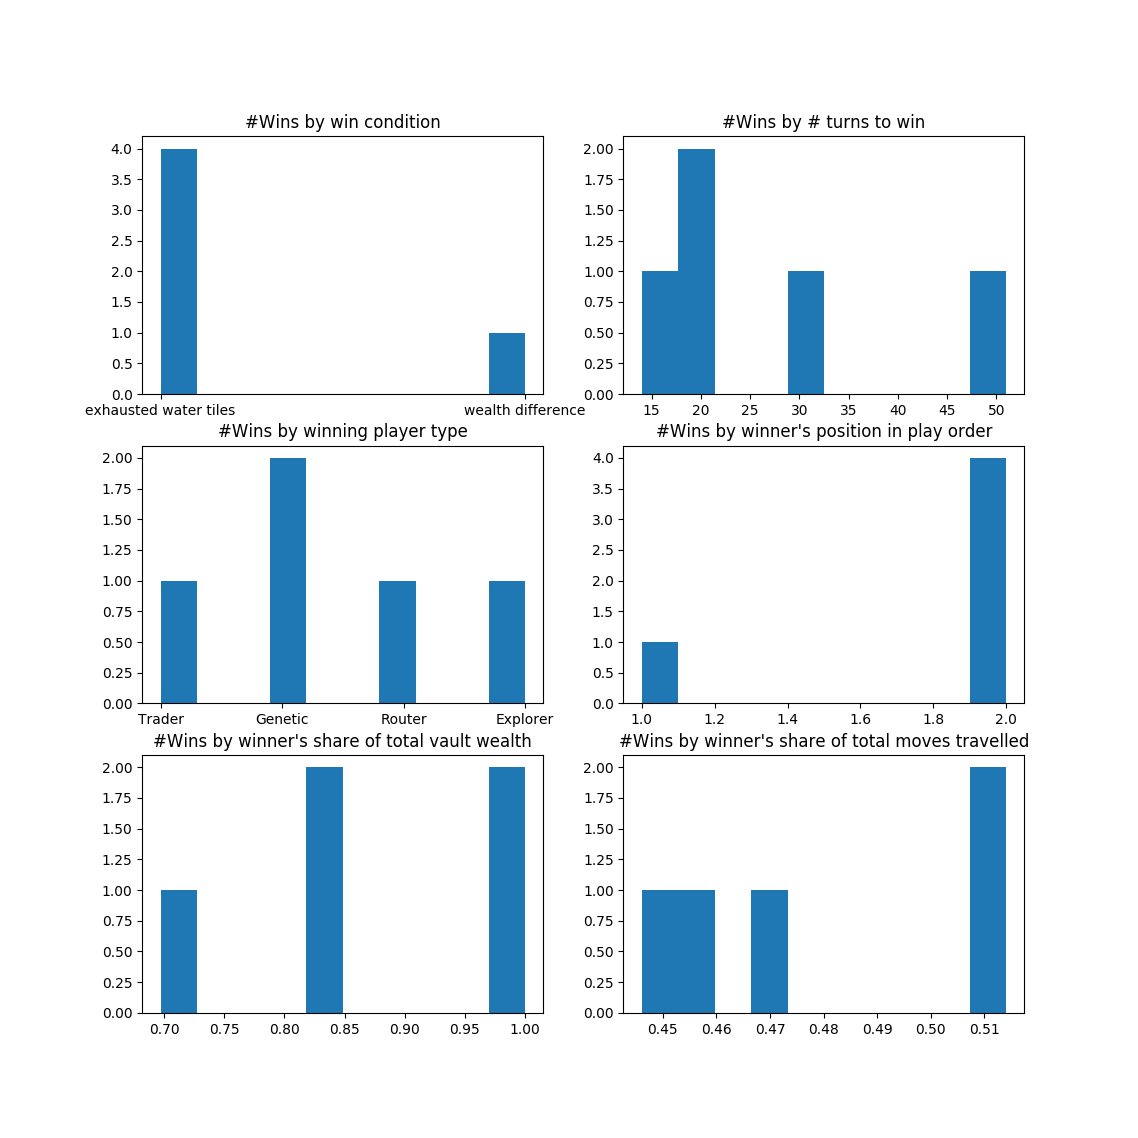

<IPython.core.display.Javascript object>


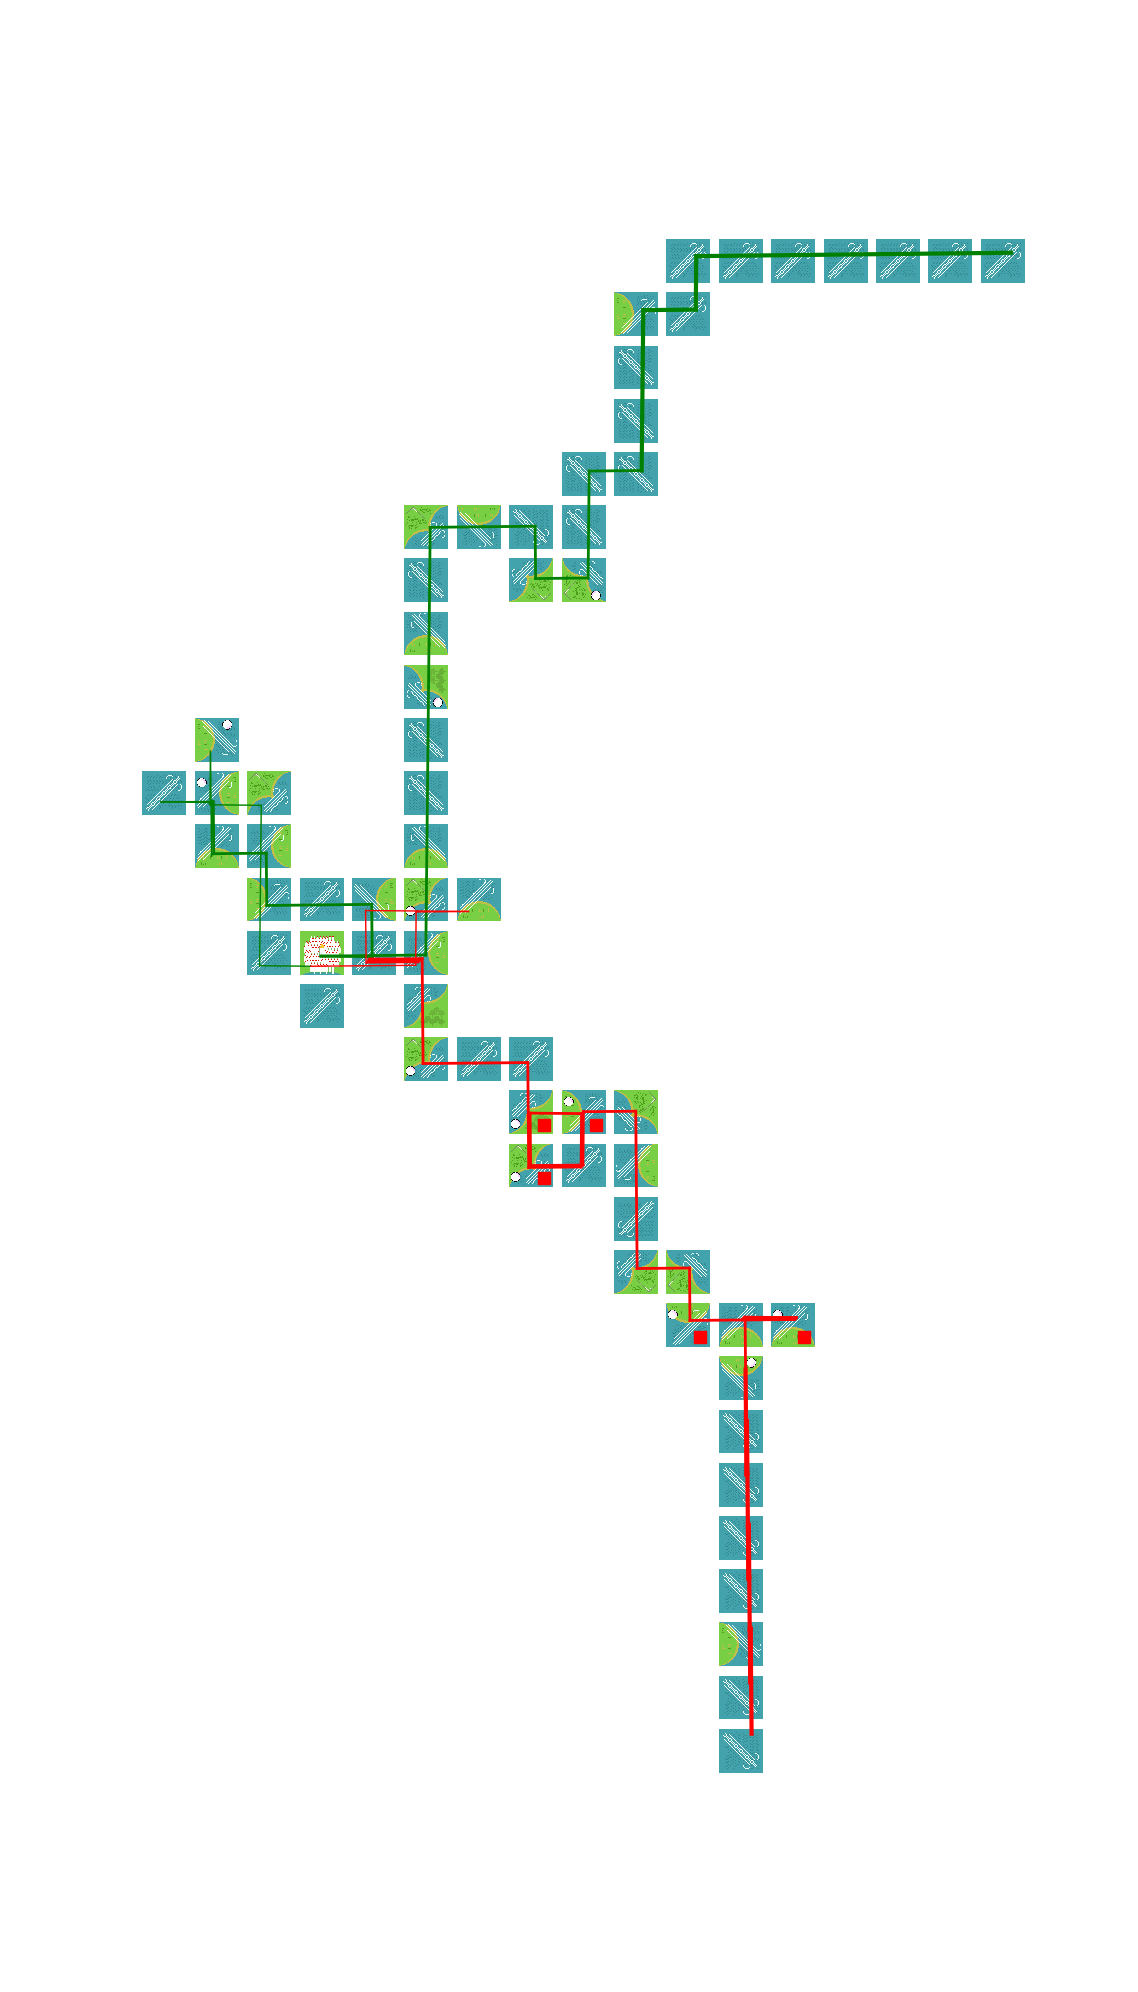

/usr/lib/python3/dist-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<IPython.core.display.Javascript object>


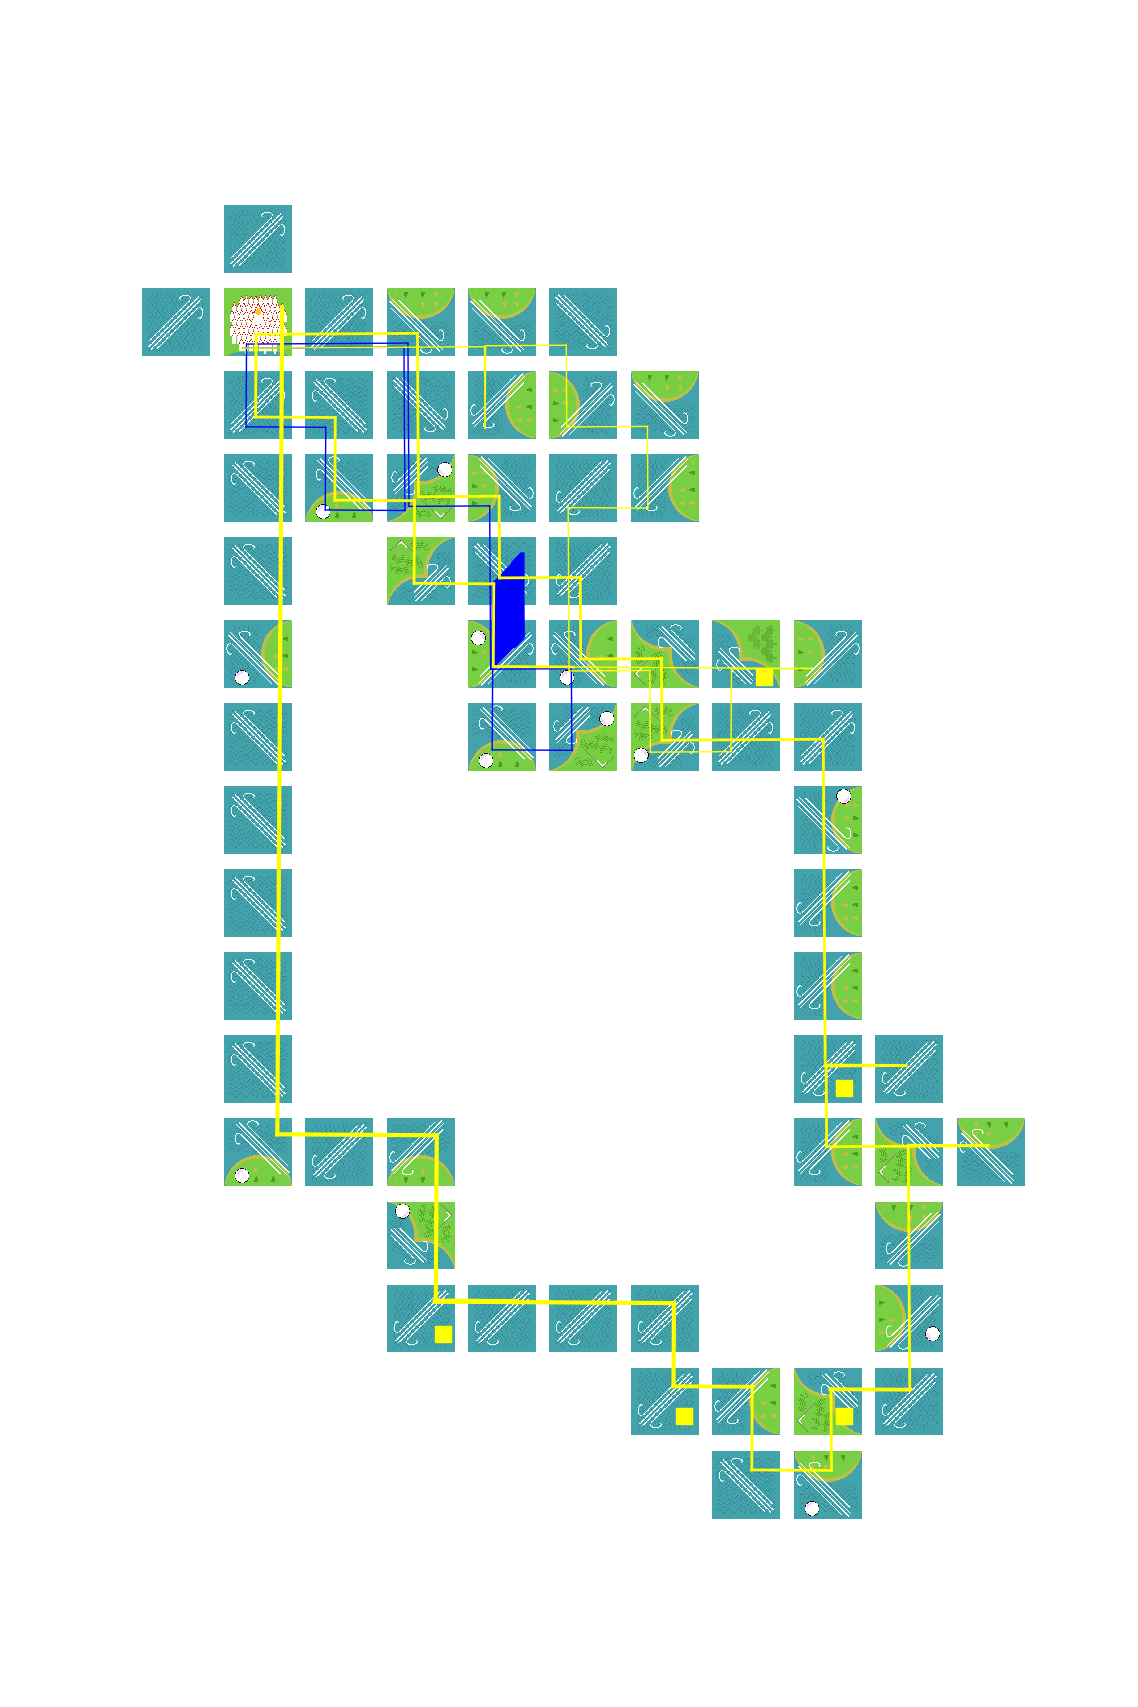

/usr/lib/python3/dist-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<IPython.core.display.Javascript object>


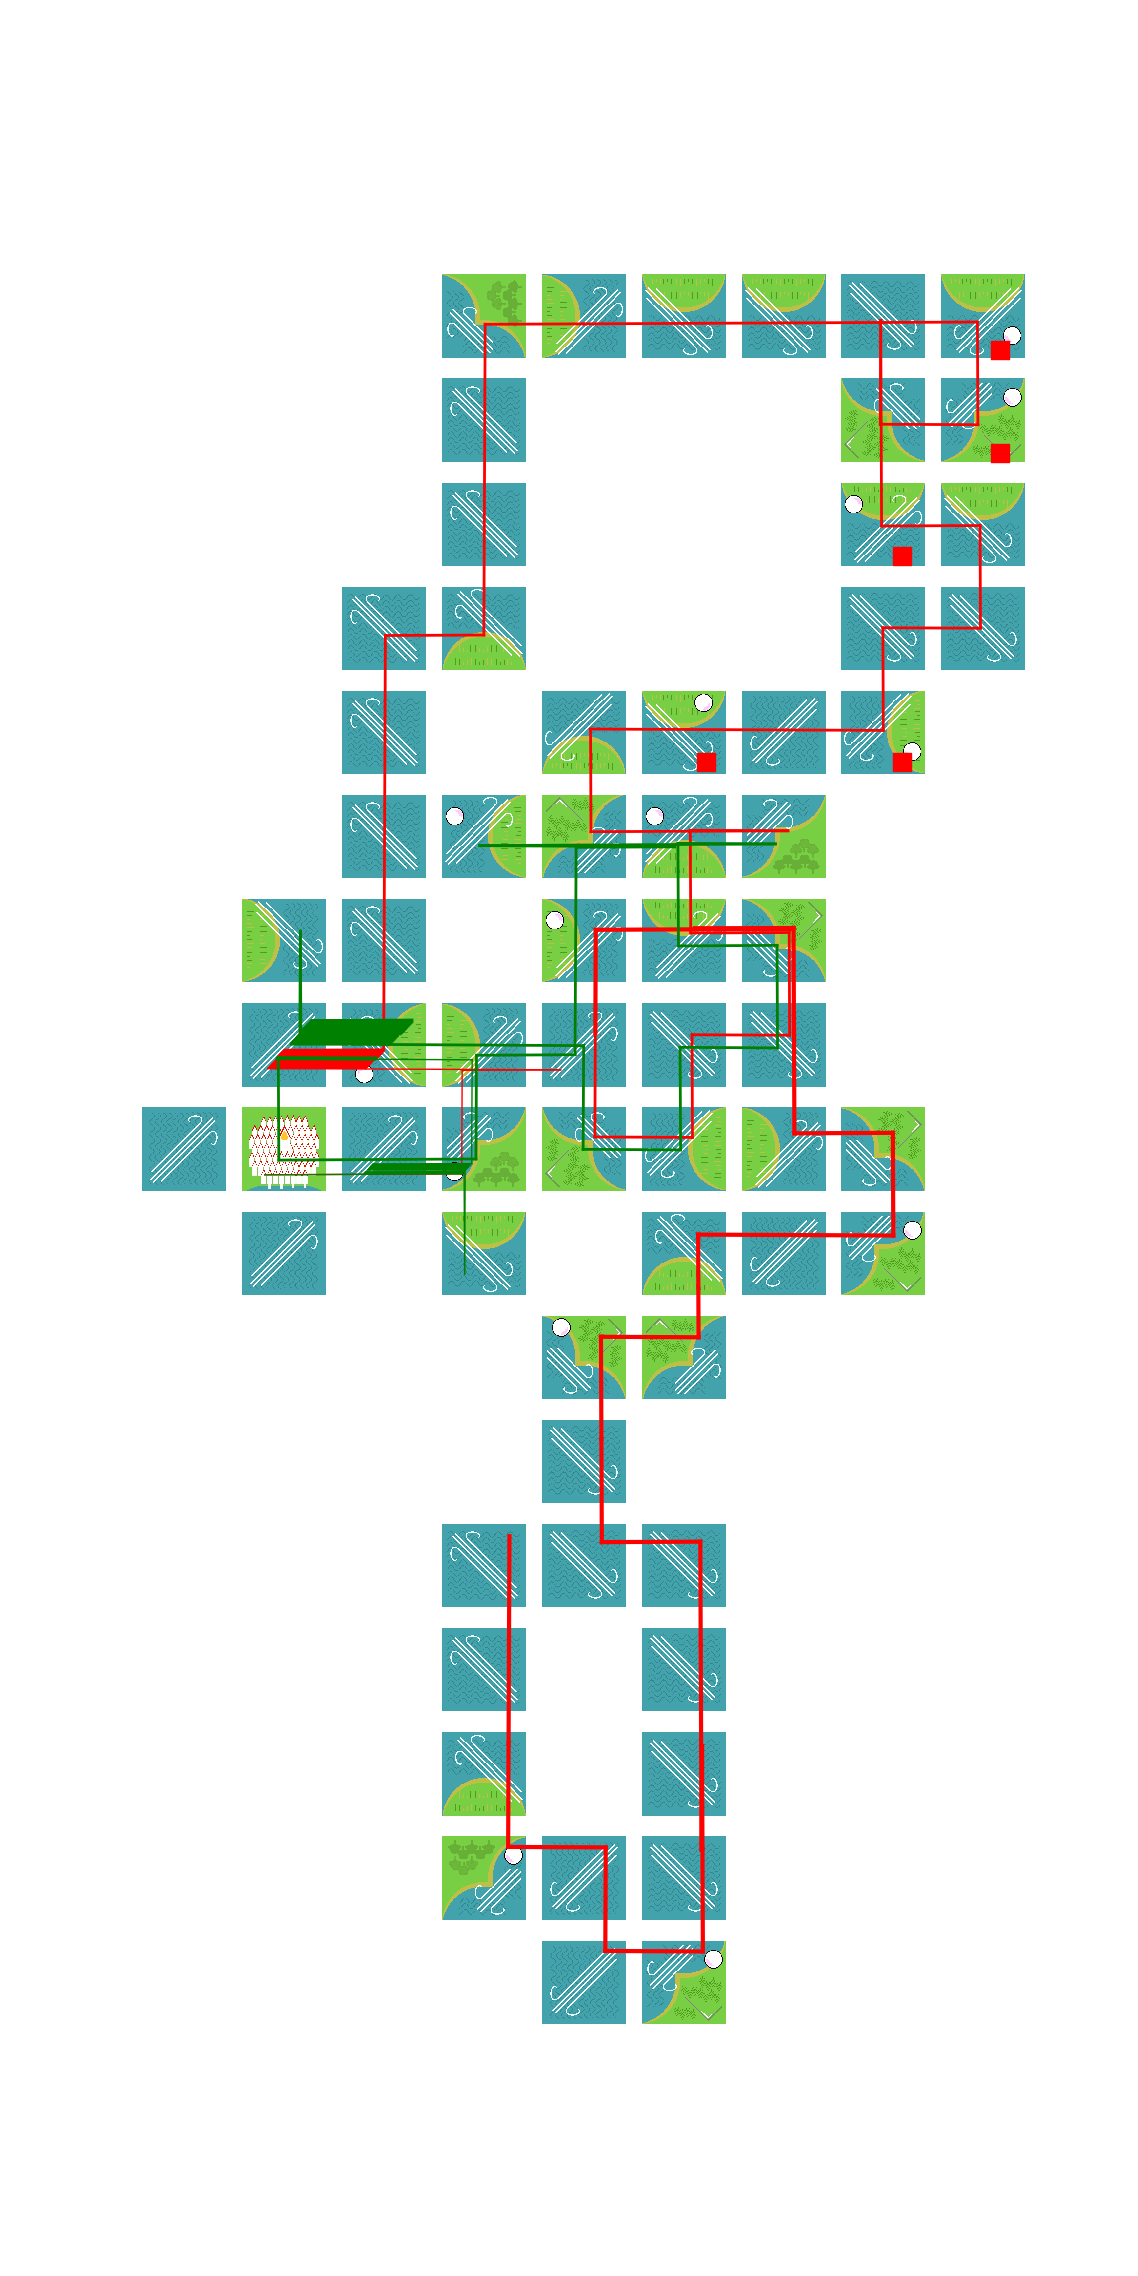

/usr/lib/python3/dist-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<IPython.core.display.Javascript object>


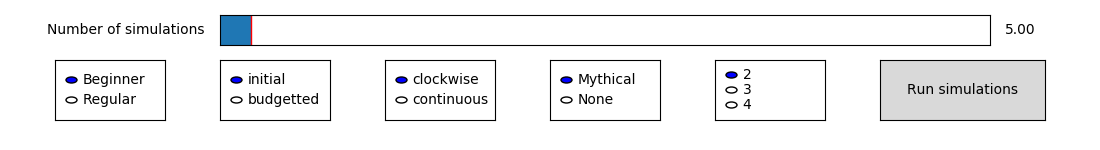

In [34]:
%matplotlib notebook
from matplotlib import pyplot
from matplotlib.widgets import Button, RadioButtons, Slider


class Simulations():
    """Run simulations of the game Cartolan."""
    GAME_MODES = { 'Beginner':{'game_type':GameBeginner, 'player_set':{"blue":PlayerBeginnerExplorer
                                                                           , "red":PlayerBeginnerTrader
                                                                           , "yellow":PlayerBeginnerRouter
                                                                           , "green":PlayerBeginnerGenetic}}
                      , 'Regular':{'game_type':GameRegular, 'player_set':{"blue":PlayerRegularExplorer
                                                                           , "red":PlayerRegularTrader
                                                                           , "yellow":PlayerRegularRouter
                                                                           , "green":PlayerRegularGenetic
                                                                         , "orange":PlayerRegularPirate}}
                      }    
    MOVEMENT_RULES = ['initial', 'budgetted']
    EXPLORATION_RULES = ['clockwise', 'continuous']
    NUM_PLAYERS_OPTIONS = [2, 3, 4]
    
    def __init__(self):
        self.game_mode = "Beginner"
        self.movement_rules = "initial" #"budgetted"
        self.exploration_rules = "clockwise" #,"continuous"
        self.mythical_city = True
        self.num_players = 2
        
        self.num_games = 5

    def click_run_sims(self, event):
        self.run_sims()
        
    def select_mode(self, label):
        self.game_mode = label
        
    def select_movement(self, label):
        self.movement_rules = label
    
    def select_exploration(self, label):
        self.exploration_rules = label
    
    def set_num_players(self, label):
        self.num_players = int(label)
    
    def set_num_sims(self, value):
        self.num_games = int(value)
        
    def run_sims(self):
        '''Method to run through a series of simulations, triggered by a UI button press'''

        import random
        import pandas
        import sys, os # for logging

        os.chdir('/home/tom/cartolan_sim')

        #determine logging
        stdout_backup = sys.stdout
        # sys.stdout = open(os.devnull, 'w')
        sys.stdout = open("./logs/cartolan_log.txt", 'w')
        # sys.stdout = sys.__stdout__
        
        
        #visuals parameters
        dimensions = [21,33]
        origin = [10, 10]

        #data to collect from each simulation
        self.sim_stats = pandas.DataFrame(columns = ["simulation_id", "num_players", "win_type", "turns"
                                                , "total_wealth_final", "max_wealth_final", "wealth_difference_final"
                                                , "winning_player_type", "winning_player_order", "winning_player_route"
                                                , "failed_explorations"
                                                , "wealth_p1", "wealth_p2", "wealth_p3", "wealth_p4"
                                                , "num_adventurers_p1", "num_adventurers_p2"
                                                , "num_adventurers_p3", "num_adventurers_p4"
                                                , "num_agents_p1", "num_agents_p2", "num_agents_p3", "num_agents_p4"
                                                , "avg_route_p1", "avg_route_p2", "avg_route_p3", "avg_route_p4" 
                                                , "play_area", "players"])
        play_areas = {}
        player_sets = {}

        #Function to collect average route lengths across a player's adventurers
        def avg_route_length(player):
            avg_route_length = 0
            for adventurer in player.adventurers:
                avg_route_length += len(adventurer.route)
            return avg_route_length/len(player.adventurers)

        # We have arrived! Time for the actual outcomes
        #@TODO multithread this: https://realpython.com/intro-to-python-threading/#starting-a-thread
        for sim_id in range(0, self.num_games):
            print("")
            players = []
        #     game = None
#             num_players = random.choice(num_players_options)
            player_colours = random.sample(list(self.GAME_MODES[self.game_mode]["player_set"]),self.num_players)
            for player_colour in player_colours:
                #player_colour = random.choice(player_set)
                players.append(self.GAME_MODES[self.game_mode]["player_set"][player_colour](player_colour))
            if self.mythical_city:
                print("Setting up a "+self.game_mode+"-mode game, with "+self.movement_rules+" movement rules, and "
                  +self.exploration_rules+" exploration rules, and a mythical city")
            else:
                print("Setting up a "+self.game_mode+"-mode game, with "+self.movement_rules+" movement rules, and "
                  +self.exploration_rules+" exploration rules, and no mythical city")
            game = setup_simulation(players, self.GAME_MODES[self.game_mode]["game_type"]
                                    , self.movement_rules, self.exploration_rules, self.mythical_city)

            #run the game
            print("Starting simulation #"+str(sim_id)+" of "+self.game_mode+"-mode Cartolan, with " +str(self.num_players)+ " players")
            game.start_game()

            #record stats
            def player_strip(player_type):
                '''Reduces the name of a player type down '''
                name = player_type.__name__
                if "Beginner" in name:
                    return name[name.find("Beginner")+len("Beginner"):]
                elif "Regular" in name:
                    return name[name.find("Regular")+len("Regular"):]
                else:
                    return name[name.find("Player")+len("Player"):]
            
            if game.wealth_difference > 0 and self.num_players ==2:
                self.sim_stats = self.sim_stats.append( {"simulation_id":sim_id, "num_players":self.num_players
                                    , "win_type":game.win_type, "turns":game.turn
                                    , "total_wealth_final":game.total_vault_wealth
                                    , "max_wealth_final":game.max_wealth
                                    , "wealth_difference_final":game.wealth_difference
                                    , "winning_player_type":player_strip(type(game.winning_player))
                                    , "winning_player_order":game.players.index(game.winning_player)+1
                                    , "winning_player_route":avg_route_length(game.winning_player)
                                    , "failed_explorations":game.num_failed_explorations 
                                    , "wealth_p1":game.players[0].vault_wealth
                                    , "wealth_p2":game.players[1].vault_wealth
                                    , "num_adventurers_p1":len(game.players[0].adventurers)
                                    , "num_adventurers_p2":len(game.players[1].adventurers)
                                    , "num_agents_p1":len(game.players[0].agents)
                                    , "num_agents_p2":len(game.players[1].agents)
                                    , "avg_route_p1":avg_route_length(players[0])
                                    , "avg_route_p2":avg_route_length(players[1])
                                              }, ignore_index=True)
                play_areas[sim_id] = game.play_area
                player_sets[sim_id] = game.players
            elif game.wealth_difference > 0 and self.num_players ==3:
                self.sim_stats = self.sim_stats.append( {"simulation_id":sim_id, "num_players":self.num_players
                                    , "win_type":game.win_type, "turns":game.turn
                                    , "total_wealth_final":game.total_vault_wealth
                                    , "max_wealth_final":game.max_wealth
                                    , "wealth_difference_final":game.wealth_difference
                                    , "winning_player_type":player_strip(type(game.winning_player))
                                    , "winning_player_order":game.players.index(game.winning_player)+1
                                    , "winning_player_route":avg_route_length(game.winning_player)
                                    , "failed_explorations":game.num_failed_explorations 
                                    , "wealth_p1":game.players[0].vault_wealth, "wealth_p2":game.players[1].vault_wealth
                                    , "wealth_p3":game.players[2].vault_wealth
                                    , "num_adventurers_p1":len(game.players[0].adventurers)
                                    , "num_adventurers_p2":len(game.players[1].adventurers)
                                    , "num_adventurers_p3":len(game.players[2].adventurers)
                                    , "num_agents_p1":len(game.players[0].agents)
                                    , "num_agents_p2":len(game.players[1].agents)
                                    , "num_agents_p3":len(game.players[2].agents)
                                    , "avg_route_p1":avg_route_length(players[0])
                                    , "avg_route_p2":avg_route_length(players[1])
                                    , "avg_route_p3":avg_route_length(players[2])
                                              }, ignore_index=True)
                play_areas[sim_id] = game.play_area
                player_sets[sim_id] = game.players
            elif game.wealth_difference > 0 and self.num_players ==4:
                self.sim_stats = self.sim_stats.append( {"simulation_id":sim_id, "num_players":self.num_players
                                    , "win_type":game.win_type, "turns":game.turn
                                    , "total_wealth_final":game.total_vault_wealth
                                    , "max_wealth_final":game.max_wealth
                                    , "wealth_difference_final":game.wealth_difference
                                    , "winning_player_type":player_strip(type(game.winning_player))
                                    , "winning_player_order":game.players.index(game.winning_player)+1
                                    , "winning_player_route":avg_route_length(game.winning_player)
                                    , "failed_explorations":game.num_failed_explorations 
                                    , "wealth_p1":game.players[0].vault_wealth, "wealth_p2":game.players[1].vault_wealth
                                    , "wealth_p3":game.players[2].vault_wealth, "wealth_p4":game.players[3].vault_wealth
                                    , "num_adventurers_p1":len(game.players[0].adventurers)
                                    , "num_adventurers_p2":len(game.players[1].adventurers)
                                    , "num_adventurers_p3":len(game.players[2].adventurers)
                                    , "num_adventurers_p4":len(game.players[3].adventurers)
                                    , "num_agents_p1":len(game.players[0].agents)
                                    , "num_agents_p2":len(game.players[1].agents)
                                    , "num_agents_p3":len(game.players[2].agents)
                                    , "num_agents_p4":len(game.players[3].agents)
                                    , "avg_route_p1":avg_route_length(players[0])
                                    , "avg_route_p2":avg_route_length(players[1])
                                    , "avg_route_p3":avg_route_length(players[2])
                                    , "avg_route_p4":avg_route_length(players[3])
                                              }, ignore_index=True)
                play_areas[sim_id] = game.play_area
                player_sets[sim_id] = game.players


        # Make sure that graphical outputs go here
        sys.stdout = stdout_backup
        # Let's compare the performance of winning players to others
        play_stats_visualisation = PlayStatsVisualisation(self.sim_stats)
        play_stats_visualisation.win_type_comparison()
        play_stats_visualisation.turns_to_win()
        play_stats_visualisation.player_type_comparison()
        play_stats_visualisation.player_order_comparison()
        play_stats_visualisation.wealth_comparison()
        # play_stats_visualisation.wealth_variance_comparison()
        play_stats_visualisation.route_comparison()
        # play_stats_visualisation.agent_comparison()
        # play_stats_visualisation.adventurer_comparison()

        def prep_visuals(sim_id_to_vis, title):
            play_area_to_vis = play_areas[sim_id_to_vis]
            #work out the ideal dimensions for the visualisation
            h_dimension = max(play_area_to_vis.keys())-min(play_area_to_vis.keys())
            h_origin = h_dimension - max(play_area_to_vis.keys())
            max_longitude = 0
            min_longitude = 0
            v_dimension = 0
            for latitude in play_area_to_vis.keys():
                if max(play_area_to_vis[latitude].keys()) > max_longitude:
                    max_longitude = max(play_area_to_vis[latitude].keys())
                if min(play_area_to_vis[latitude].keys()) < min_longitude:
                    min_longitude = min(play_area_to_vis[latitude].keys())
            v_dimension = max_longitude - min_longitude
            v_origin = v_dimension - max_longitude
            dimensions = [h_dimension,v_dimension]
            origin = [h_origin, v_origin] 
            #render the play area and routes
            play_area_vis_med_wealth_difference = PlayAreaVisualisation(dimensions, origin, title)
            play_area_vis_med_wealth_difference.draw_play_area(play_area_to_vis, play_area_to_vis)
            #@TODO earlier agents seem to be forgotten - likely because the routes are taken from the final list of agents where some have been deleted rather than being moved?
            play_area_vis_med_wealth_difference.draw_routes(player_sets[sim_id_to_vis])
        
        # Let's look at the final layout and paths of the game with the median wealth difference, if one exists:
        if self.sim_stats["wealth_difference_final"].median() in self.sim_stats["wealth_difference_final"].values:
            sim_id_med_wealth_difference = self.sim_stats[self.sim_stats["wealth_difference_final"] 
                                                  == self.sim_stats["wealth_difference_final"].median()]["simulation_id"].values[0]
            prep_visuals(sim_id_med_wealth_difference, "How the median wealth difference game progressed")
        
        # Let's also look at the games with maximum and minimum wealth differences
        sim_id_max_wealth_difference = self.sim_stats[self.sim_stats["wealth_difference_final"] 
                                                  == self.sim_stats["wealth_difference_final"].max()]["simulation_id"].values[0]
        prep_visuals(sim_id_max_wealth_difference, "How the maximum wealth difference game progressed")
        
        sim_id_min_wealth_difference = self.sim_stats[self.sim_stats["wealth_difference_final"] 
                                                  == self.sim_stats["wealth_difference_final"].min()]["simulation_id"].values[0]
        prep_visuals(sim_id_min_wealth_difference, "How the minimum wealth difference game progressed")
        
        pyplot.show()

# create a panel with buttons/sliders to run the simulation, and select the number of simulations, borrowing from https://matplotlib.org/3.2.1/gallery/widgets/buttons.html
simulations = Simulations()
simulations.run_sims() #we have to already instantiate the visualisations, or they don't appear alongside the control panel. no idea why
# sys.stdout = stdout_backup
control_fig = pyplot.figure(num = "Controls", figsize = (11,1.5))
#include a slider to select the number of simulations
axslidernsims = pyplot.axes([0.2, 0.7, 0.7, 0.2])
slidernsims = Slider(axslidernsims, 'Number of simulations', 1, 100, valinit=5, valstep=1)
slidernsims.on_changed(simulations.set_num_sims)
#include radio button to select game mode
axradmode = pyplot.axes([0.05, 0.2, 0.1, 0.4])
radmode = RadioButtons(axradmode, simulations.GAME_MODES.keys())
radmode.on_clicked(simulations.select_mode)
#include radio button to select movement rules
axradmove = pyplot.axes([0.2, 0.2, 0.1, 0.4])
radmove = RadioButtons(axradmove, simulations.MOVEMENT_RULES)
radmove.on_clicked(simulations.select_movement)
#include radio button to select exploration rules
axradexpl = pyplot.axes([0.35, 0.2, 0.1, 0.4])
radexpl = RadioButtons(axradexpl, simulations.EXPLORATION_RULES)
radexpl.on_clicked(simulations.select_exploration)
#include radio button to select whether the mythical city will be included
axradmyth = pyplot.axes([0.5, 0.2, 0.1, 0.4])
radmyth = RadioButtons(axradmyth, ["Mythical", "None"])
radmyth.on_clicked(simulations.select_exploration)
#include radio button to select number of players
axradnump = pyplot.axes([0.65, 0.2, 0.10, 0.4])
radnump = RadioButtons(axradnump, simulations.NUM_PLAYERS_OPTIONS)
radnump.on_clicked(simulations.set_num_players)
#include push button to run sims
axrun = pyplot.axes([0.80, 0.2, 0.15, 0.4])
brun = Button(axrun, 'Run simulations')
brun.on_clicked(simulations.click_run_sims)

pyplot.show()

In [35]:
name = PlayerBeginnerExplorer.__name__
name[name.find("Beginner")+len("Beginner"):]

'Explorer'

In [36]:
# sim_id_med_wealth_difference = simulations.sim_stats[simulations.sim_stats["wealth_difference_final"] 
#                                                   == simulations.sim_stats["wealth_difference_final"].median()]["simulation_id"].values[0]
# #work out the ideal dimensions for the visualisation
# med_play_area = play_areas[sim_id_med_wealth_difference]
# h_dimension = max(med_play_area.keys())-min(med_play_area.keys())
# h_origin = h_dimension - max(med_play_area.keys())
# max_longitude = 0
# min_longitude = 0
# v_dimension = 0
# for latitude in med_play_area.keys():
#     if max(med_play_area[latitude].keys()) > max_longitude:
#         max_longitude = max(med_play_area[latitude].keys())
#     if min(med_play_area[latitude].keys()) < min_longitude:
#         min_longitude = min(med_play_area[latitude].keys())
# v_dimension = max_longitude - min_longitude
# v_origin = v_dimension - max_longitude
# dimensions = [h_dimension,v_dimension]
# origin = [h_origin, v_origin]

## Interactive simulation with human players

In [37]:
class PlayerHuman(Player): # do you need to give this access to the visualisation?
    from ipywidgets import widgets # bring in widgets to receive player input
    from matplotlib import pyplot
    
    def __init__(self, colour, play_area_vis):
        super().__init__(colour)
        
        self.play_area_vis = play_area_vis
    
    #some routines to update visuals
    def update_visuals(self, play_area, players):
        #compare the play area given to that currently visualised
        #@TODO check whether either dimension of the grid has grown and reset the visual with a margin
        
        #work out which tiles have been added
        visualised_play_area = self.play_area_vis.play_area    
        unvisualised_play_area = { latitude : play_area[latitude] for latitude in set(play_area) - set(self.visualised_play_area) }
        for latitude in visualised_play_area:
            latitude_difference = { longitude : play_area[latitude].get(longitude) 
                                                for longitude in set(play_area[latitude]) 
                                                - set(self.visualised_play_area[latitude]) }
            if latitude_difference:
                unvisualised_play_area[latitude].update(latitude_difference)

        #add in the tiles that have not been visualised so far
        self.play_area_vis.draw_play_area(play_area, unvisualised_play_area)
        #redraw all the tokens
        self.play_area_vis.draw_tokens(players)

    
    #taken from https://stackoverflow.com/questions/38877303/how-to-prompt-for-user-input-using-a-matplotlib-gui-rather-than-a-command-line-p
    #could also potentially handle this by reconnecting for each input needed, and then disconnecting
    def get_coords_from_figure(self):
        ev = None
        def onclick(event):
            nonlocal ev
            ev = event

        fig = self.play_area_vis.fig
        cid = fig.canvas.mpl_connect('button_press_event', onclick)

        self.pyplot.show(block=True)
        return [int(ev.xdata), int(ev.ydata)] if ev is not None else None
 

    def continue_move(self, adventurer):
        valid_moves = [[adventurer.current_tile.tile_position.latitude
                        , adventurer.current_tile.tile_position.longitude]]
        invalid_moves = []
        move_map = {adventurer.current_tile.tile_position.latitude:{adventurer.current_tile.tile_position.longitude:'wait'}}
        
        #highlight the tiles that can be reached this move
        for compass_point in ['n', 'e', 's', 'w']:
            #locate the space in the play area that the Adventurer is moving into
            latitude_increment = int(compass_point.lower() in ["east","e"]) - int(compass_point.lower() in ["west","w"])
            potential_latitude = adventurer.current_tile.tile_position.latitude + latitude_increment
            longitude_increment = int(compass_point.lower() in ["north","n"]) - int(compass_point.lower() in ["south","s"])
            potential_longitude = adventurer.current_tile.tile_position.longitude + longitude_increment
            if adventurer.can_move(compass_point):
                valid_moves.append([potential_latitude, potential_longitude])
            else:
                invalid_moves.append([potential_latitude, potential_longitude])
            #keep track of what compass point these coordinates correspond to
#             potential_coords = TilePosition(potential_latitude, potential_longitude)
            if move_map.get(potential_latitude):
                move_map[potential_latitude][potential_longitude] = compass_point
            else:
                move_map[potential_latitude] = {potential_longitude:compass_point}
        #highlight the tiles
        self.play_area_vis.draw_move_options(valid_moves, invalid_moves)
        
        #prompt the player to choose a tile to move on to
        self.play_area_vis.give_prompt("Which tile would you like "+str(self.colour)+" adventurer #" 
                                       +str(self.adventurers.index(adventurer)+1) 
                                       +" to move to?")
        #Carry out the player's chosen move
        moved = False
        move_coords = self.get_coords_from_figure()
#         move_coords = TilePosition(move_coords[0], move_coords[1]) # this will be a different object and won't retrieve... @TODO fix this some other way
        while not moved:
            if move_coords in valid_moves:
                if move_map[move_coords[0]].get(move_coords[1]) == "wait":
                    moved = adventurer.wait()
                else:
                    moved = adventurer.move(move_map[move_coords[0]].get(move_coords[1]))
            else:
                self.play_area_vis.give_prompt("That is not a valid move. Which tile would you like "
                                               +str(self.colour)+" adventurer #" 
                                               +str(self.adventurers.index(adventurer)+1) 
                                               +" to move to?")
                move_coords = self.get_coords_from_figure()
        
        
        #clean up the highlights
        self.play_area_vis.clear_move_options()
        self.play_area_vis.clear_prompt()
        self.update_visuals(adventurer.game.play_area, adventurer.game.players)
        return True
    
    def continue_turn(self, adventurer):
        while adventurer.turns_moved < adventurer.game.turn:
            self.continue_move(adventurer)
        return True
    
    #if offered by a Wonder, give the player a button to choose whether to trade
    def check_trade(self, adventurer, tile):
#         self.play_area_vis.give_prompt("You reached a known wonder. Do you want to trade?")
#         trade_button = widgets.Button(description = "Trade")
#         display(trade_button)
#         no_trade_button = widgets.Button(description = "Don't trade")
#         display(no_trade_button)
        
#         def on_trade_clicked(b):
            
        
        return True
    
    #if offered by an agent, give the player a button to choose whether to collect wealth
    def check_collect_wealth(self, agent):
        return True
    
    #if offered only rest at own agents
    def check_rest(self, adventurer, agent):
        
        return False
    
    #if offered by a city then always bank everything
    def check_bank_wealth(self, adventurer, report="Player is being asked whether to bank wealth"):
        print(report)
        return adventurer.wealth
    
    #if offered by a city, then check whether oponents will win on their next visit to a city, and buy an adventurer if not
    def check_buy_adventurer(self, adventurer, report="Player is being asked whether to buy an adventurer"):
        print(report)
           
        return False
    
    # never place an agent when offered
    def check_place_agent(self, adventurer):
        return False
    
    # never buy an agent when offered
    def check_buy_agent(self, adventurer, report="Player has been offered to buy an agent by a city"):
        print(report)
        return None, None
    
    # never move an agent when offered
    def check_move_agent(self, adventurer):     
#         return agent_to_move
        return False

    def check_attack_adventurer(self, adventurer, other_adventurer):
        
        return False
    
    def check_attack_agent(self, adventurer, agent):
        
        return False
    
    def check_restore_agent(self, adventurer, agent):
        
        return False

In [38]:
# %matplotlib notebook
# import random

# # These parameters will likely be changed each game
# game_mode = "Regular"
# num_players = 4
# num_human_players = 2
# movement_rules = "initial"
# exploration_rules = "clockwise"


# # Now for the constants
# HUMAN_PLAYER_COLOURS = ["purple", "pink", "brown", "white"]
# GAME_MODES = { 'Beginner':{'game_type':GameBeginner, 'player_set':{"blue":PlayerBeginnerExplorer
#                                                                    , "red":PlayerBeginnerTrader
#                                                                    , "yellow":PlayerBeginnerRouter
#                                                                    , "green":PlayerBeginnerGenetic}}
#               , 'Regular':{'game_type':GameRegular, 'player_set':{"blue":PlayerRegularExplorer
#                                                                    , "red":PlayerRegularTrader
#                                                                    , "yellow":PlayerRegularRouter
#                                                                    , "green":PlayerRegularGenetic
#                                                                  , "orange":PlayerRegularPirate}}
#               }
# STARTING_DIMENSIONS = [20, 10]
# STARTING_ORIGIN = [5, 5]

# #start the visuals, to be updated by the human players before and during turns
# # sys.stdout = stdout_backup
# dimensions = STARTING_DIMENSIONS
# origin = STARTING_ORIGIN
# play_area_vis = PlayAreaVisualisation(dimensions, origin, False)

# players = []
# # add human players
# for human_player_num in range(0, num_human_players):
#     players.append(PlayerHuman(HUMAN_PLAYER_COLOURS[human_player_num], play_area_vis))

# #add virtual computer players
# player_colours = random.sample(list(GAME_MODES[game_mode]["player_set"]), num_players - num_human_players)
# for player_colour in player_colours:
#     #player_colour = random.choice(player_set)
#     players.append(GAME_MODES[game_mode]["player_set"][player_colour](player_colour))

# #setup the game
# print("setting up the play area")
# game = setup_simulation(players, GAME_MODES[game_mode]["game_type"], movement_rules, exploration_rules)

# #visualise this initial setup
# print("starting visuals")
# play_area = game.play_area
# play_area_vis.draw_play_area(play_area, play_area)
# play_area_vis.draw_tokens(players)

# #run the game
# game.start_game()

In [39]:
# sys.stdout = stdout_backup
# vis=PlayAreaVisualisation(dimensions, origin, False)
# vis.draw_play_area(game.play_area, game.play_area)
# for player in game.players:
#     print(player.colour)
# for latitude in game.play_area:
#     for longitude in game.play_area.get(latitude):
#         print(str(latitude)+","+str(longitude)+"  "+str(game.play_area.get(latitude).get(longitude).tile_back))
# play_area_vis.tile_image_library["capital"]s

## Simulating with AI players

In [40]:
#The AI state will need to be hard stored, rather than retraining each time the notebook is run